<a href="https://colab.research.google.com/github/kumarprakhar14/Time-Series-Analysis/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

In [ ]:
file_path = '/content/Project Files/clean_06_02_24.pkl'

In [ ]:
data_frame = pd.read_pickle(file_path)

UnpicklingError: pickle data was truncated

Since, the 1GB pickle file is not properly getting uploaded, using the actual shorter dataset instead directly
[Region 13-18]

In [3]:
file_path = "/content/regionwise_columns.pickle"

In [4]:
data_frame = pd.read_pickle(file_path)

In [5]:
print(data_frame)

{'CVR_L1': ['[9.226]', '[12:44]', '[1:17]', '[1:19]', '[1:21]', '[1:36]', '[1:40]', '[1:71]', '[1:74]', '[1:75]', '[1:76]', '[1:78]', '[1:79]', '[1:80]', '[3:25]', '[9:76]', '[9.76]', '[9:76]', '[12:19]', '[12:20]', '[12:21]', '[12:69]'], 'CVR_L2': ['[9.226]', '[12:44]', '[5:27]', '[5:29]', '[5:36]', '[5:46]', '[5:69]', '[5:80]', '[5.32]', '[5.45]', '[5.46]', '[5.155]', '[6:9]', '[6:10]', '[6:12]', '[9:77]', '[9.70]', '[9.77]', '[9:77]', '[12:22]', '[12:23]', '[12:24]', '[12:70]'], 'CVAH_L1': ['[9.226]', '[12:44]', '[1:12]', '[1:13]', '[1:15]', '[1:31]', '[1:33]', '[1:34]', '[1:59]', '[1:62]', '[1:63]', '[1:68]', '[1:72]', '[1:73]', '[1.182]', '[1.183]', '[1.200]', '[1.210]', '[3:18]', '[3:19]', '[3:21]', '[17:33]', '[17:34]', '[17:35]', '[17:36]', '[17:47]', '[17:48]', '[17:56]', '[17:58]', '[17:59]', '[17:60]', '[17.28]', '[17.29]', '[17.30]', '[17.31]', '[17.35]', '[17.36]', '[1.193]', '[1.194]', '[1:30]', '[17:2]', '[17:3]', '[17:18]', '[17:21]', '[17:6]', '[17:7]', '[17:13]', '[17

In [6]:
data_frame['Stand_13-18']

['[9.226]',
 '[12:44]',
 '[9:12]',
 '[9:13]',
 '[9:14]',
 '[9:15]',
 '[9:16]',
 '[9:17]',
 '[9:47]',
 '[9:48]',
 '[9:49]',
 '[9:50]',
 '[9:51]',
 '[9:52]',
 '[9:53]',
 '[9:54]',
 '[9:55]',
 '[9:56]',
 '[9:57]',
 '[9:58]',
 '[9:64]',
 '[9:65]',
 '[9:66]',
 '[9:67]',
 '[9:68]',
 '[9:69]',
 '[9.17]',
 '[9.18]',
 '[9.19]',
 '[9.20]',
 '[9.21]',
 '[12:42]',
 '[12:43]',
 '[12:65]',
 '[12:66]',
 '[12:67]',
 '[12:68]',
 '[11:21]',
 '[11:22]',
 '[11:23]',
 '[11:24]',
 '[11:25]',
 '[11:26]']

The required dataset

In [7]:
df_final = pd.read_csv('/content/df_final.csv')

In [8]:
df_final.head()

[9.226]  [12:44]  [9:12]  [9:13]  [9:14]  [9:15]  [9:16]  [9:17]  [9:47]  \
0        0       84      24       3      34      38      39      26     999   
1        0       84      21       5      34      38      38      26    1001   
2        0       84      24       7      35      39      39      27    1000   
3        0       84      23       6      34      38      38      26     999   
4        0       84      23       6      34      38      39      26     999   

   [9:48]  ...  [12:65]  [12:66]  [12:67]  [12:68]  [11:21]  [11:22]  [11:23]  \
0    1566  ...      411      287      477      722    1.132    1.082    1.154   
1    1570  ...      347      276      491      710    1.132    1.082    1.154   
2    1568  ...      400      326      501      731    1.132    1.082    1.154   
3    1567  ...      349      281      508      768    1.132    1.082    1.154   
4    1566  ...      370      292      490      720    1.132    1.082    1.154   

   [11:24]  [11:25]  [11:26]  
0    1.157    1.195    1.158  
1    1.157    1.195    1.158  
2    1.157    1.195    1.158  
3    1.157    1.195    1.157  
4    1.157    1.195    1.157  

[5 rows x 43 columns]

In [9]:
df_final.columns

Index(['[9.226]', '[12:44]', '[9:12]', '[9:13]', '[9:14]', '[9:15]', '[9:16]',
       '[9:17]', '[9:47]', '[9:48]', '[9:49]', '[9:50]', '[9:51]', '[9:52]',
       '[9:53]', '[9:54]', '[9:55]', '[9:56]', '[9:57]', '[9:58]', '[9:64]',
       '[9:65]', '[9:66]', '[9:67]', '[9:68]', '[9:69]', '[9.17]', '[9.18]',
       '[9.19]', '[9.20]', '[9.21]', '[12:42]', '[12:43]', '[12:65]',
       '[12:66]', '[12:67]', '[12:68]', '[11:21]', '[11:22]', '[11:23]',
       '[11:24]', '[11:25]', '[11:26]'],
      dtype='object')

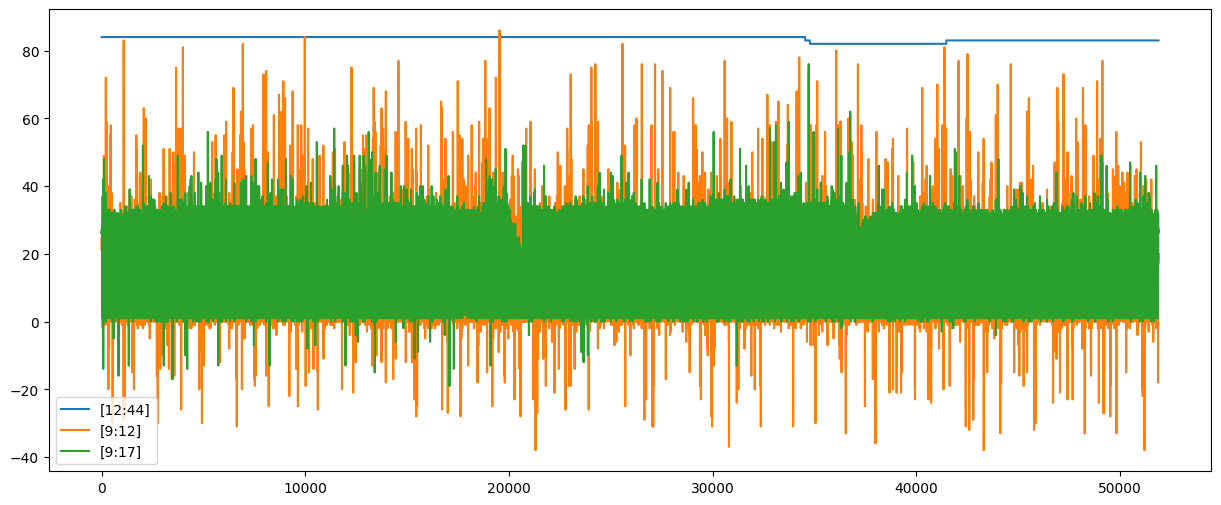

In [10]:
# tring to get some sense of the data
df_final[['[12:44]', '[9:12]', '[9:17]']].plot(figsize=(15, 6))
plt.show()

# 1. Preprocessing

In [11]:
df_final.isna().sum()

[9.226]    0
[12:44]    0
[9:12]     0
[9:13]     0
[9:14]     0
[9:15]     0
[9:16]     0
[9:17]     0
[9:47]     0
[9:48]     0
[9:49]     0
[9:50]     0
[9:51]     0
[9:52]     0
[9:53]     0
[9:54]     0
[9:55]     0
[9:56]     0
[9:57]     0
[9:58]     0
[9:64]     0
[9:65]     0
[9:66]     0
[9:67]     0
[9:68]     0
[9:69]     0
[9.17]     0
[9.18]     0
[9.19]     0
[9.20]     0
[9.21]     0
[12:42]    0
[12:43]    0
[12:65]    0
[12:66]    0
[12:67]    0
[12:68]    0
[11:21]    0
[11:22]    0
[11:23]    0
[11:24]    0
[11:25]    0
[11:26]    0
dtype: int64

In [12]:
infinite_mask = df_final.isin([np.inf, -np.inf]).sum()

In [13]:
print(infinite_mask)

[9.226]    0
[12:44]    0
[9:12]     0
[9:13]     0
[9:14]     0
[9:15]     0
[9:16]     0
[9:17]     0
[9:47]     0
[9:48]     0
[9:49]     0
[9:50]     0
[9:51]     0
[9:52]     0
[9:53]     0
[9:54]     0
[9:55]     0
[9:56]     0
[9:57]     0
[9:58]     0
[9:64]     0
[9:65]     0
[9:66]     0
[9:67]     0
[9:68]     0
[9:69]     0
[9.17]     0
[9.18]     0
[9.19]     0
[9.20]     0
[9.21]     0
[12:42]    0
[12:43]    0
[12:65]    0
[12:66]    0
[12:67]    0
[12:68]    0
[11:21]    0
[11:22]    0
[11:23]    0
[11:24]    0
[11:25]    0
[11:26]    0
dtype: int64


In [14]:
df_final.replace([np.inf, -np.inf], np.nan, inplace=True)

In [15]:
df_final.dropna(inplace=True)

In [16]:
# Dropping the constant column

df_final = df_final.drop('[9.226]', axis=1)

# Checking Stationarity of the data.

In [17]:
# calculating rolling statistics

def plot_rolling_statistics(timeseries, window=60, title=''):
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title(f'Rolling Mean & Standard Deviation ({title})')
    plt.show()

Column [12:44]


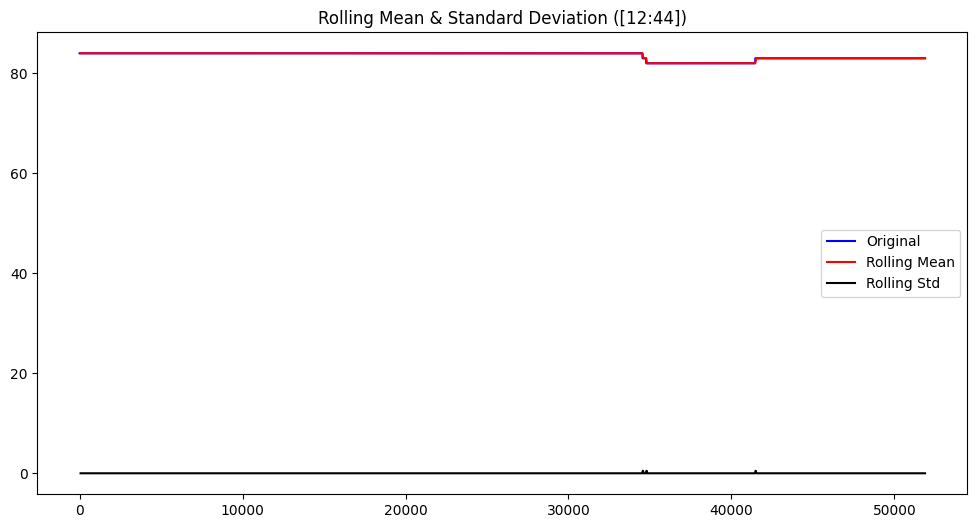

Column [9:12]


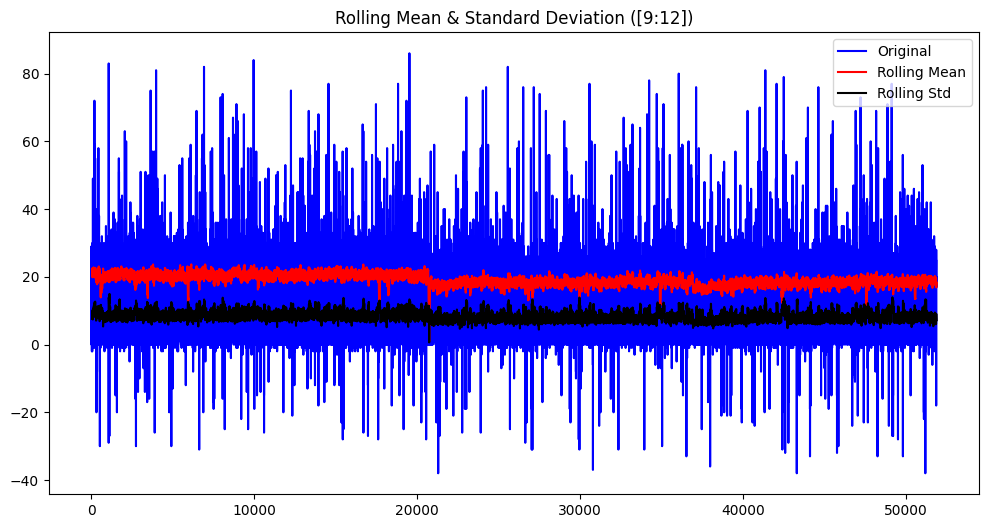

Column [9:13]


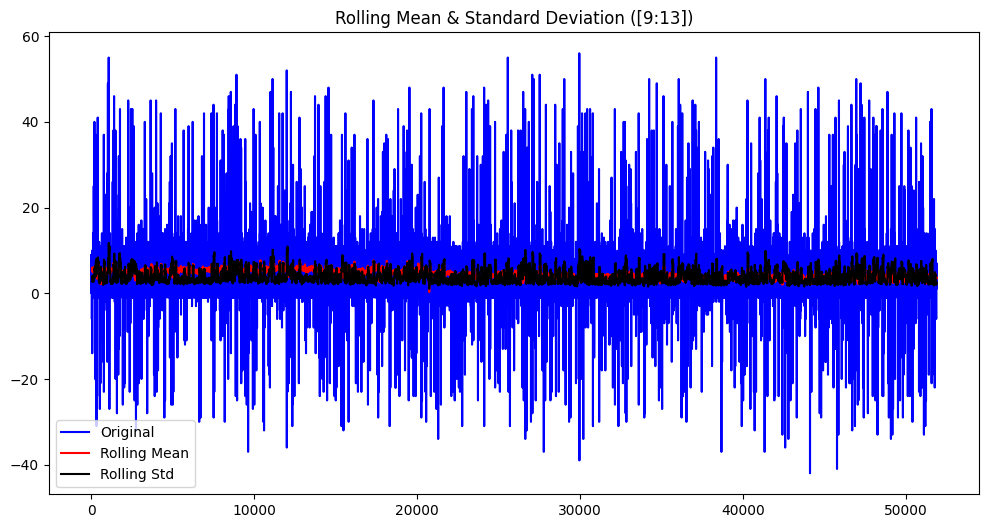

Column [9:14]


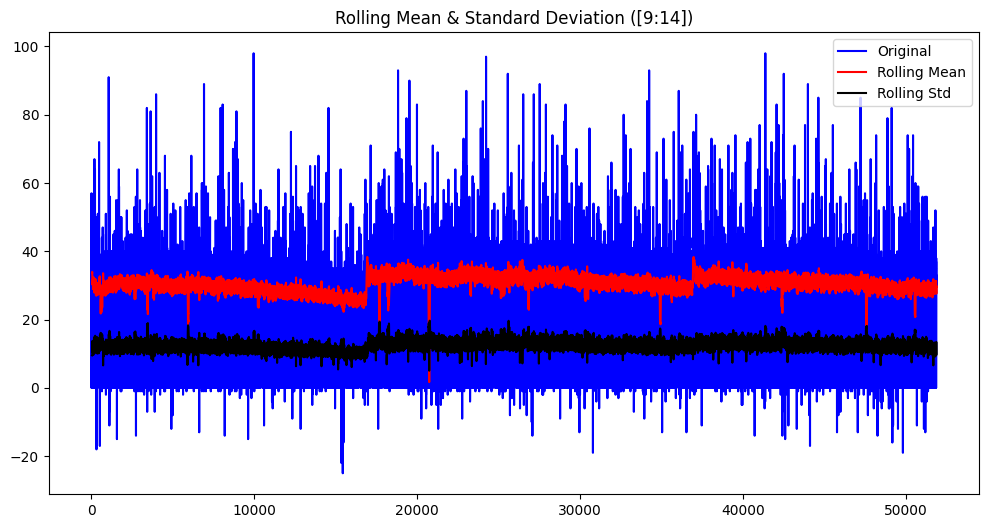

Column [9:15]


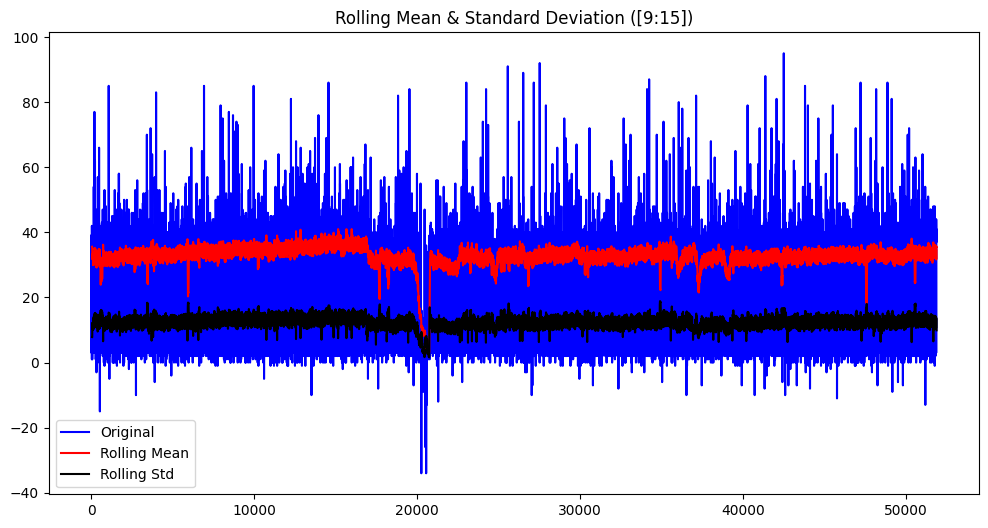

Column [9:16]


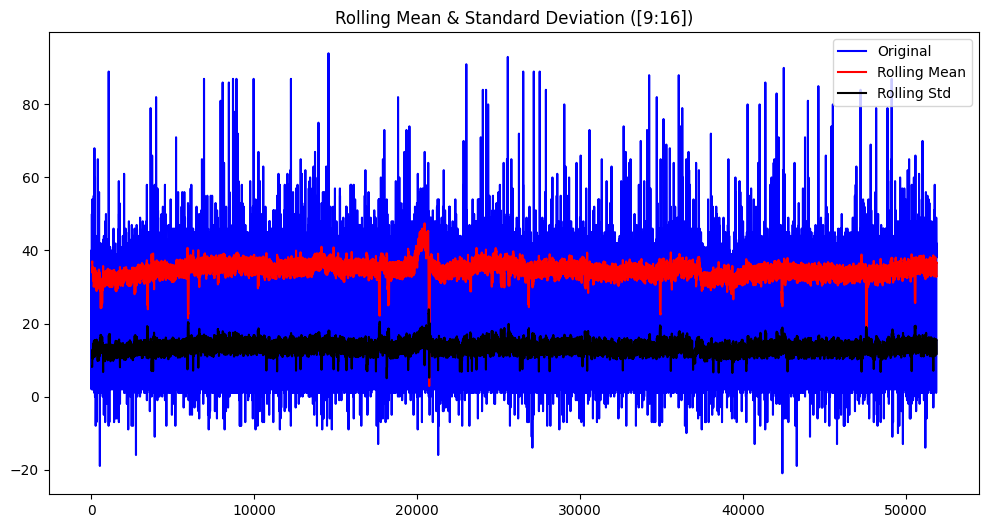

Column [9:17]


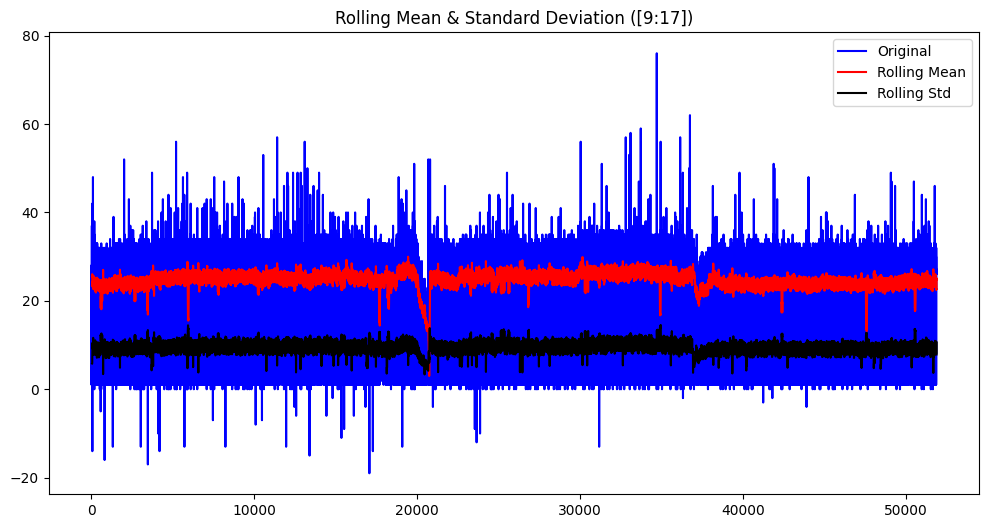

Column [9:47]


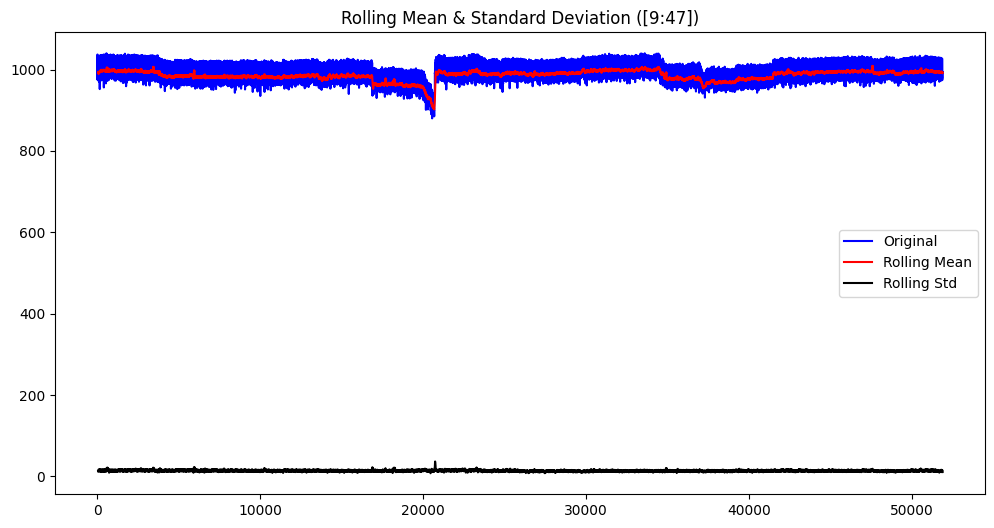

Column [9:48]


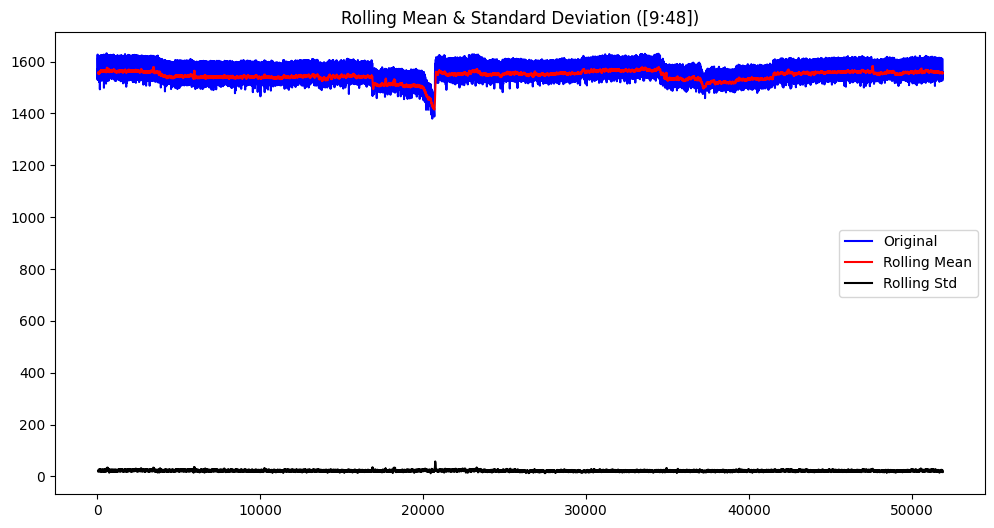

Column [9:49]


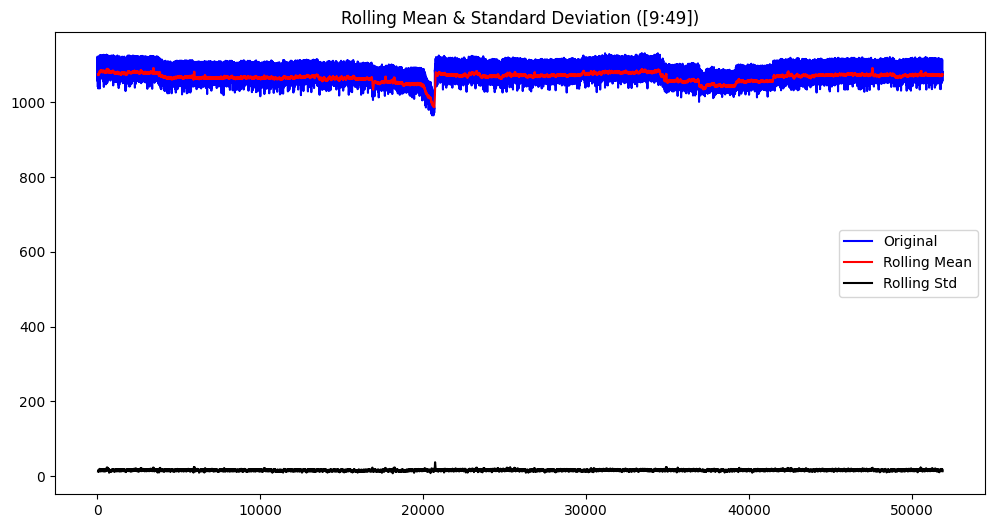

Column [9:50]


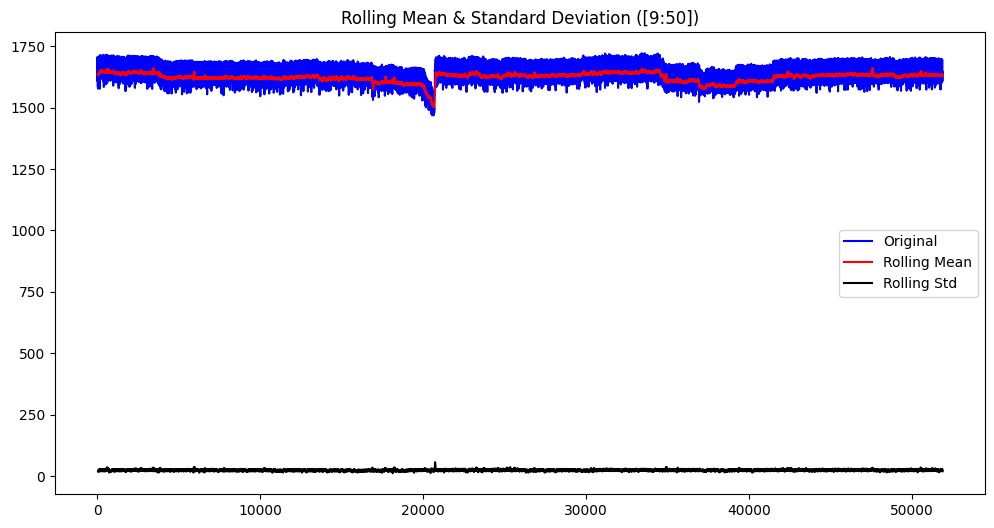

Column [9:51]


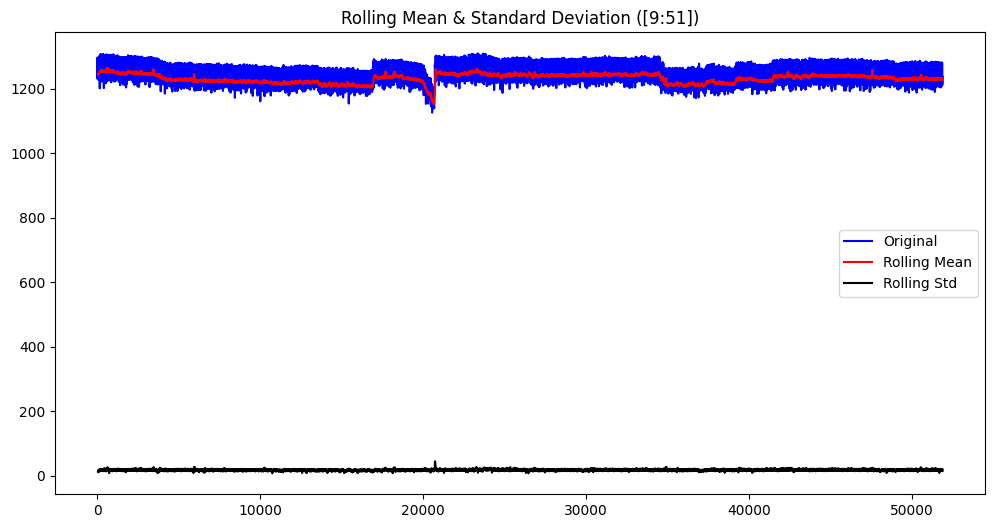

Column [9:52]


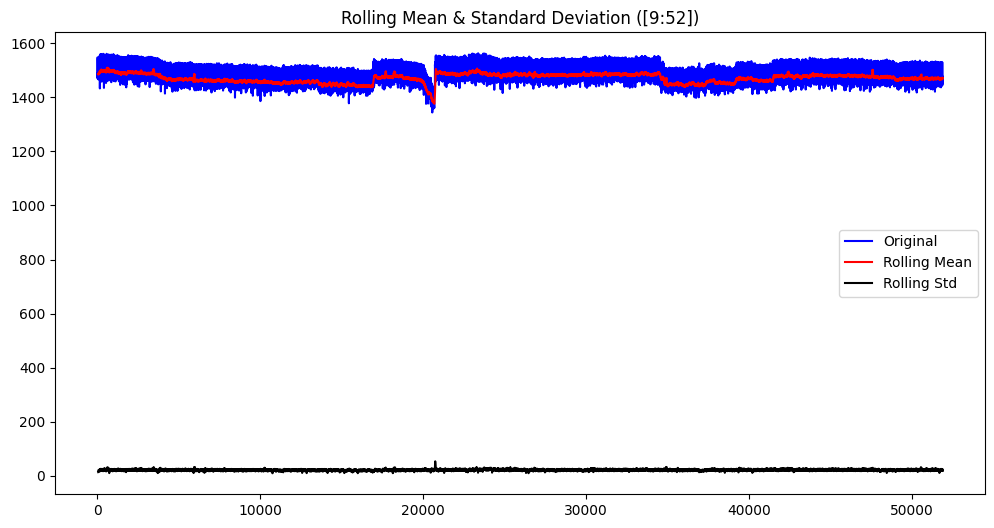

Column [9:53]


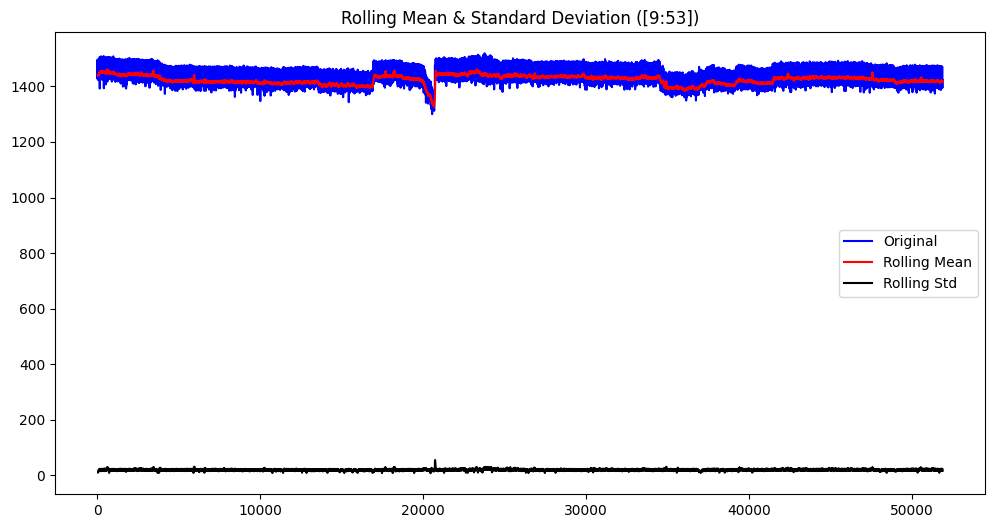

Column [9:54]


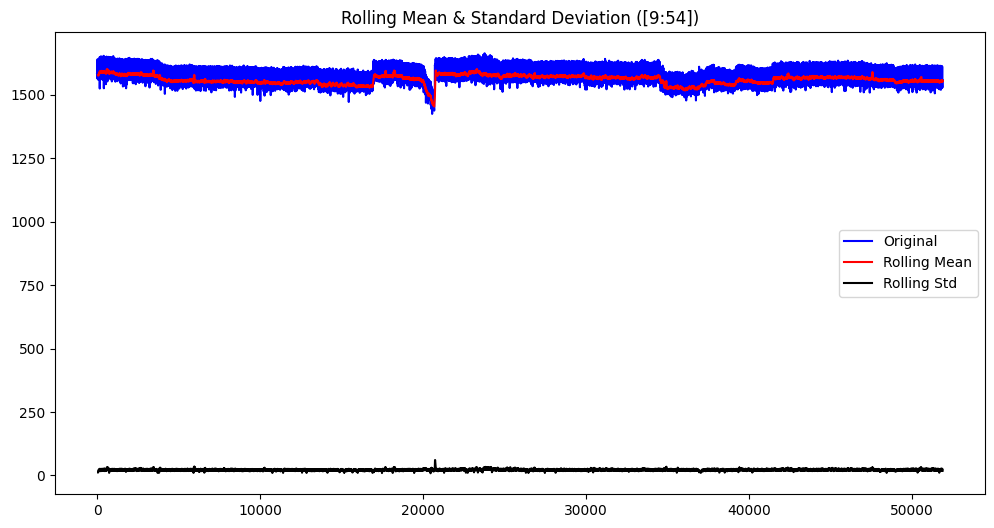

Column [9:55]


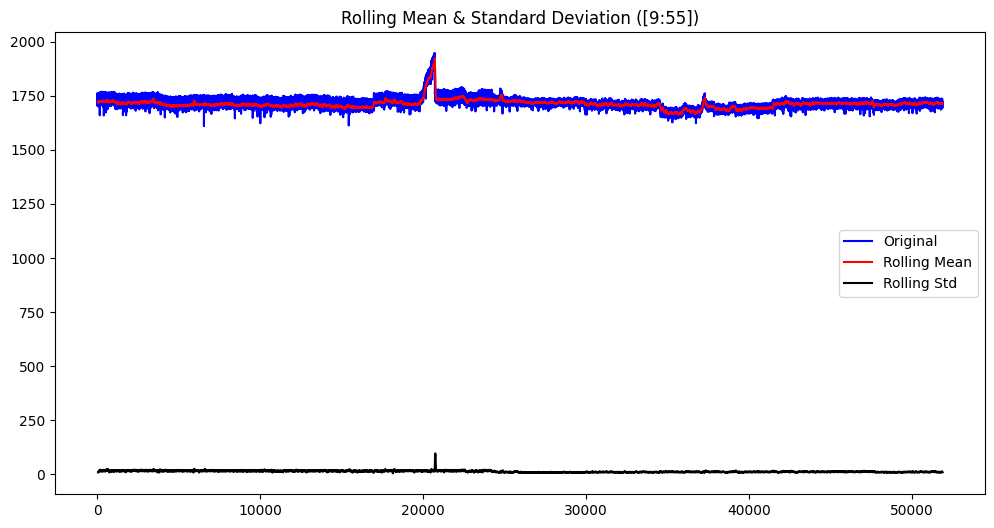

Column [9:56]


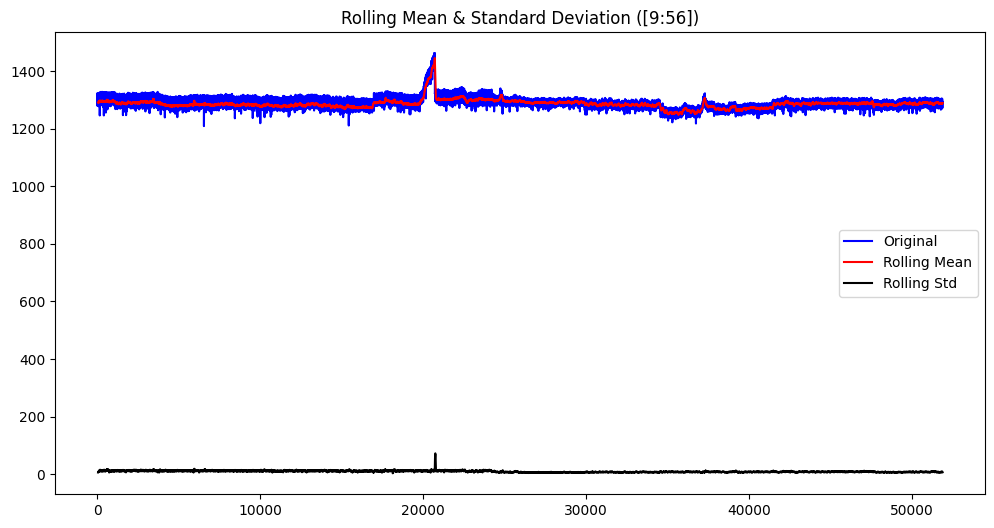

Column [9:57]


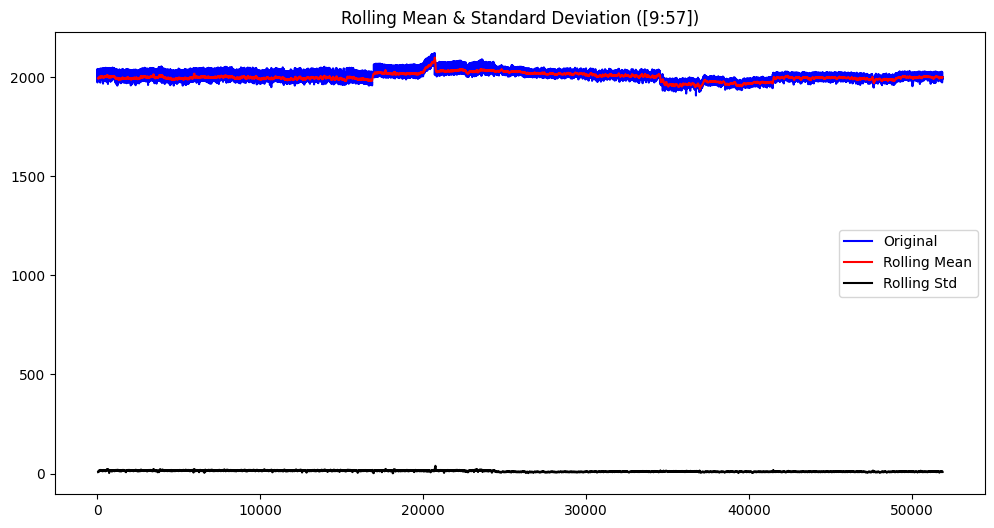

Column [9:58]


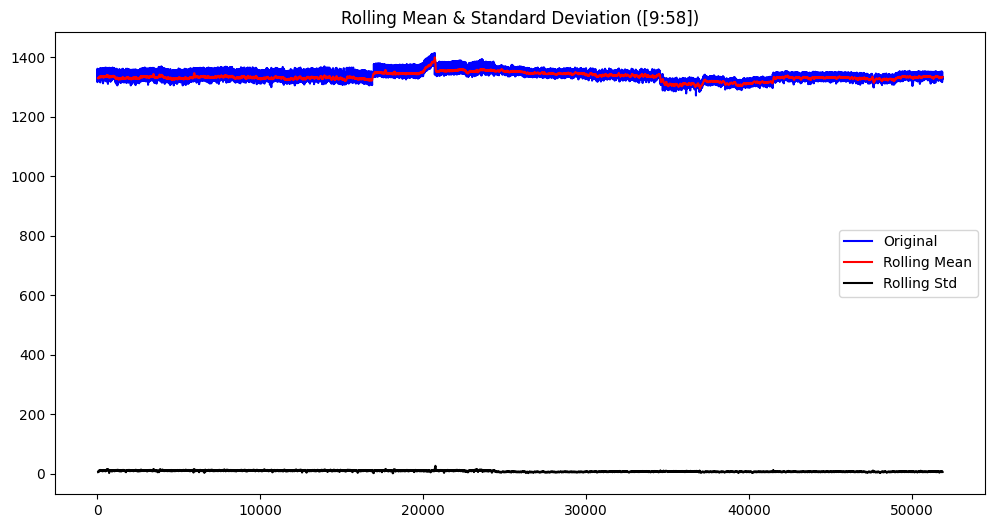

Column [9:64]


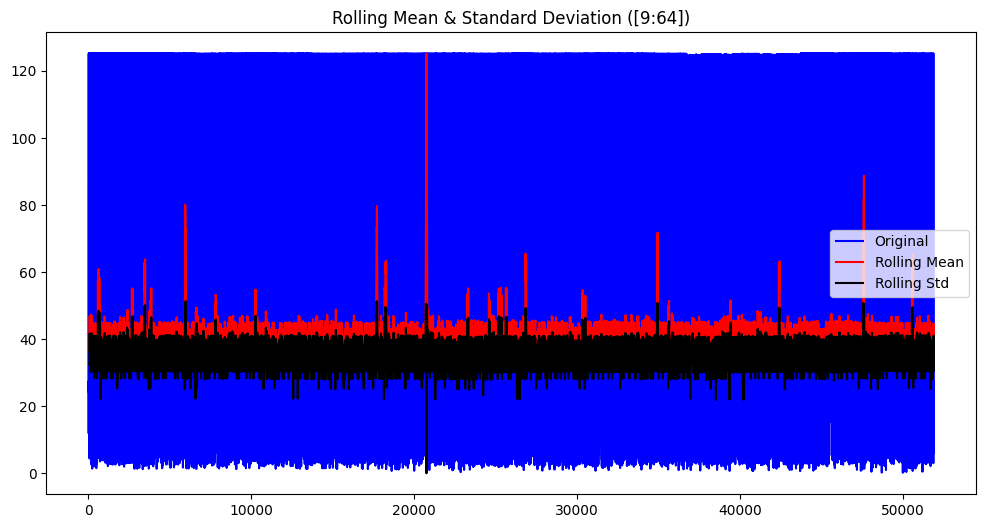

Column [9:65]


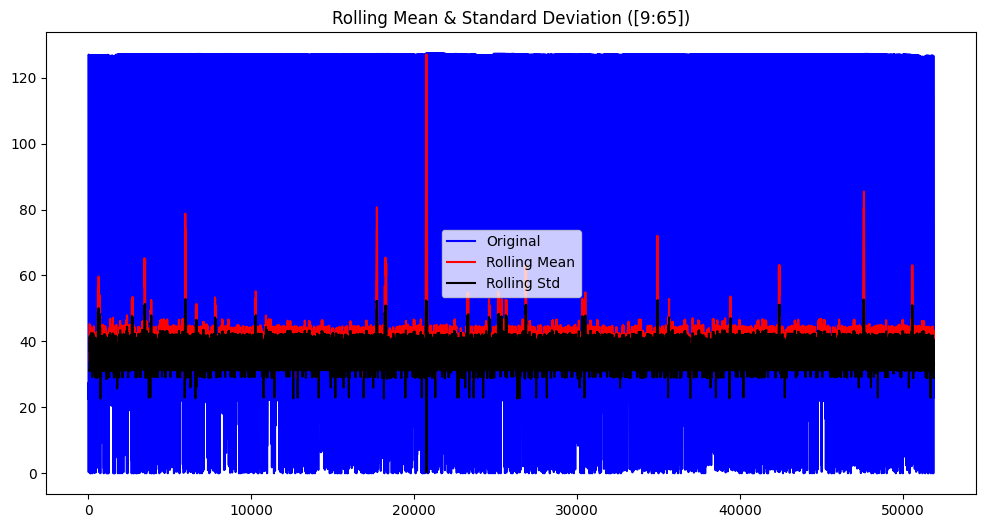

Column [9:66]


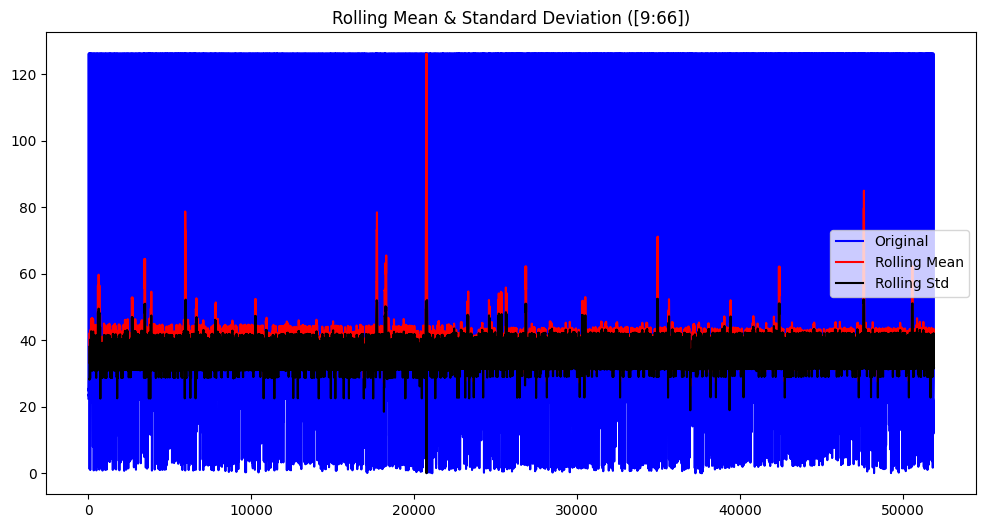

Column [9:67]


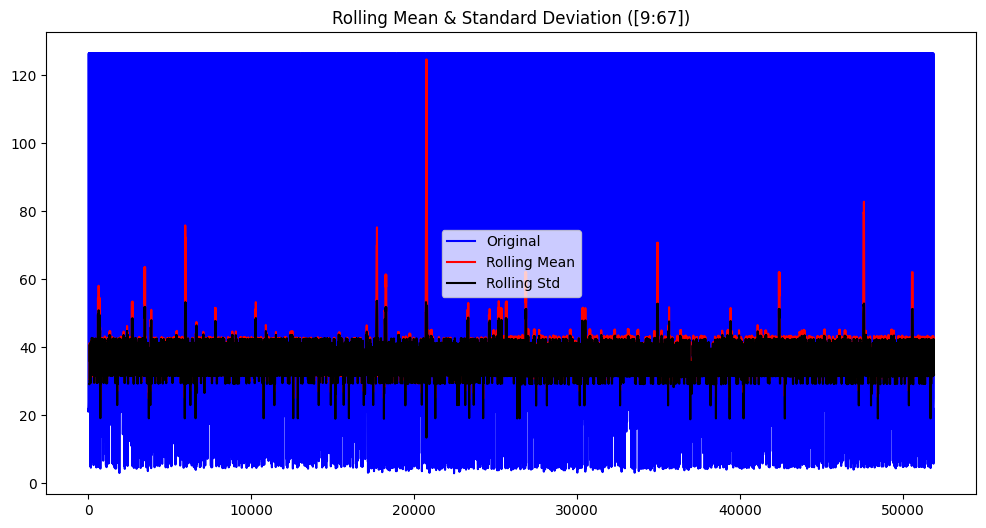

Column [9:68]


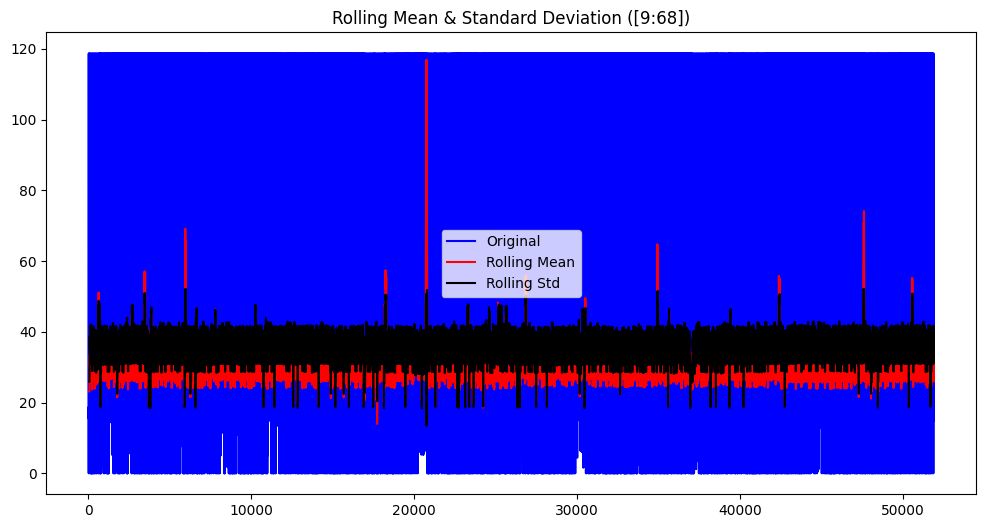

Column [9:69]


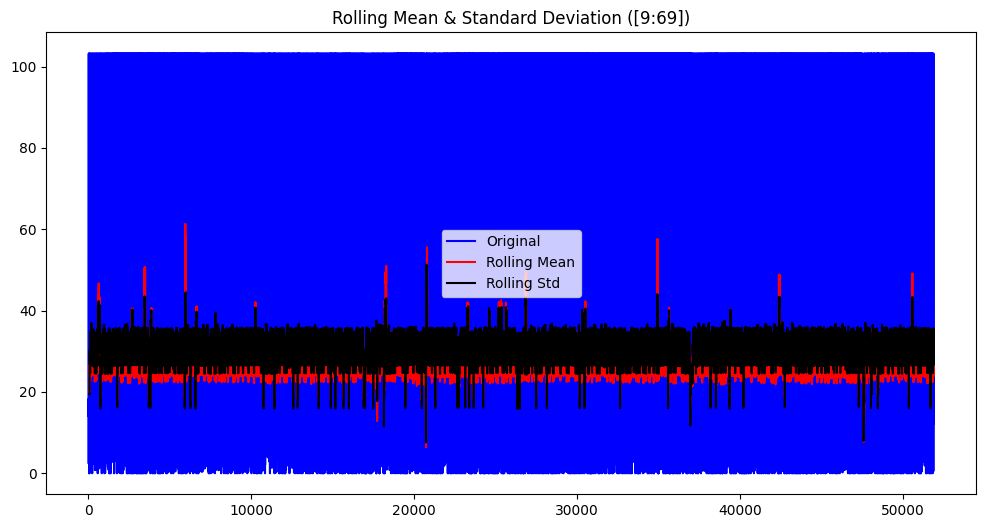

Column [9.17]


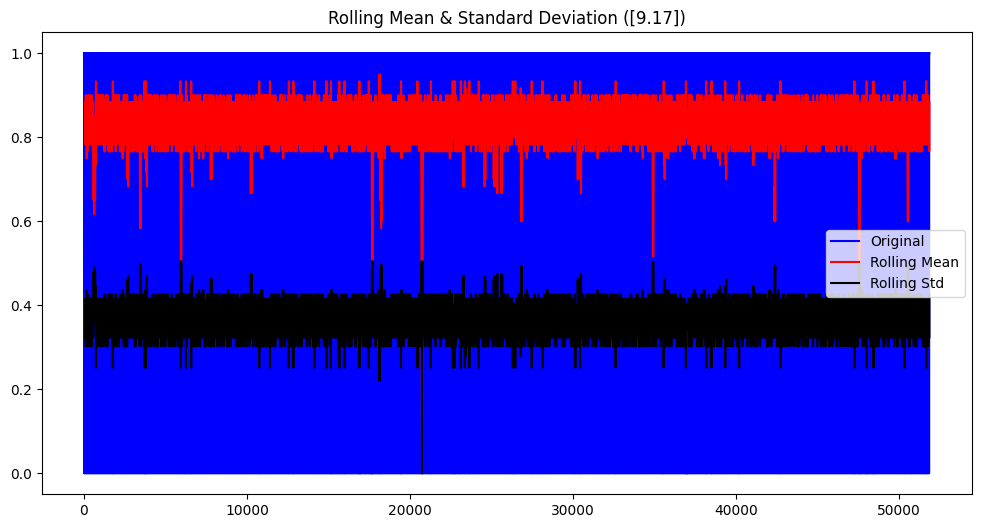

Column [9.18]


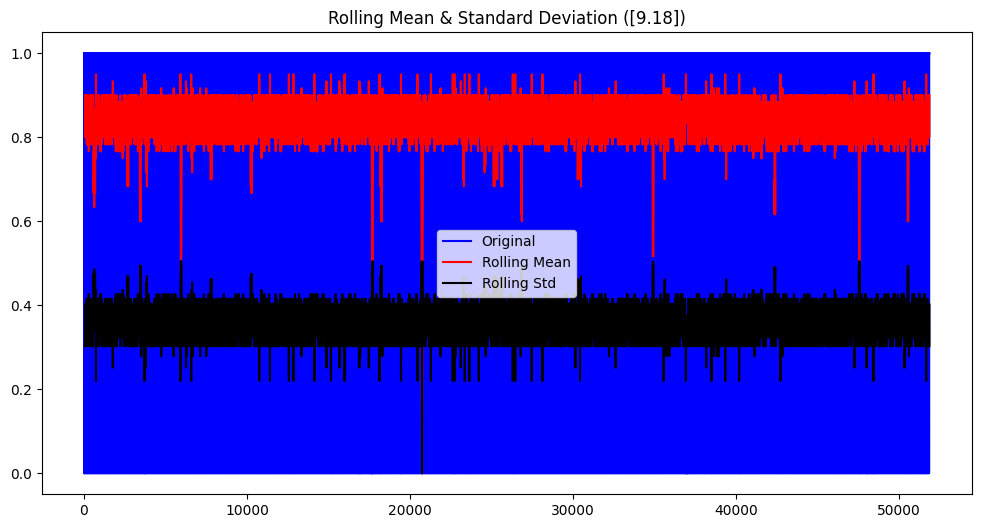

Column [9.19]


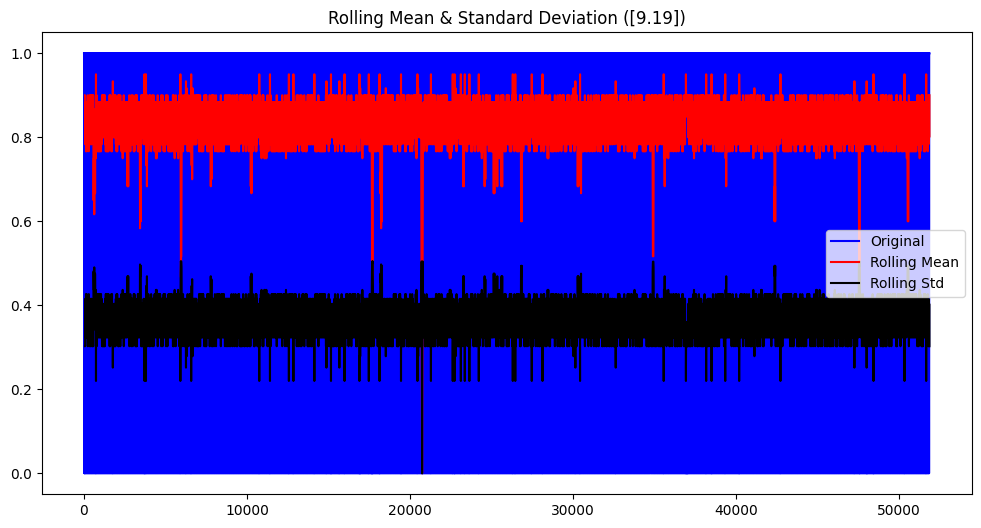

Column [9.20]


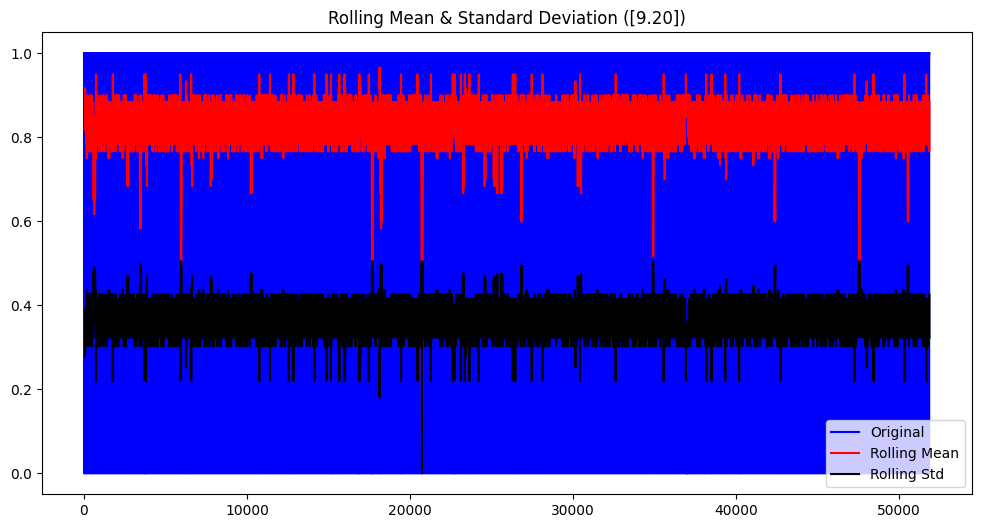

Column [9.21]


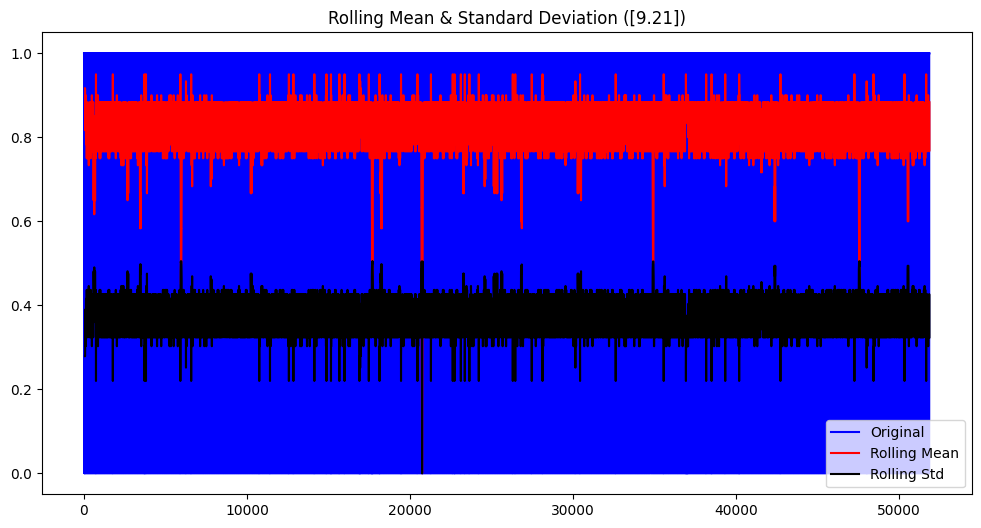

Column [12:42]


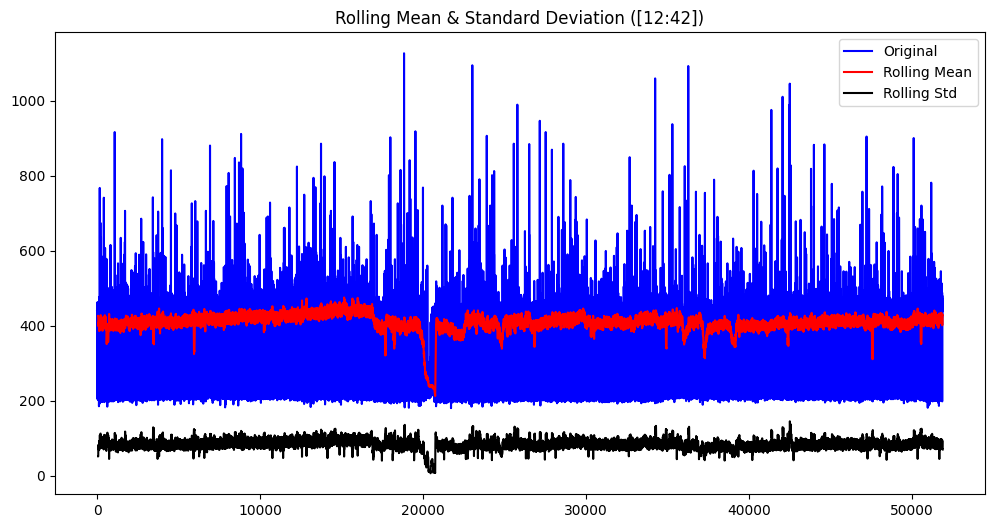

Column [12:43]


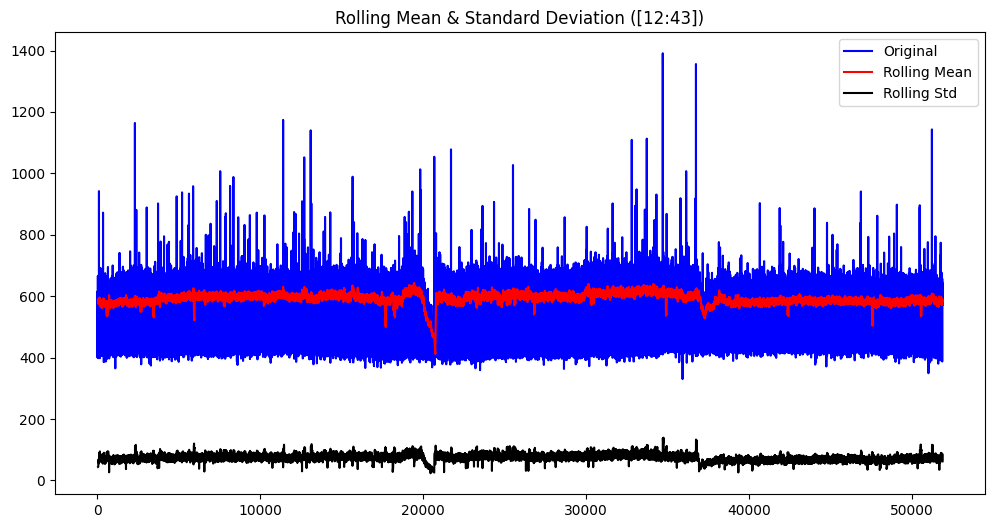

Column [12:65]


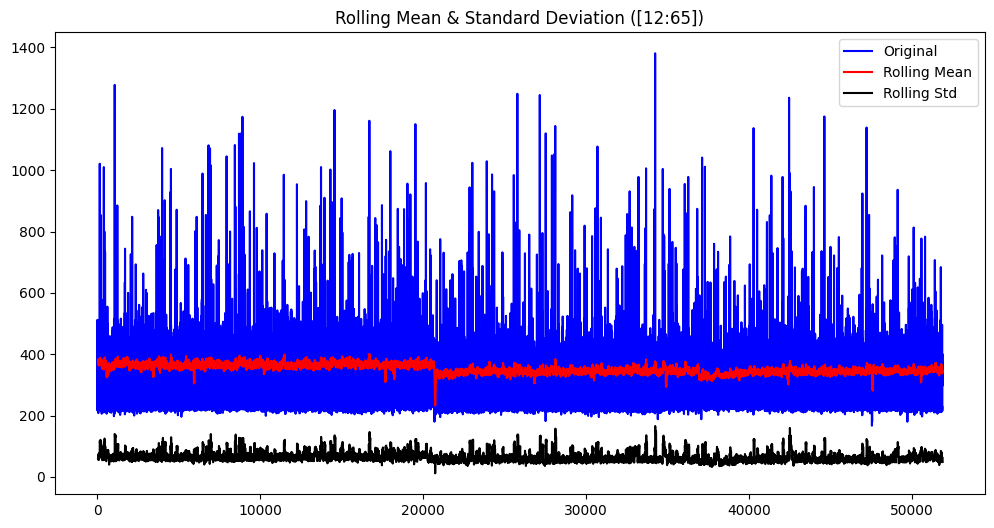

Column [12:66]


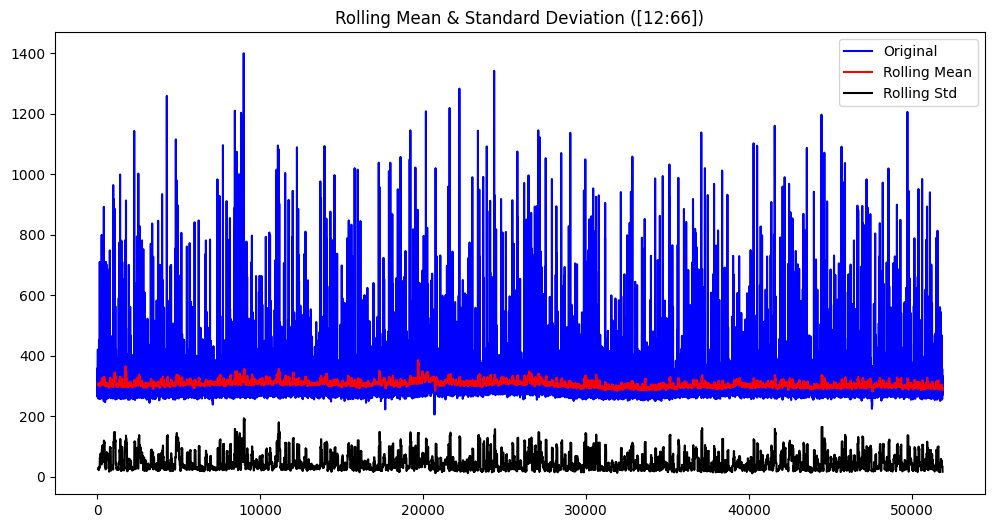

Column [12:67]


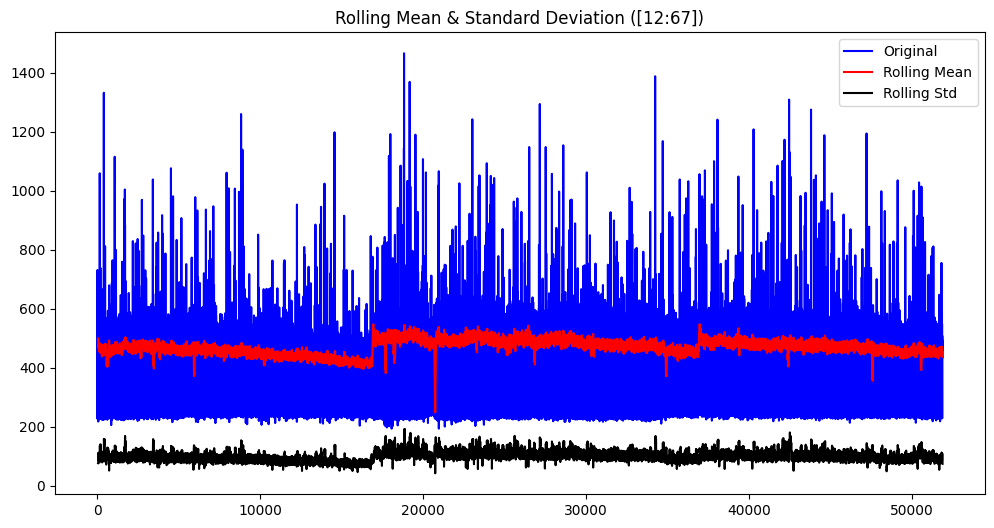

Column [12:68]


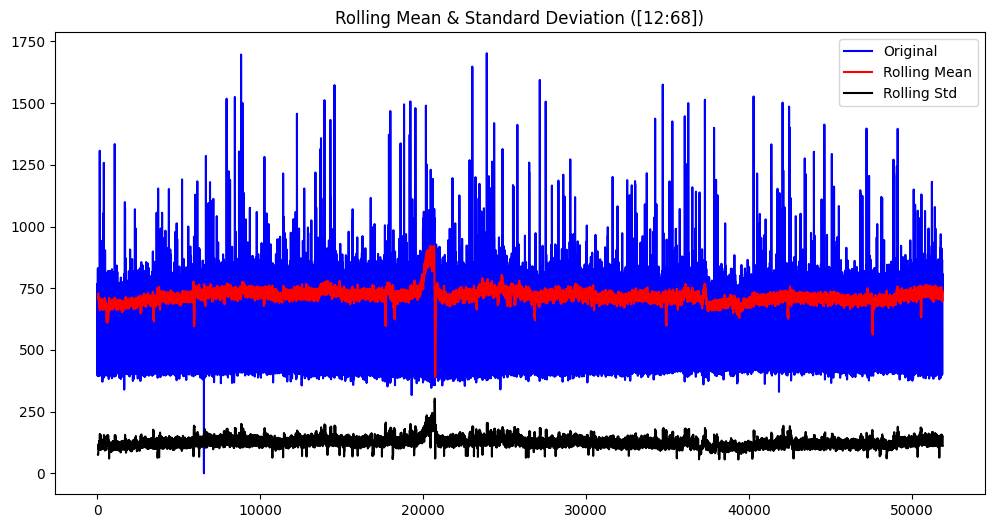

Column [11:21]


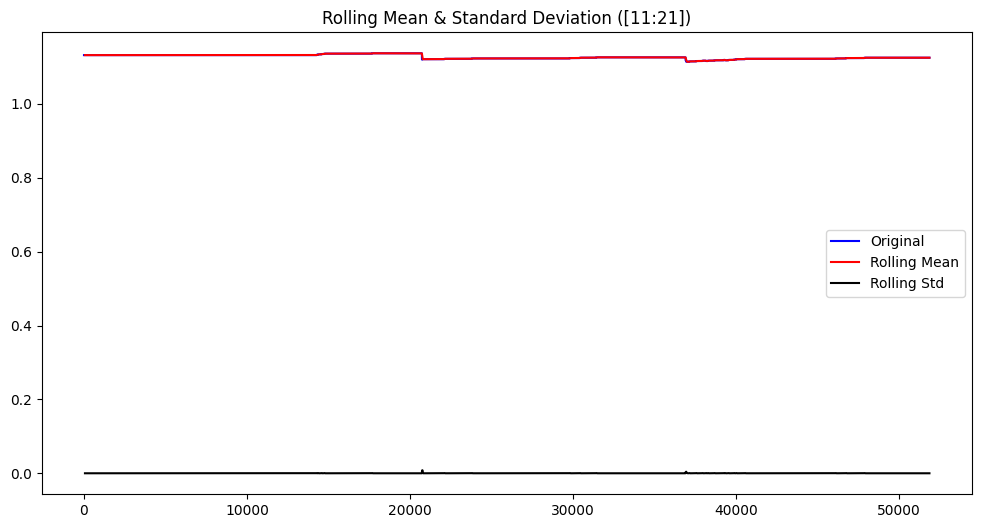

Column [11:22]


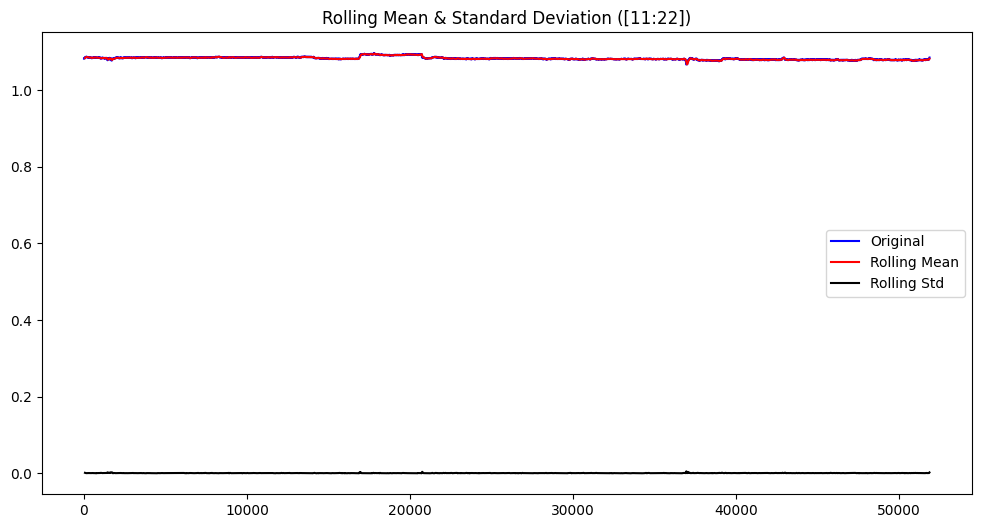

Column [11:23]


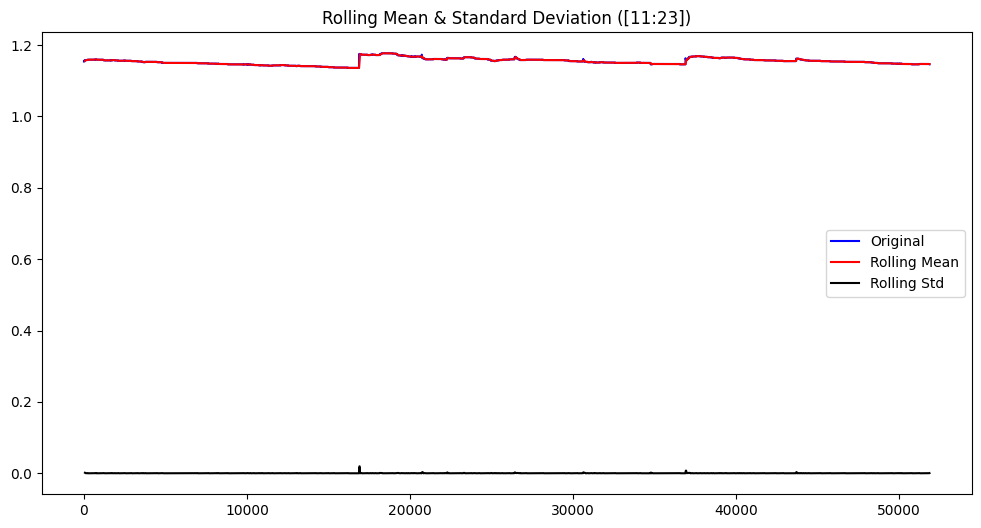

Column [11:24]


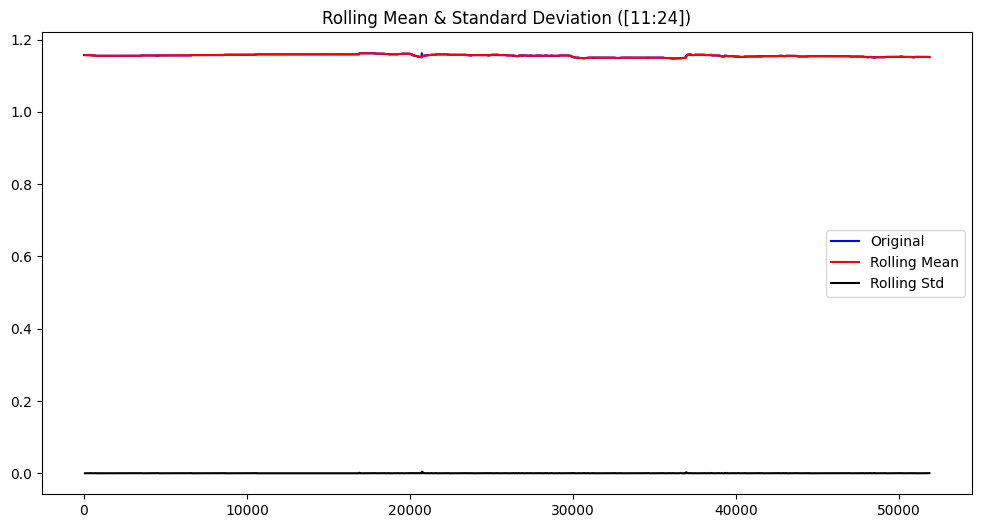

Column [11:25]


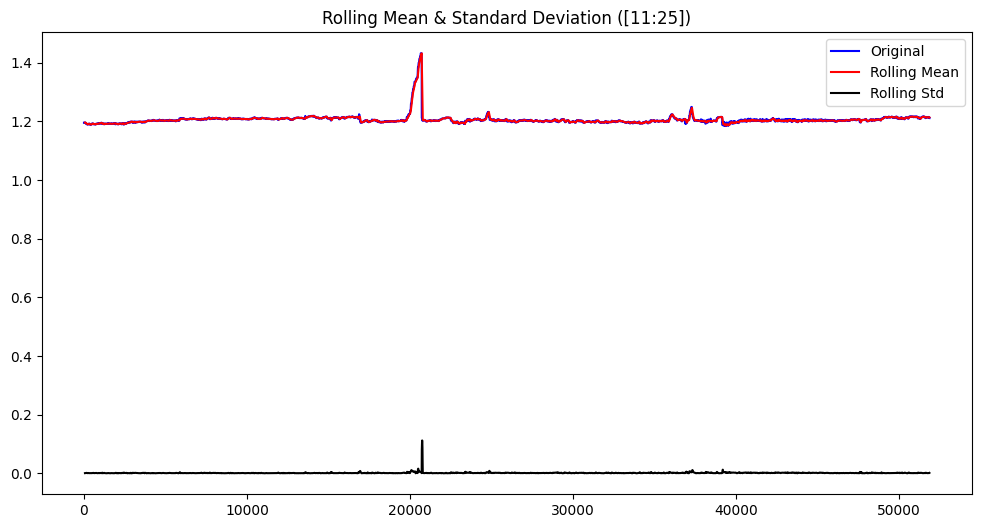

Column [11:26]


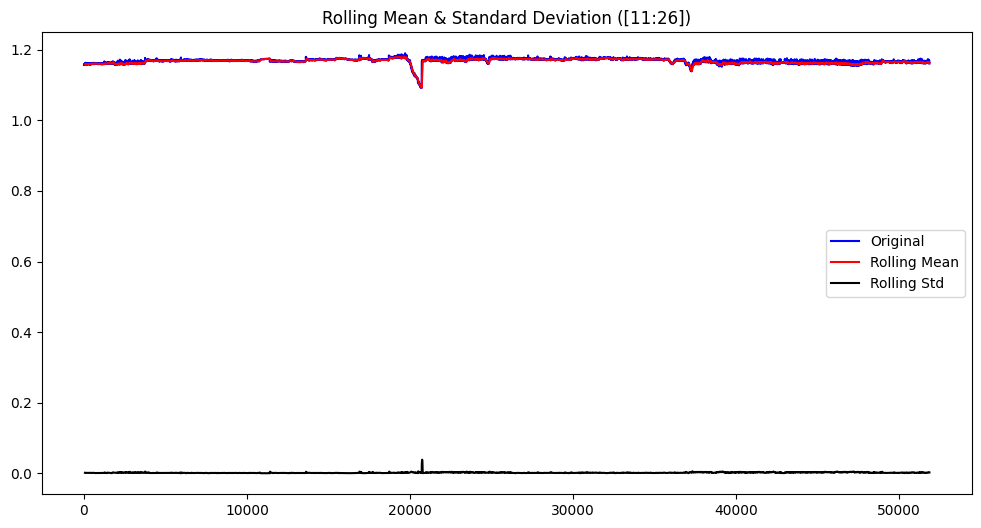

In [18]:
for column in df_final.columns:
    print(f"Column {column}")
    plot_rolling_statistics(df_final[column], title=column)

The data looks stationary

# 3. Modelling the dataset

### ARIMA Model

In [19]:
# firstly, applying on one column

for column in df_final.columns:
  train_size = int(len(df_final) * 0.8)
  train, test = df_final['[11:24]'][:train_size], df_final['[11:24]'][train_size:]

In [20]:
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
# Forecasting
forecast = model_fit.forecast(steps=len(test))

In [23]:
# Evaluations
mae = mean_absolute_error(test, forecast)
print(f'Mean Absolute Error: {mae}')

mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')

rmse = mean_squared_error(test, forecast, squared=False)
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 0.0011299990363303268
Mean Squared Error: 2.424014647778654e-06
Root Mean Squared Error: 0.0015569247405634783


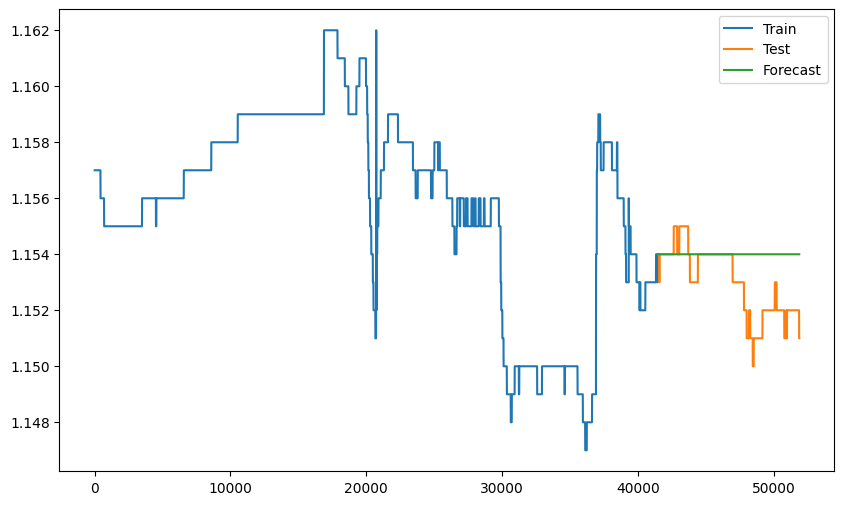

In [24]:
# Visualizing the result

plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pd.Series(forecast, index=test.index), label='Forecast')
plt.legend()
plt.show()

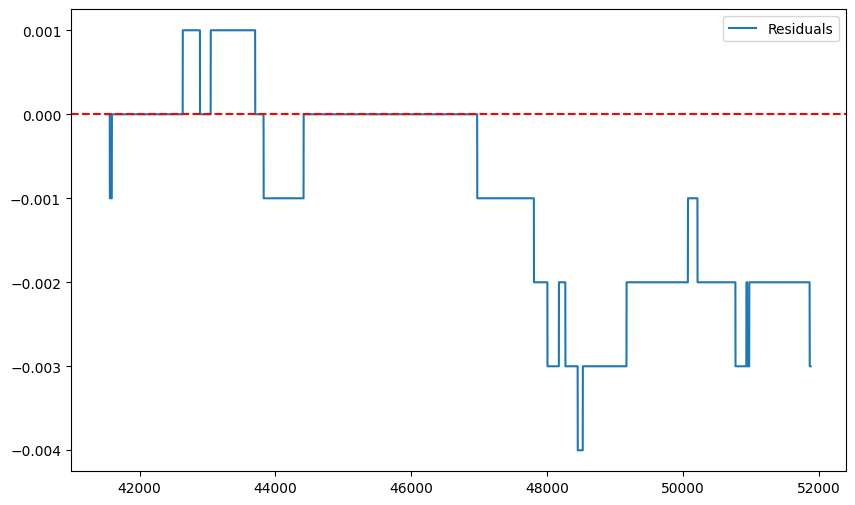

In [25]:
residuals = test - forecast

plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

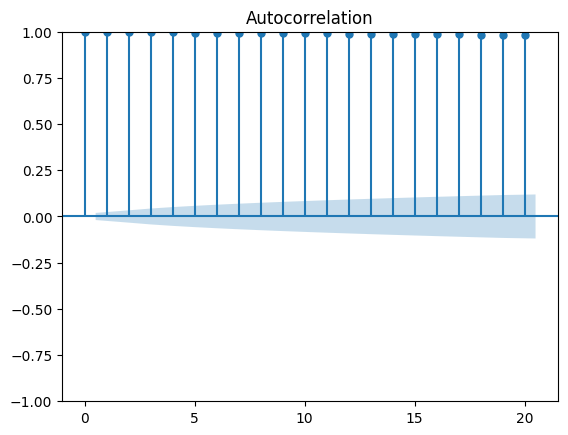

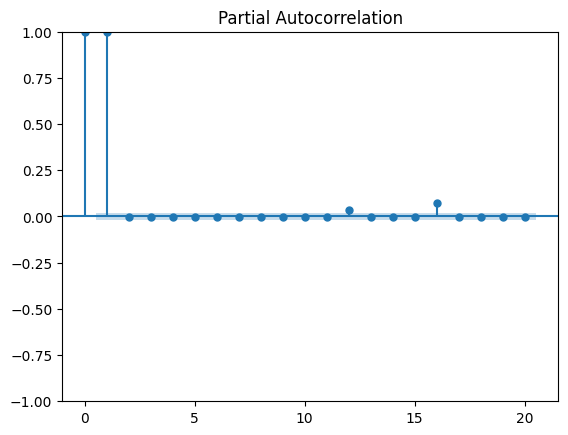

In [26]:
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=20)
plot_pacf(residuals, lags=20)
plt.show()

In [27]:
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(lb_test)

          lb_stat  lb_pvalue
10  102825.655671        0.0


Applying the above process for all the columns

Column [12:44]
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


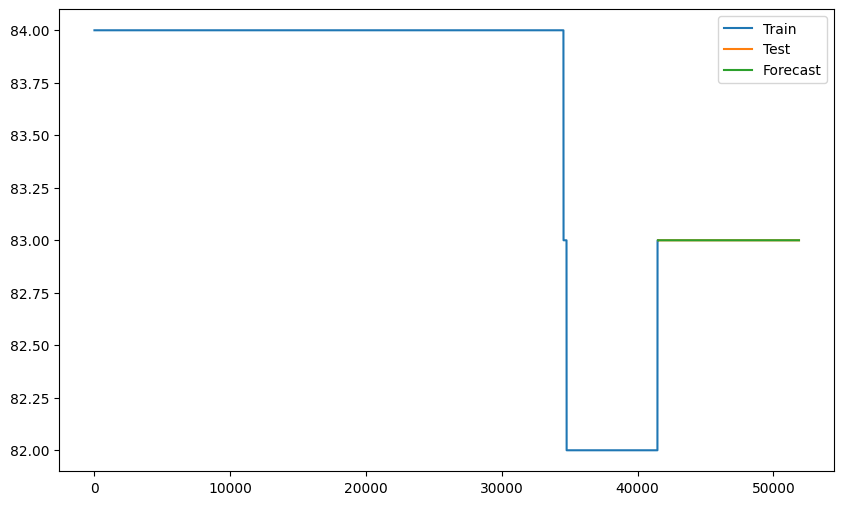

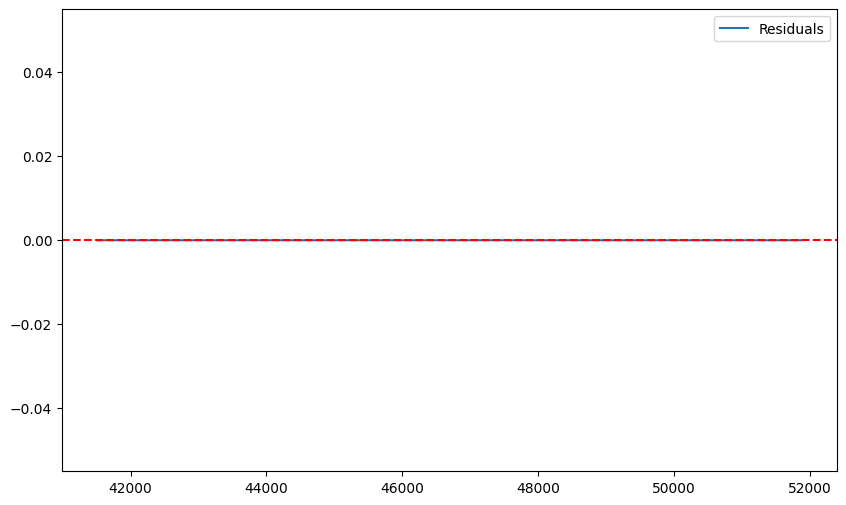

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:693: RuntimeWarning: divide by zero encountered in divide
  acf = avf[: nlags + 1] / avf[0]
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:693: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1491: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


<Figure size 1000x600 with 0 Axes>

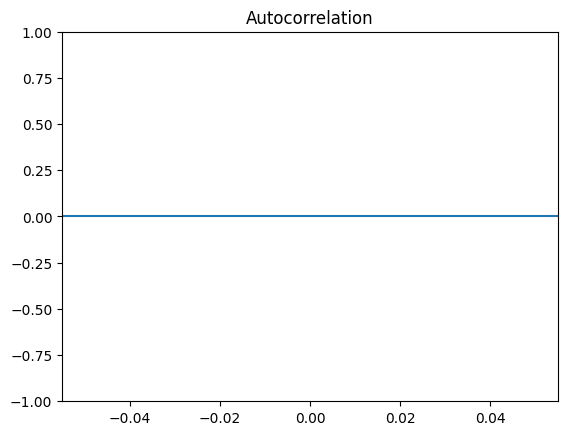

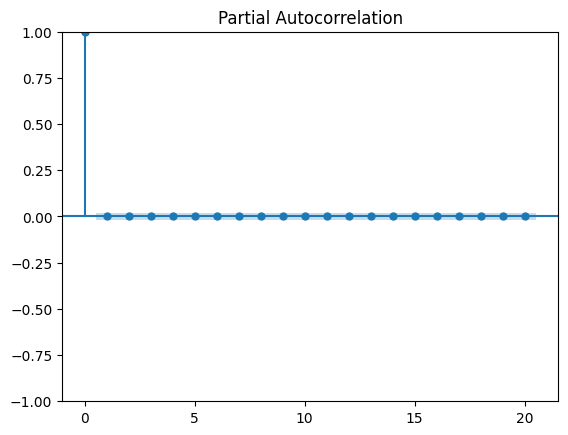

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:693: RuntimeWarning: divide by zero encountered in divide
  acf = avf[: nlags + 1] / avf[0]
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:693: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


    lb_stat  lb_pvalue
10      NaN        NaN
Column [9:12]
Mean Absolute Error: 5.128212944886253
Mean Squared Error: 83.32357679244654
Root Mean Squared Error: 9.128174888357833


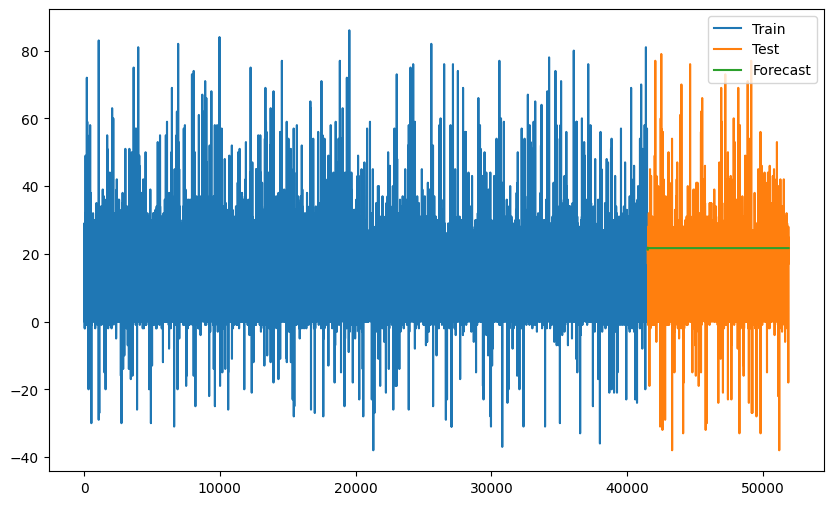

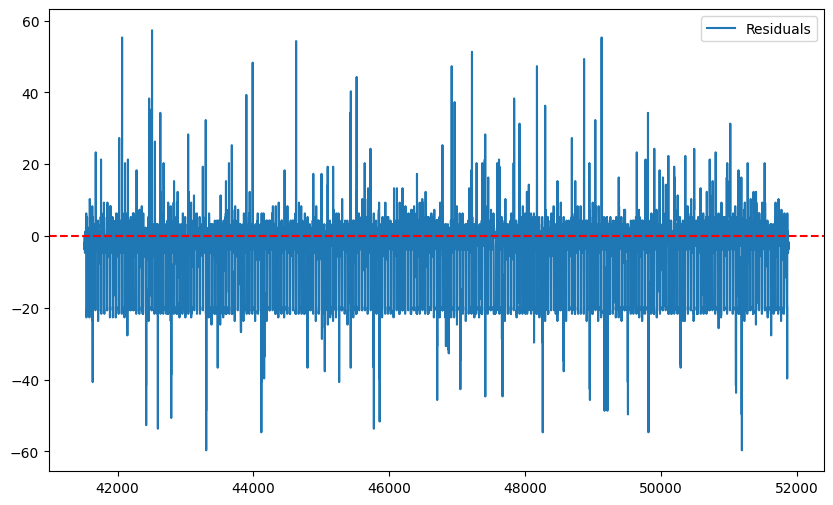

<Figure size 1000x600 with 0 Axes>

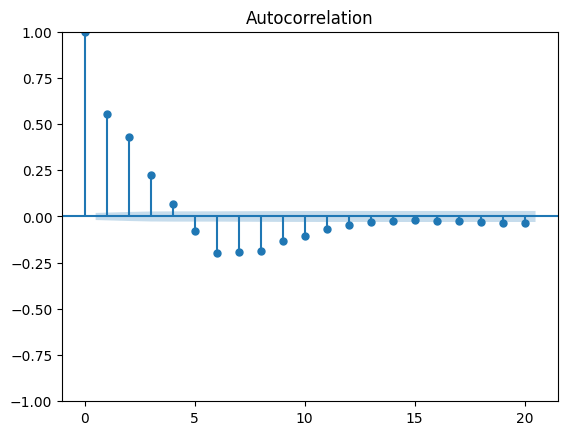

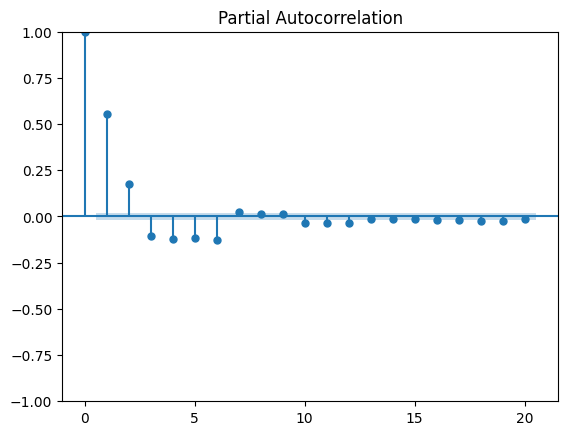

       lb_stat  lb_pvalue
10  7208.57022        0.0
Column [9:13]
Mean Absolute Error: 2.4231477106779744
Mean Squared Error: 21.966293302572982
Root Mean Squared Error: 4.686821236464325


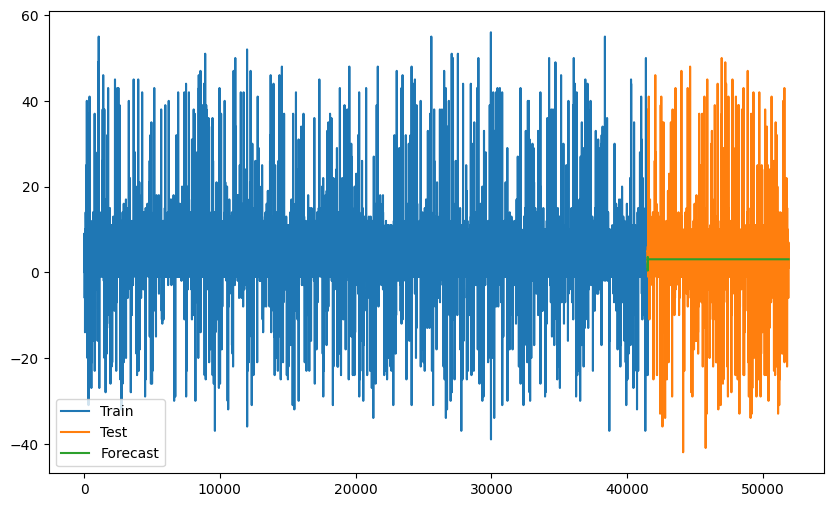

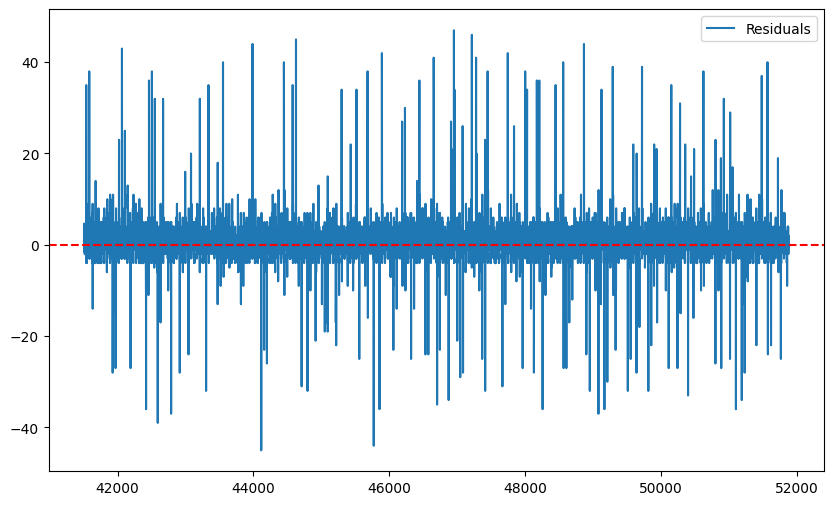

<Figure size 1000x600 with 0 Axes>

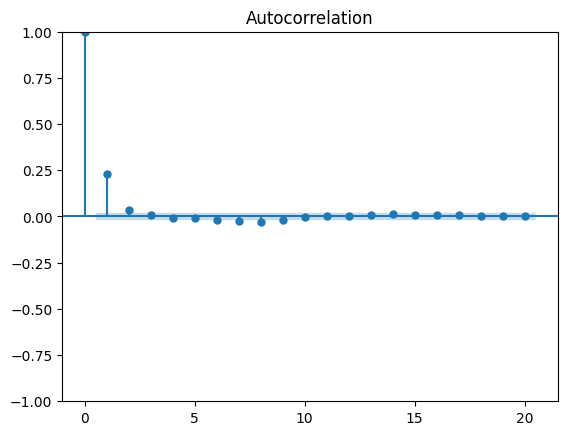

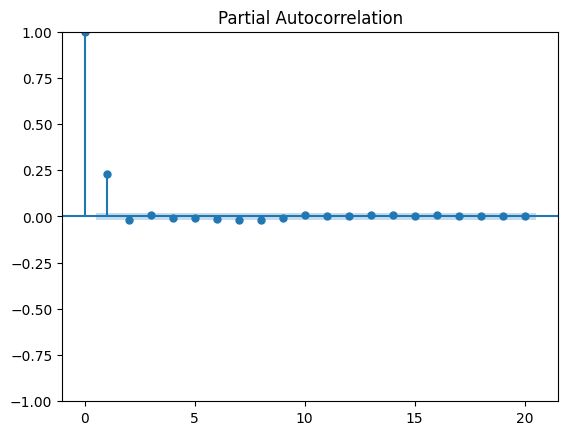

       lb_stat      lb_pvalue
10  578.600457  6.756418e-118
Column [9:14]
Mean Absolute Error: 6.907745600088213
Mean Squared Error: 186.05808230810442
Root Mean Squared Error: 13.640310931503887


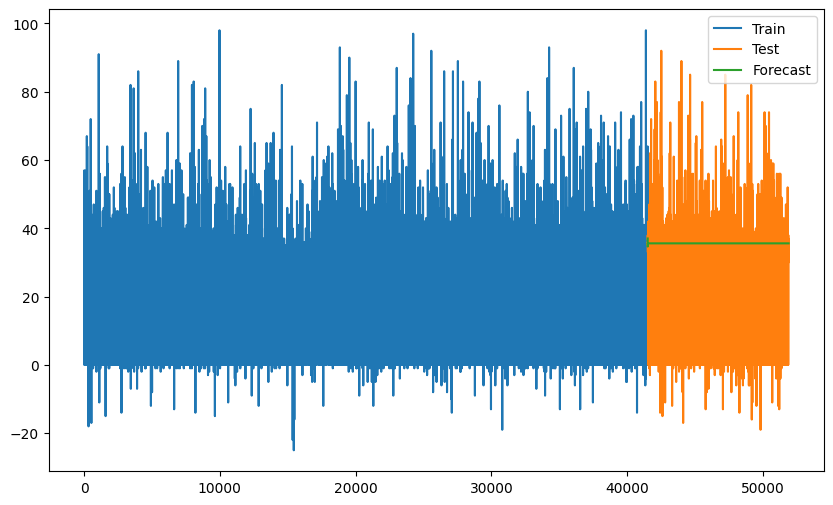

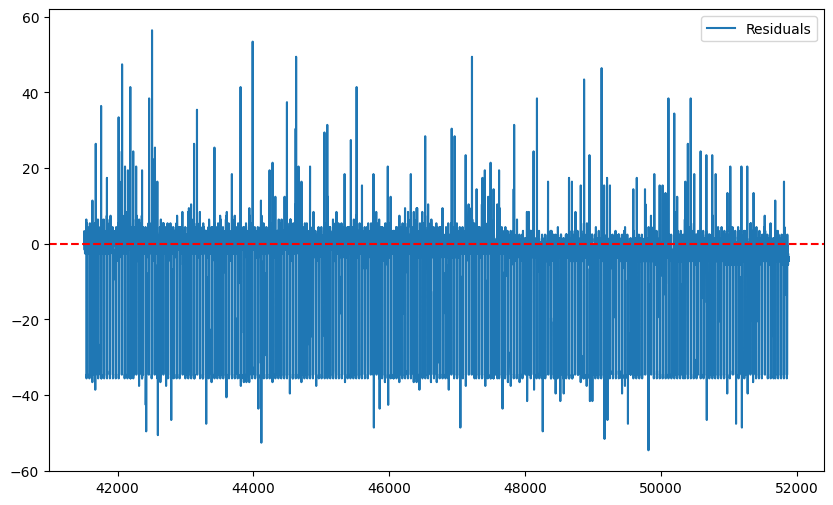

<Figure size 1000x600 with 0 Axes>

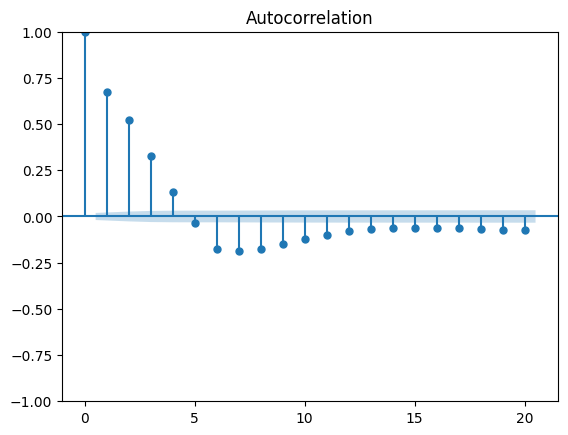

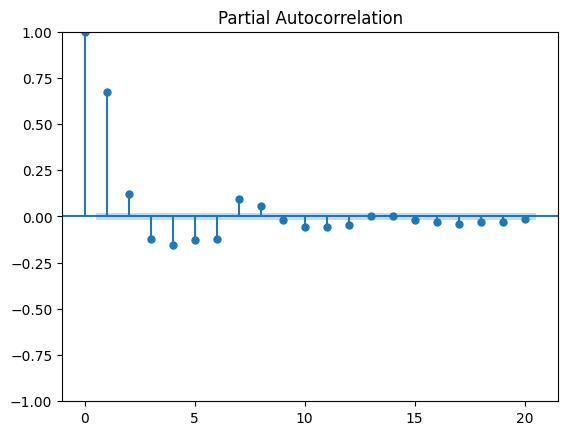

         lb_stat  lb_pvalue
10  10246.816381        0.0
Column [9:15]
Mean Absolute Error: 6.558380291122217
Mean Squared Error: 168.312784560447
Root Mean Squared Error: 12.973541712286858


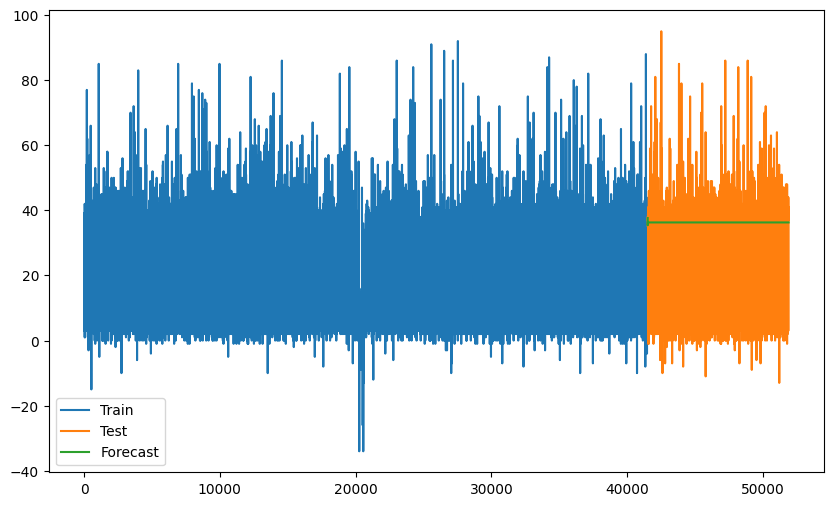

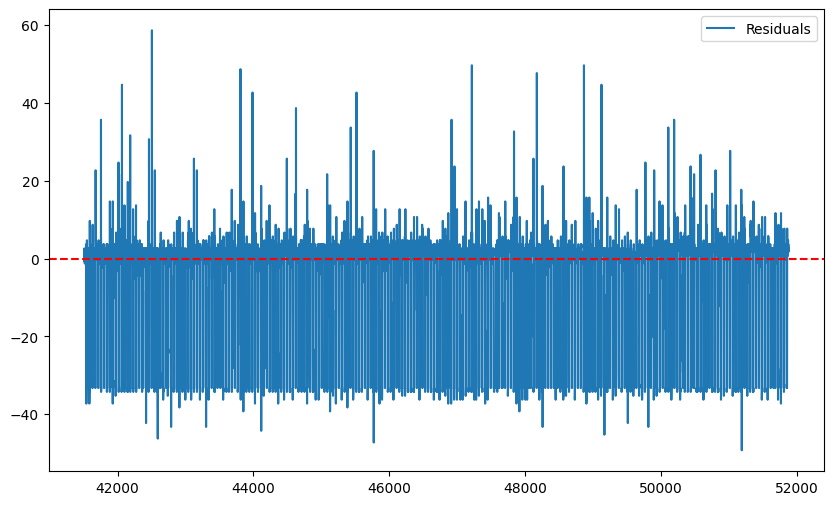

<Figure size 1000x600 with 0 Axes>

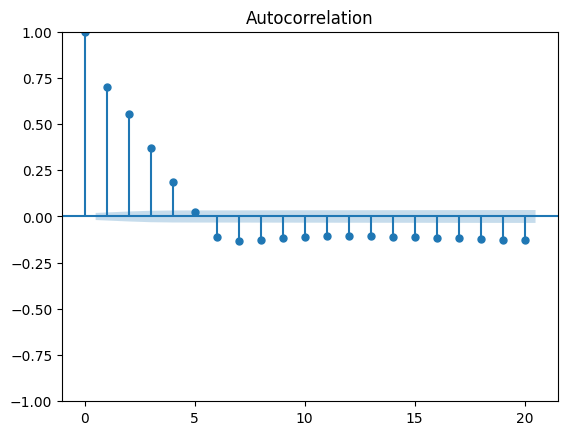

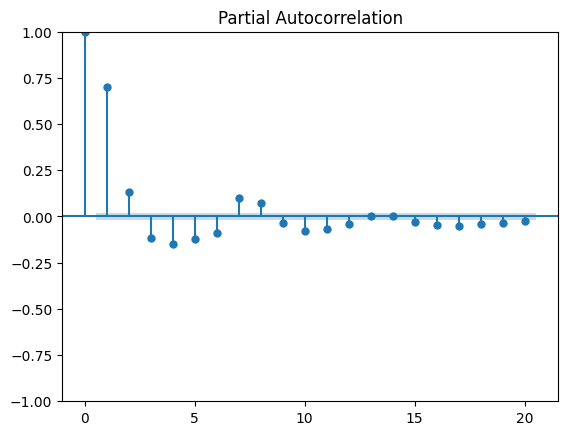

         lb_stat  lb_pvalue
10  10797.783513        0.0
Column [9:16]
Mean Absolute Error: 8.364171279178443
Mean Squared Error: 182.08675391383116
Root Mean Squared Error: 13.493952494129774


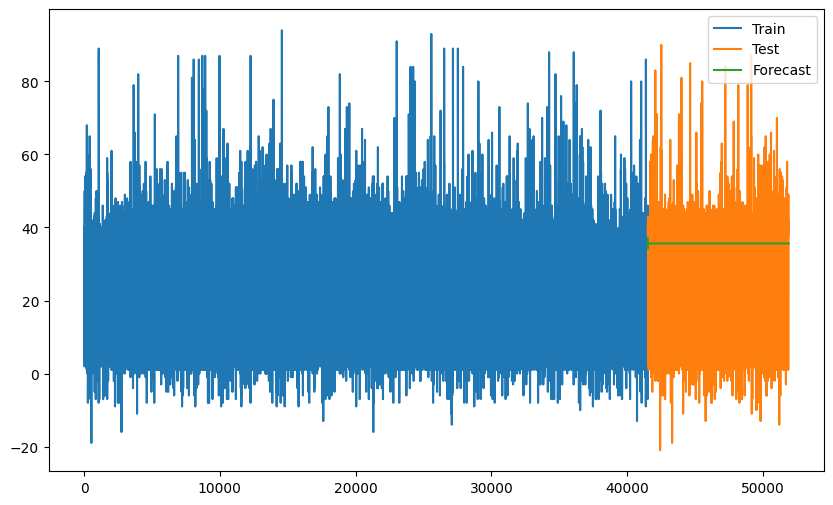

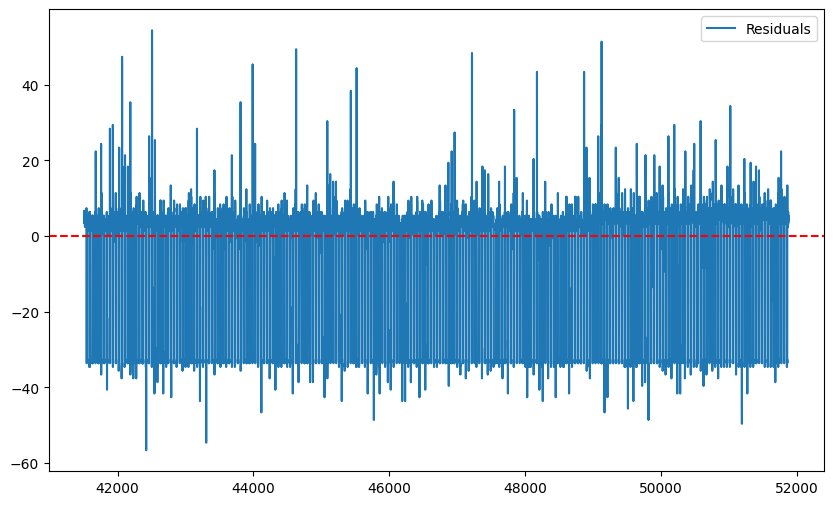

<Figure size 1000x600 with 0 Axes>

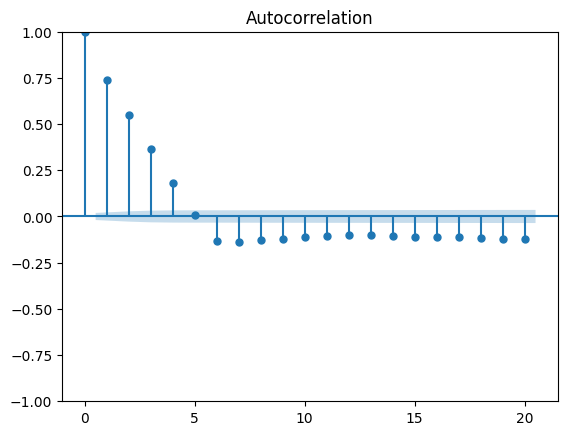

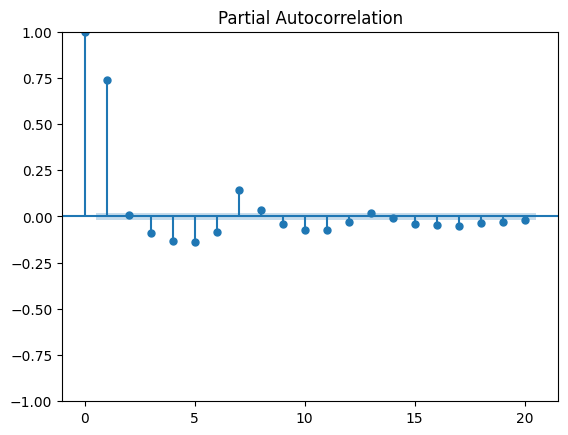

         lb_stat  lb_pvalue
10  11394.917938        0.0
Column [9:17]
Mean Absolute Error: 5.184628142362596
Mean Squared Error: 85.07101568592357
Root Mean Squared Error: 9.223395019510091


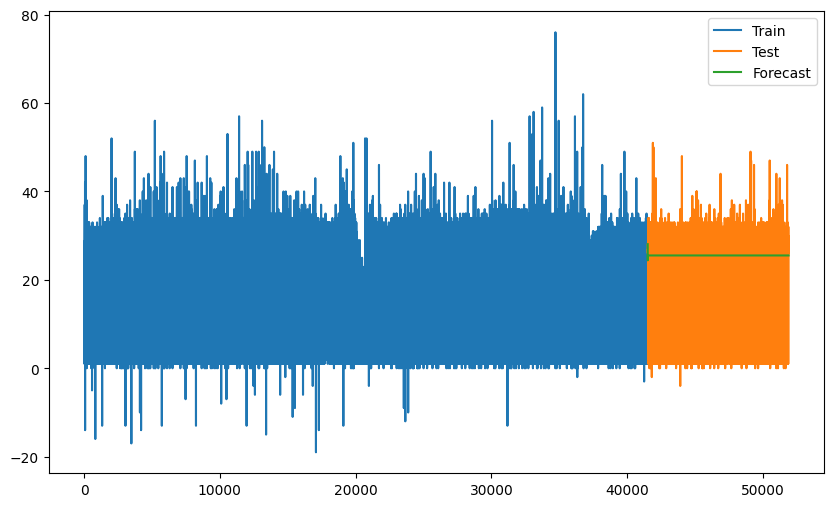

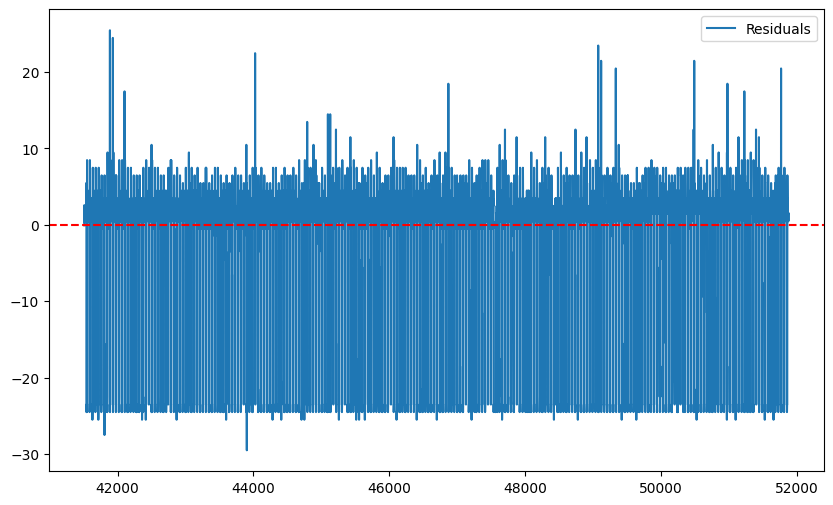

<Figure size 1000x600 with 0 Axes>

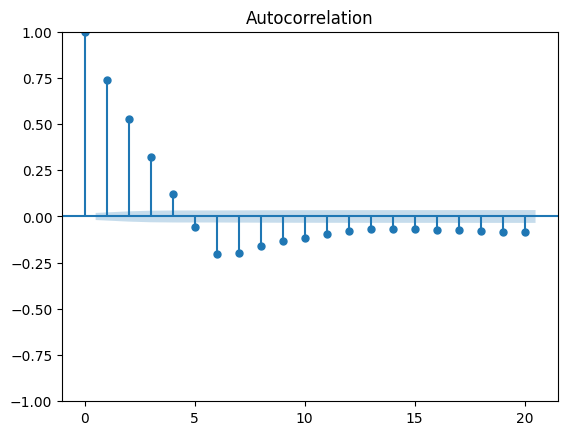

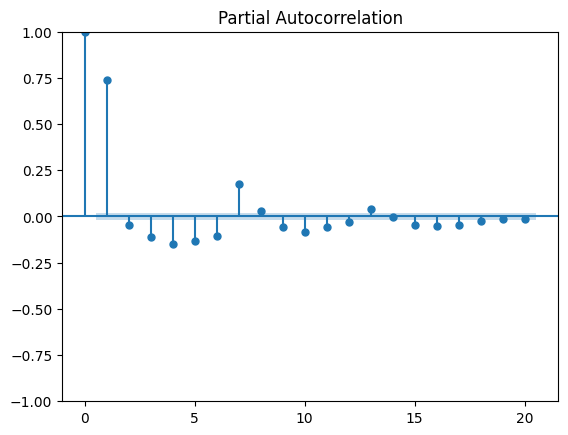

         lb_stat  lb_pvalue
10  11247.514428        0.0
Column [9:47]
Mean Absolute Error: 9.2879542341406
Mean Squared Error: 193.98962940219442
Root Mean Squared Error: 13.928015989443523


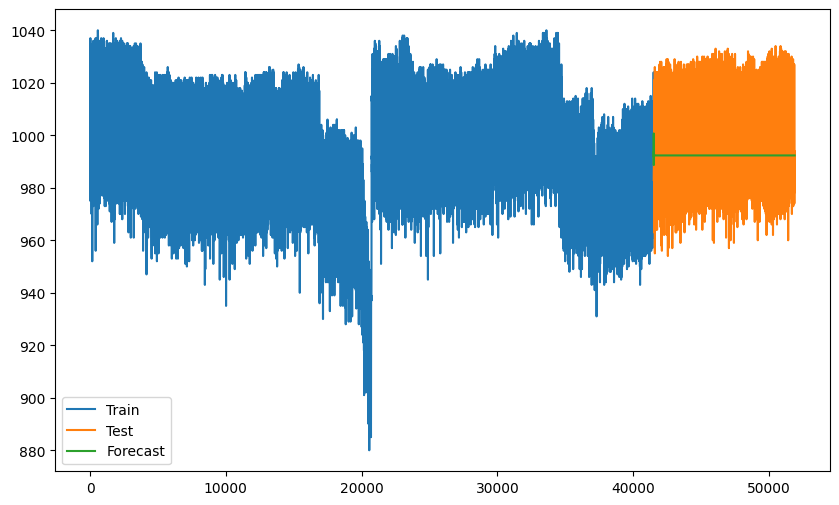

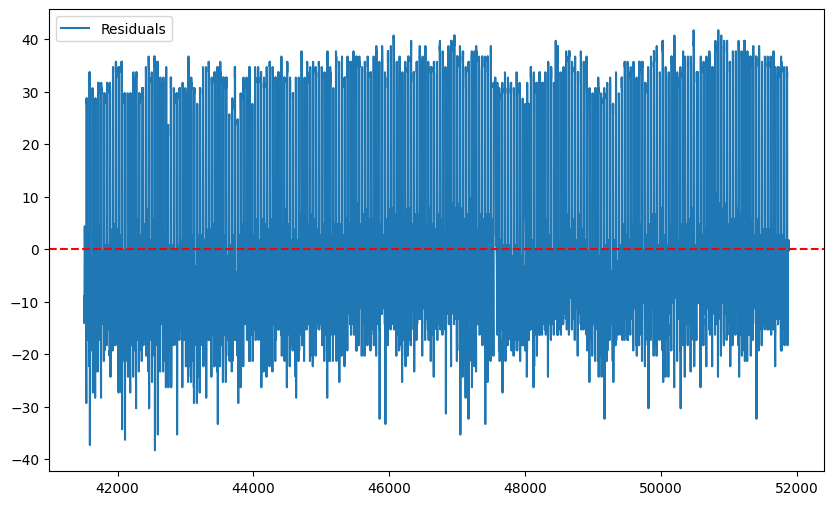

<Figure size 1000x600 with 0 Axes>

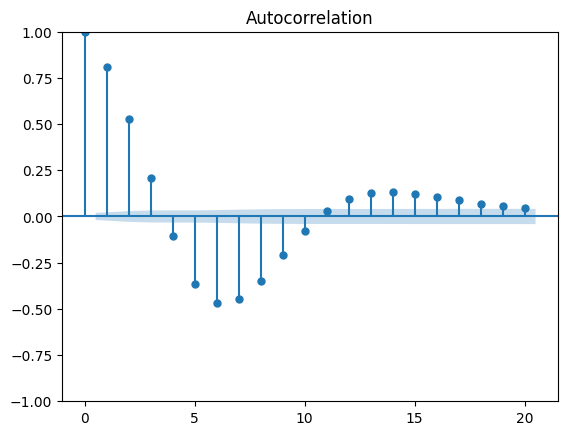

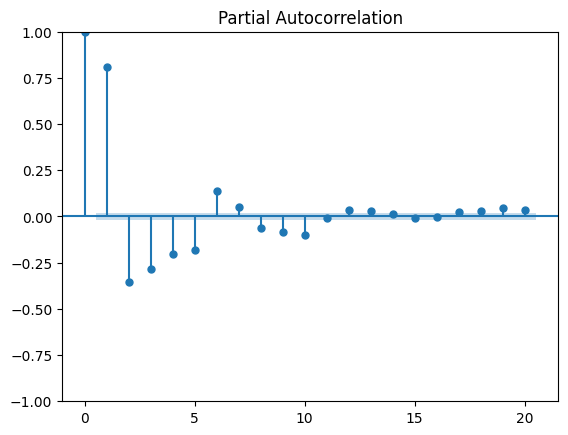

         lb_stat  lb_pvalue
10  17796.162731        0.0
Column [9:48]
Mean Absolute Error: 14.574392258361074
Mean Squared Error: 478.3053555912021
Root Mean Squared Error: 21.870193313987926


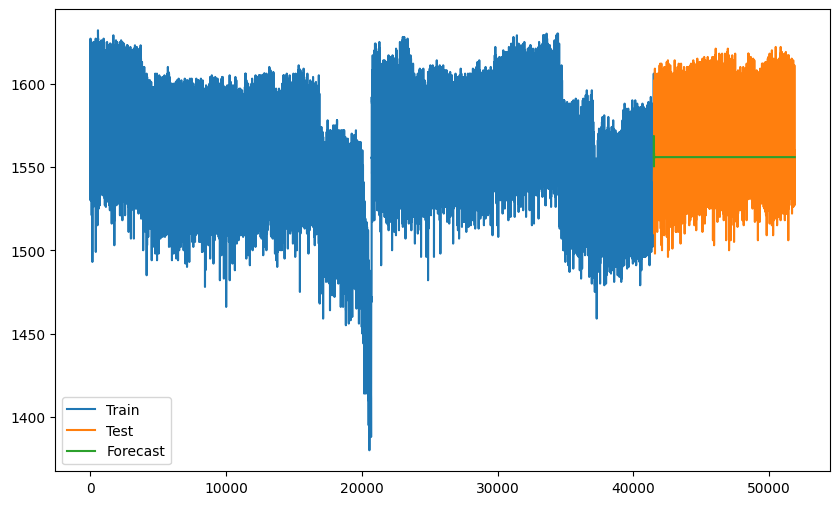

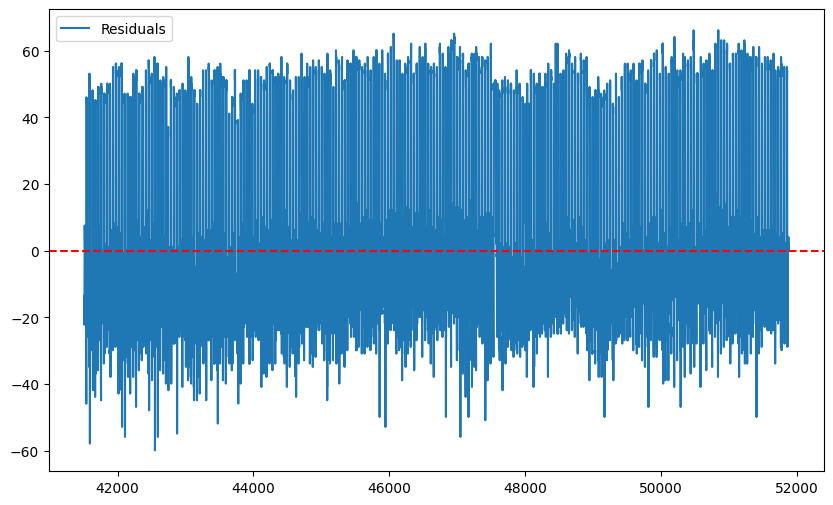

<Figure size 1000x600 with 0 Axes>

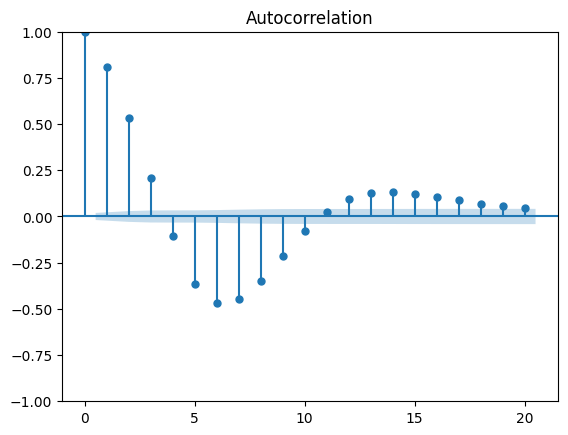

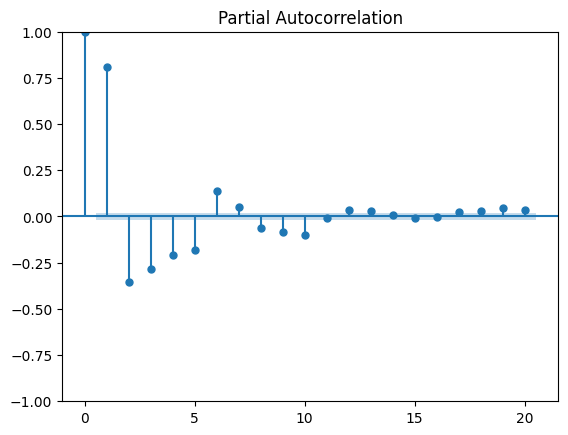

         lb_stat  lb_pvalue
10  17811.763967        0.0
Column [9:49]
Mean Absolute Error: 10.916183067187404
Mean Squared Error: 264.7951042381664
Root Mean Squared Error: 16.27252605584537


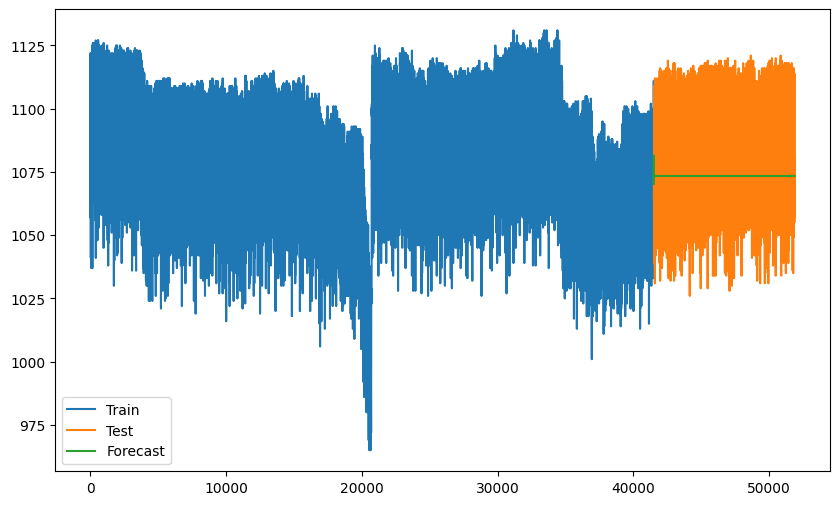

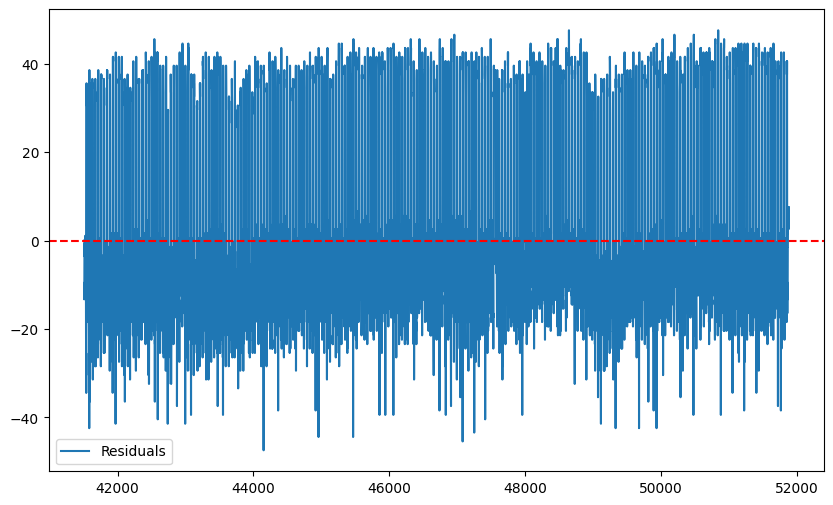

<Figure size 1000x600 with 0 Axes>

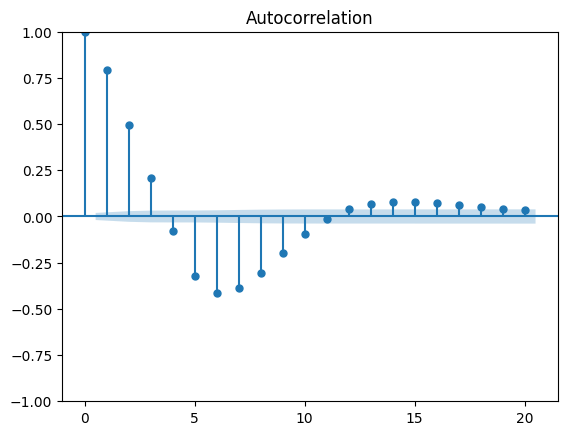

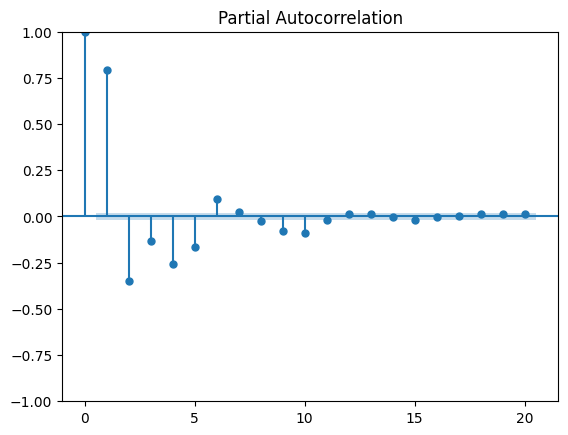

         lb_stat  lb_pvalue
10  15422.494045        0.0
Column [9:50]
Mean Absolute Error: 16.42588933086026
Mean Squared Error: 611.488513682607
Root Mean Squared Error: 24.72829378834308


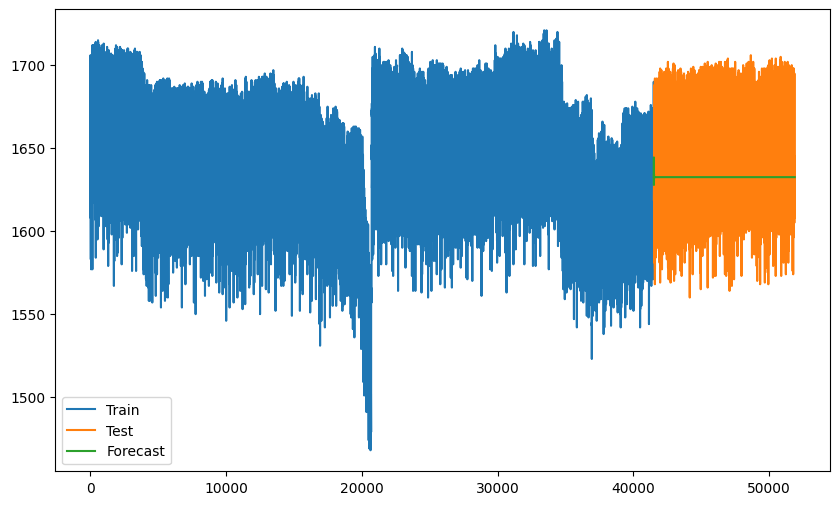

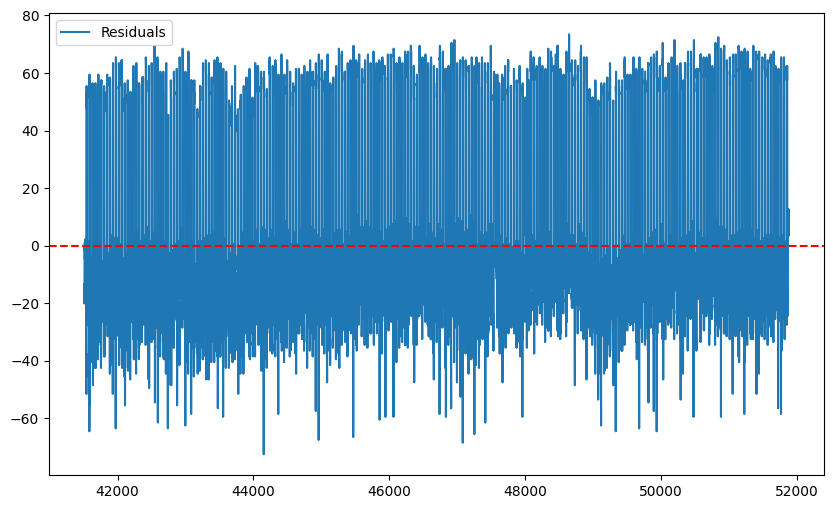

<Figure size 1000x600 with 0 Axes>

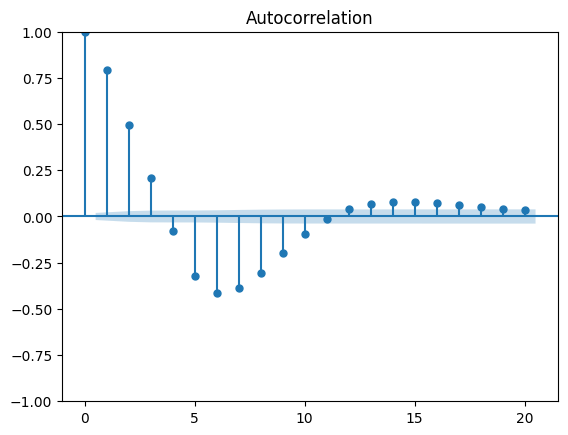

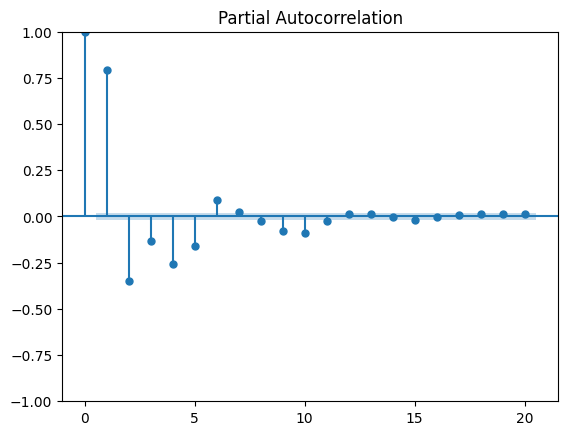

         lb_stat  lb_pvalue
10  15407.202987        0.0
Column [9:51]
Mean Absolute Error: 15.163047790182821
Mean Squared Error: 380.44877574919497
Root Mean Squared Error: 19.50509614816587


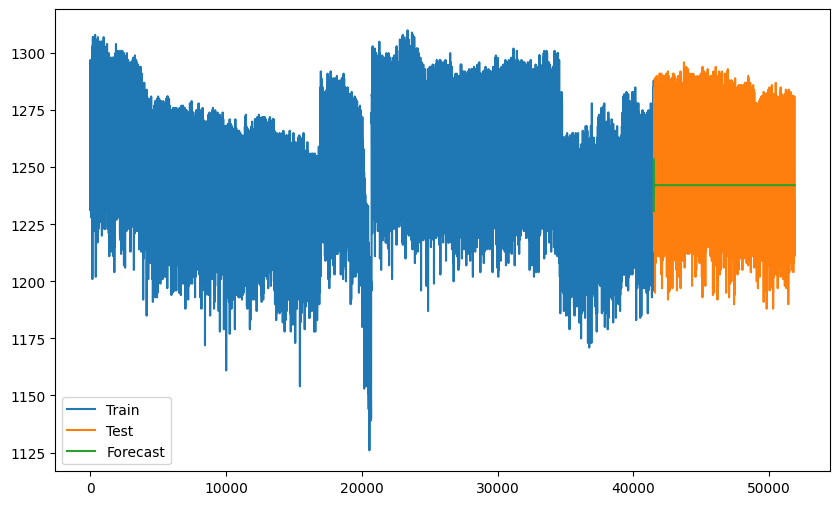

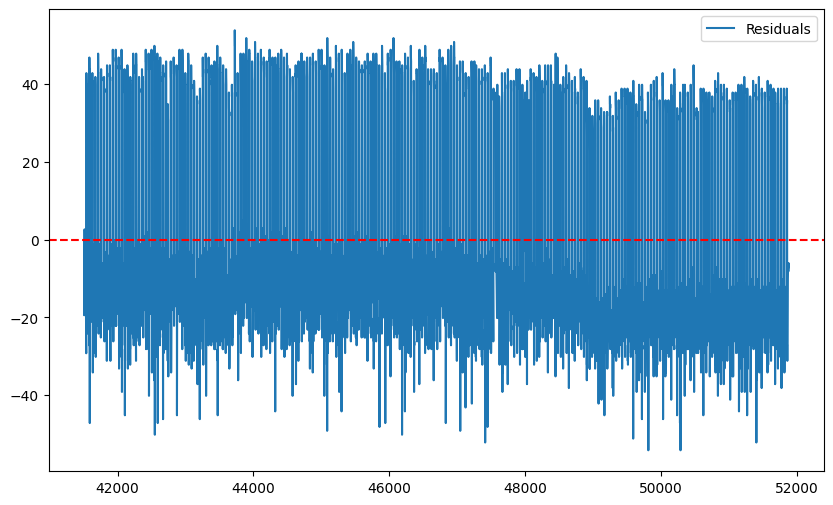

<Figure size 1000x600 with 0 Axes>

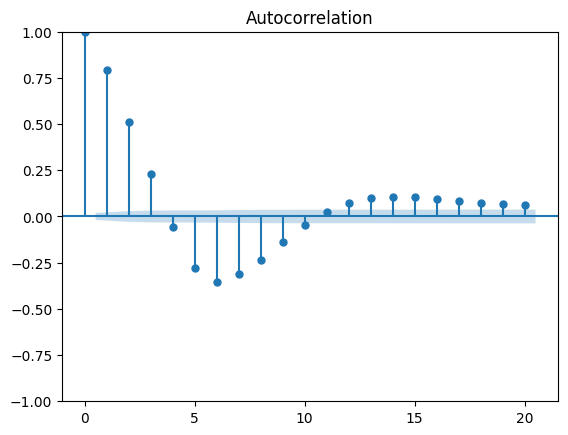

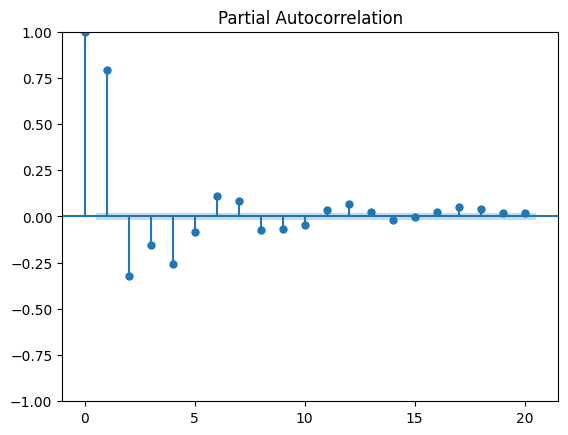

         lb_stat  lb_pvalue
10  13772.492223        0.0
Column [9:52]
Mean Absolute Error: 18.20612321804049
Mean Squared Error: 543.9929787270593
Root Mean Squared Error: 23.32365706159862


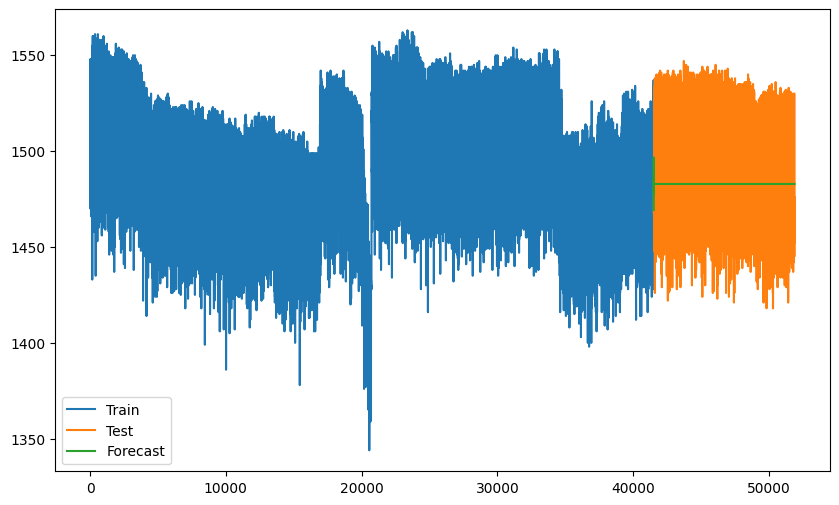

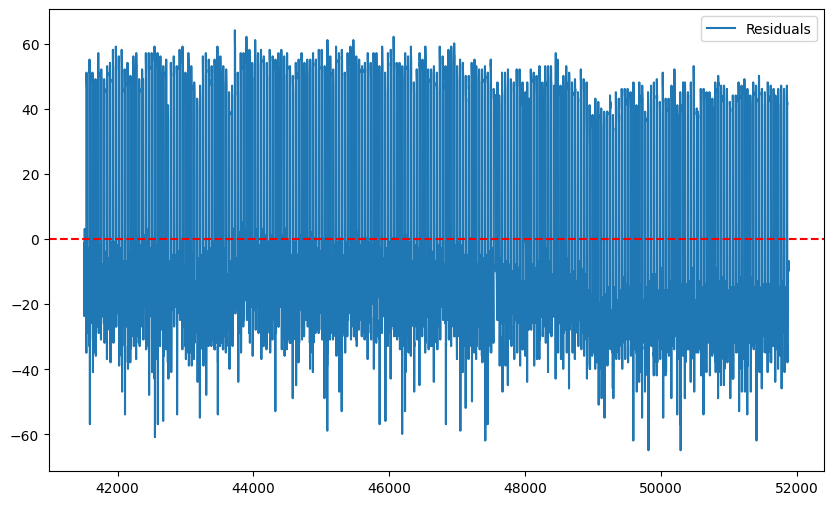

<Figure size 1000x600 with 0 Axes>

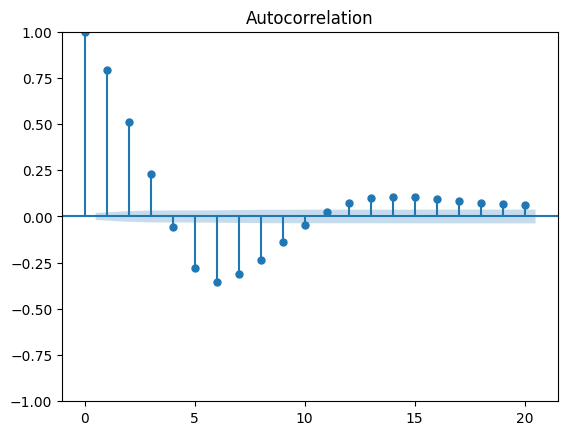

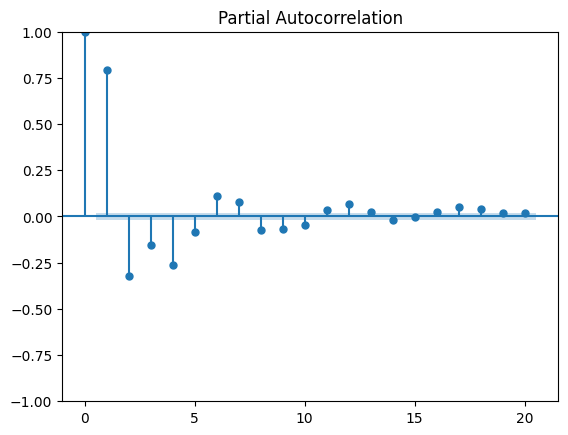

         lb_stat  lb_pvalue
10  13777.992281        0.0
Column [9:53]
Mean Absolute Error: 18.815015285354765
Mean Squared Error: 518.4441820488325
Root Mean Squared Error: 22.769369381887426


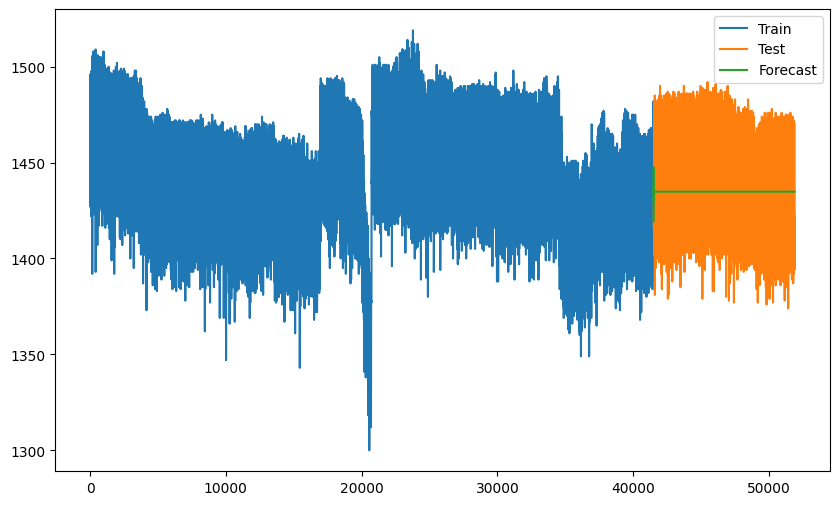

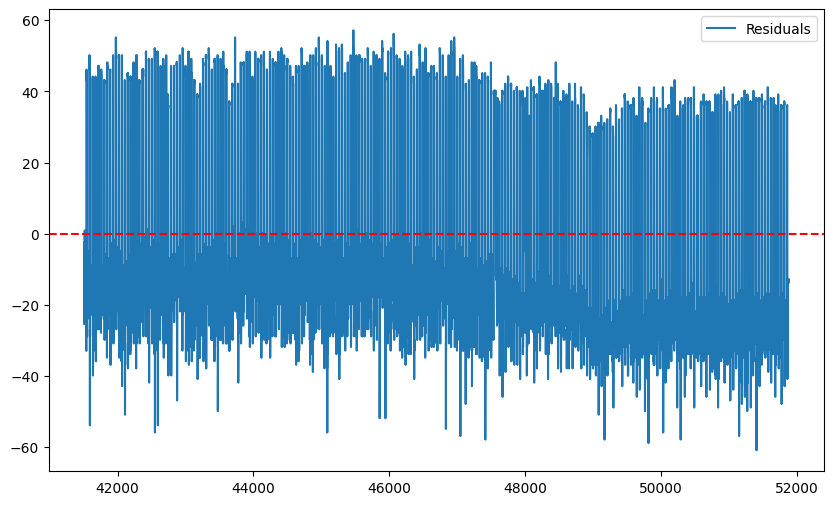

<Figure size 1000x600 with 0 Axes>

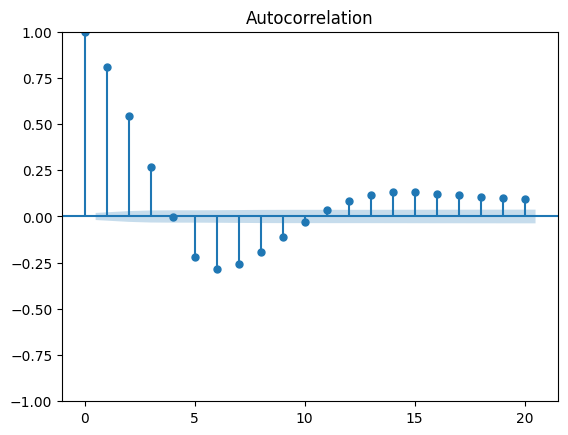

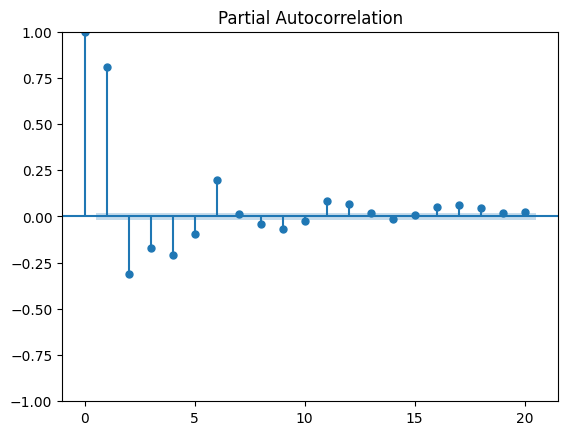

         lb_stat  lb_pvalue
10  13076.523722        0.0
Column [9:54]
Mean Absolute Error: 20.82968995417597
Mean Squared Error: 628.1872953445234
Root Mean Squared Error: 25.063664842646684


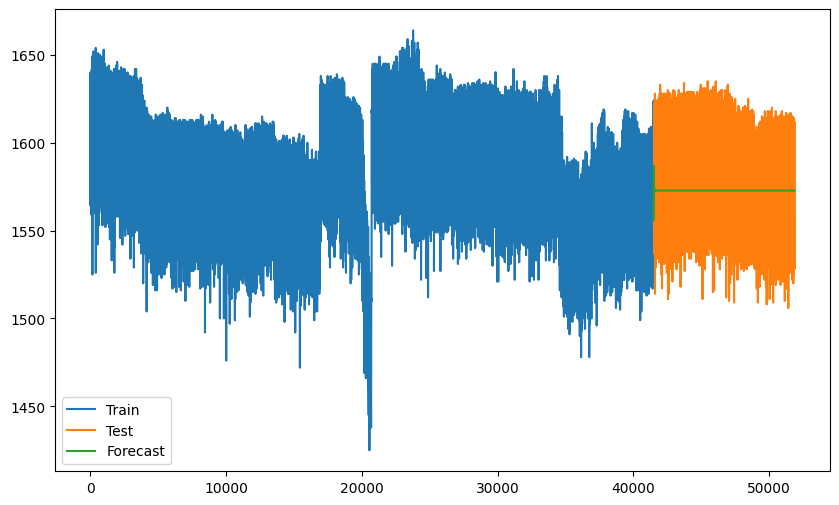

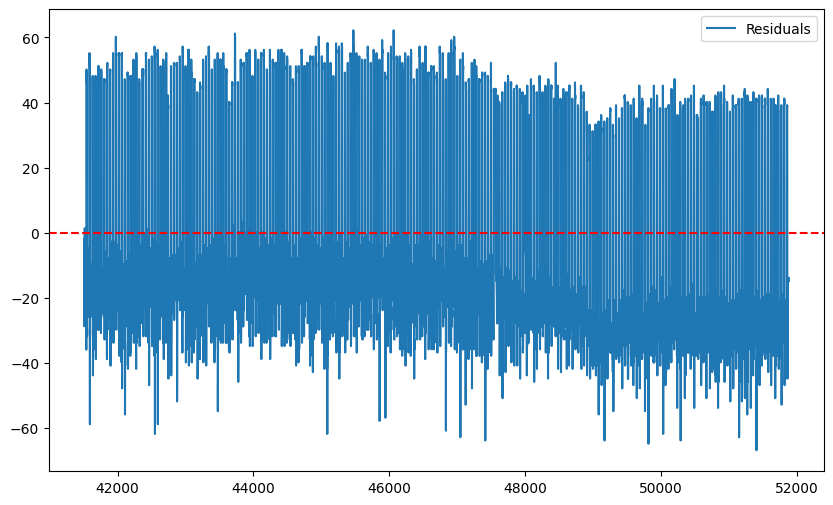

<Figure size 1000x600 with 0 Axes>

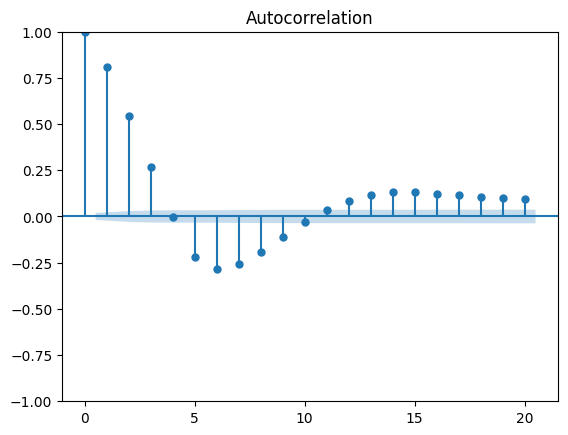

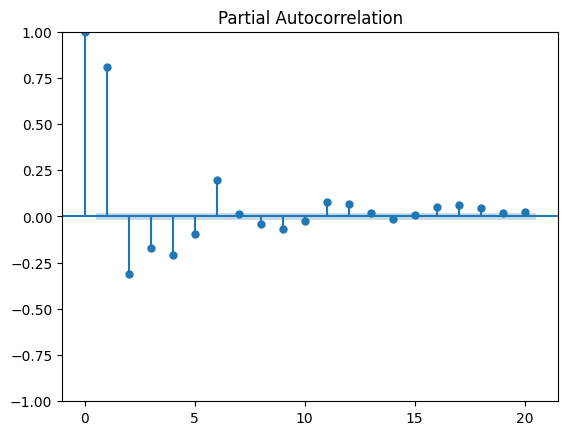

         lb_stat  lb_pvalue
10  13074.354618        0.0
Column [9:55]
Mean Absolute Error: 8.673157761961113
Mean Squared Error: 131.7291650150731
Root Mean Squared Error: 11.47733266116623


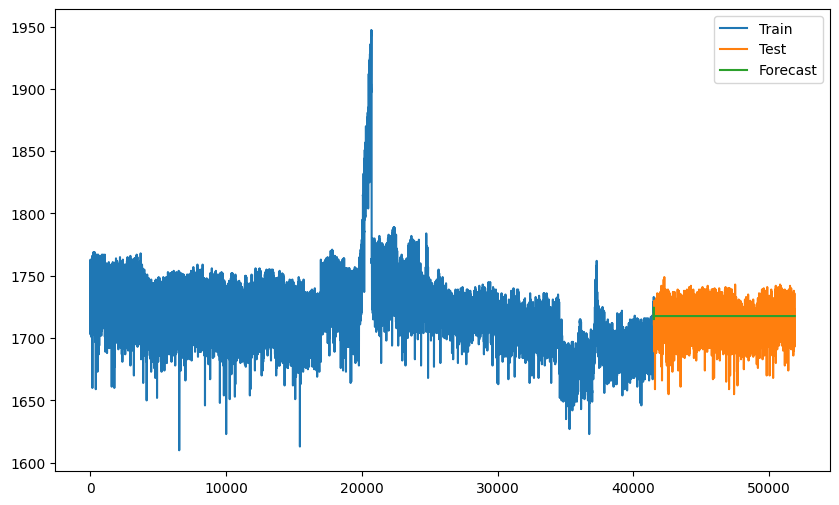

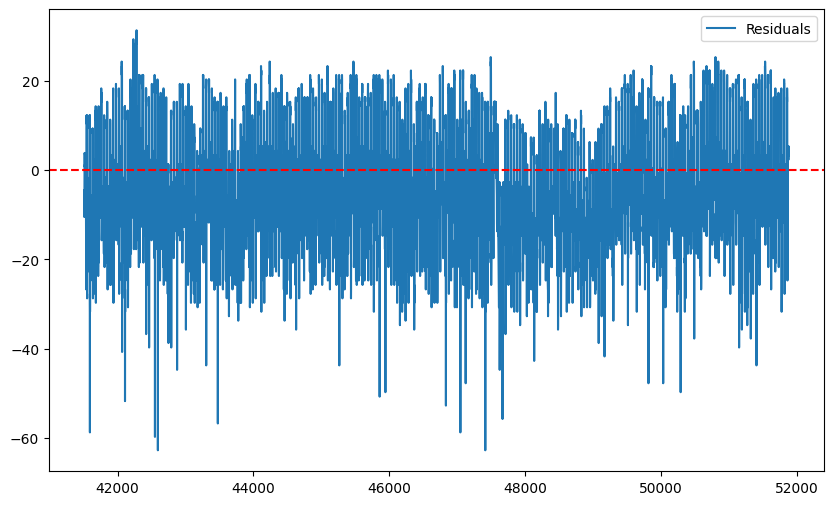

<Figure size 1000x600 with 0 Axes>

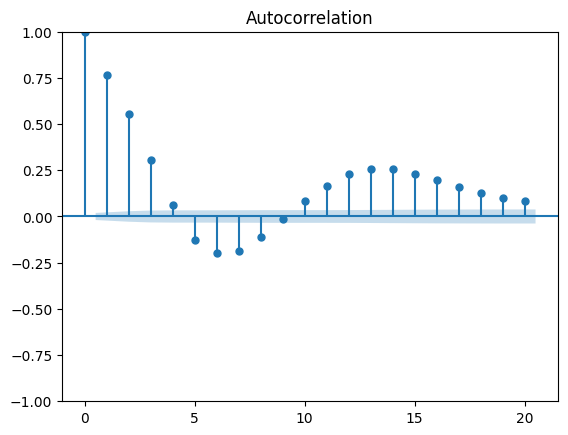

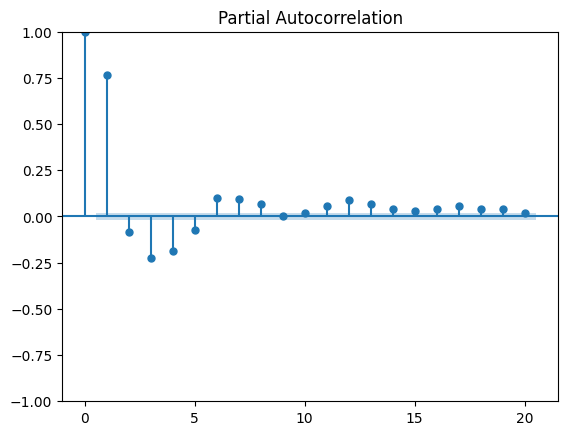

         lb_stat  lb_pvalue
10  11488.230934        0.0
Column [9:56]
Mean Absolute Error: 6.407438436837798
Mean Squared Error: 71.95371676327836
Root Mean Squared Error: 8.48255366993209


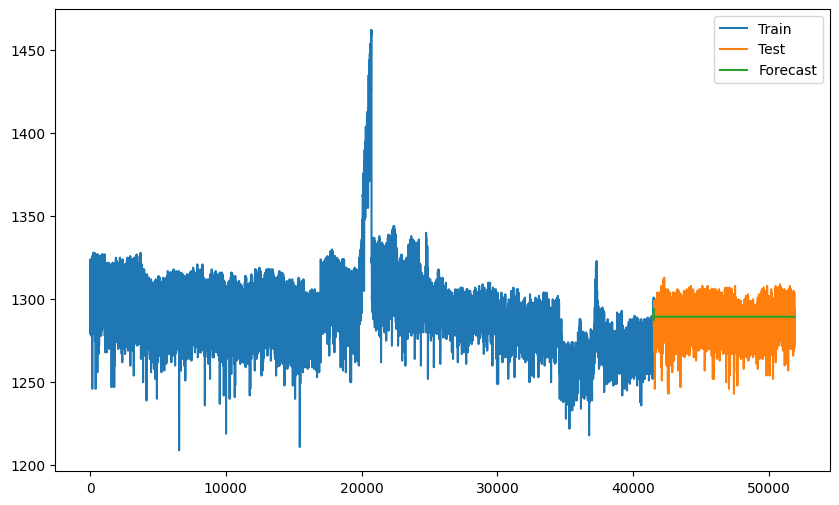

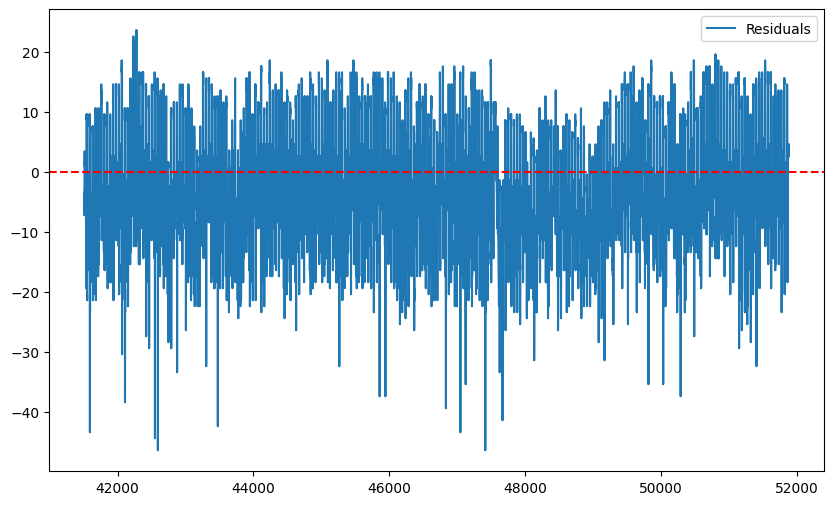

<Figure size 1000x600 with 0 Axes>

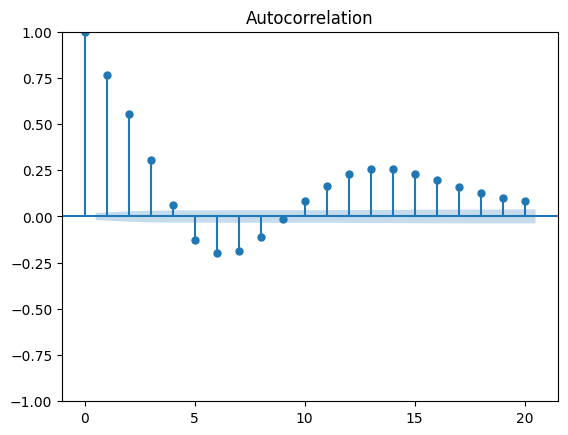

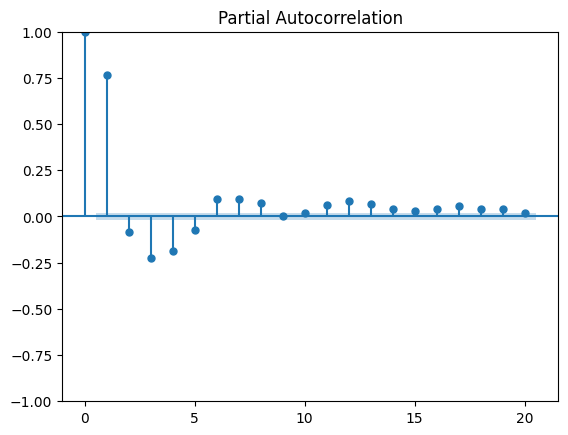

         lb_stat  lb_pvalue
10  11462.266747        0.0
Column [9:57]
Mean Absolute Error: 10.518442143943878
Mean Squared Error: 155.7427674030193
Root Mean Squared Error: 12.47969420310527


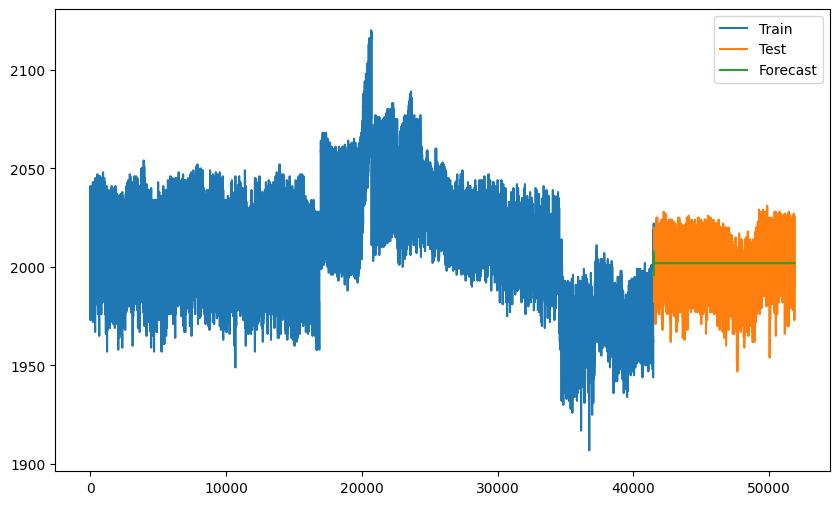

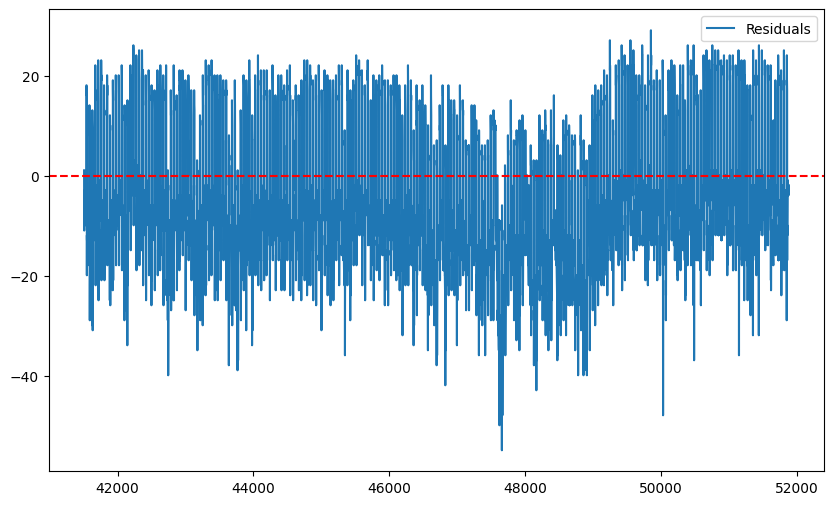

<Figure size 1000x600 with 0 Axes>

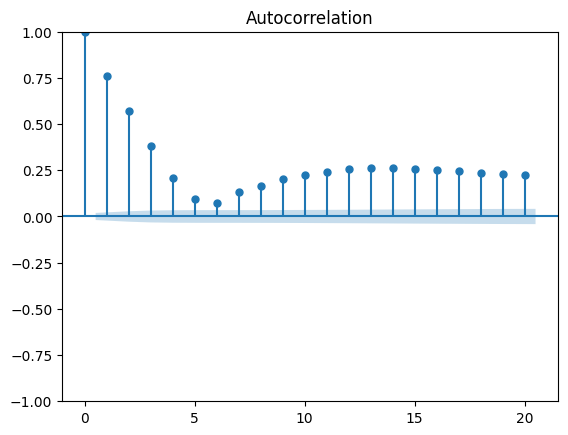

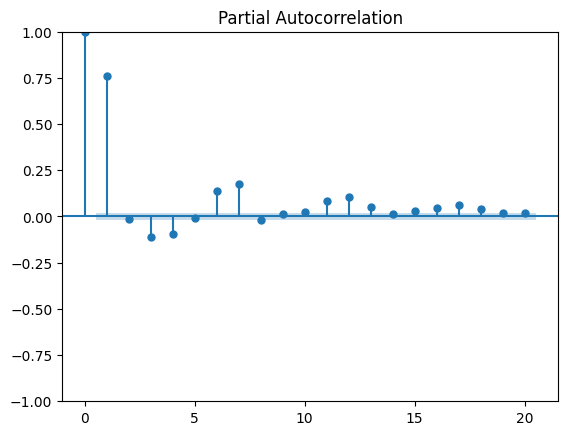

         lb_stat  lb_pvalue
10  12881.495816        0.0
Column [9:58]
Mean Absolute Error: 6.922087362467831
Mean Squared Error: 68.1265599341303
Root Mean Squared Error: 8.253881507153485


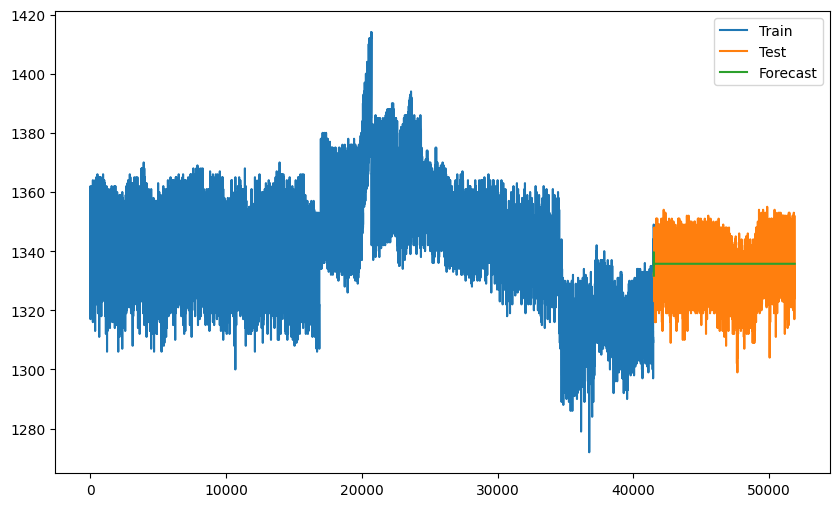

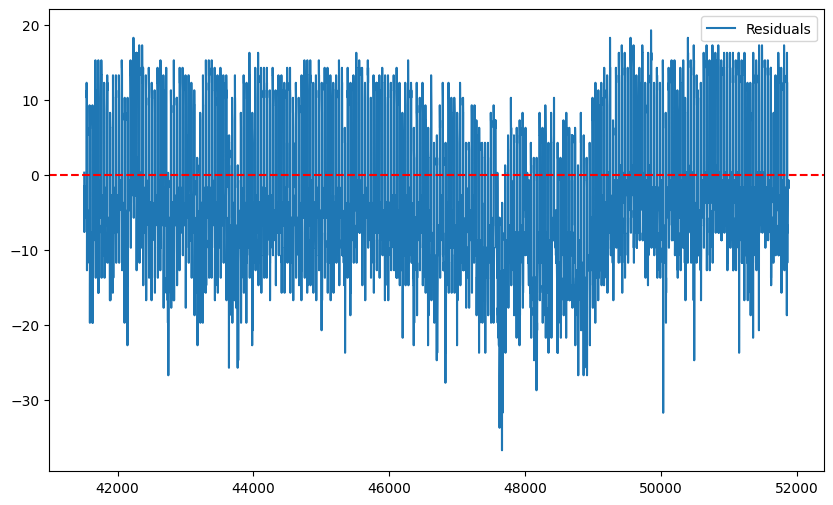

<Figure size 1000x600 with 0 Axes>

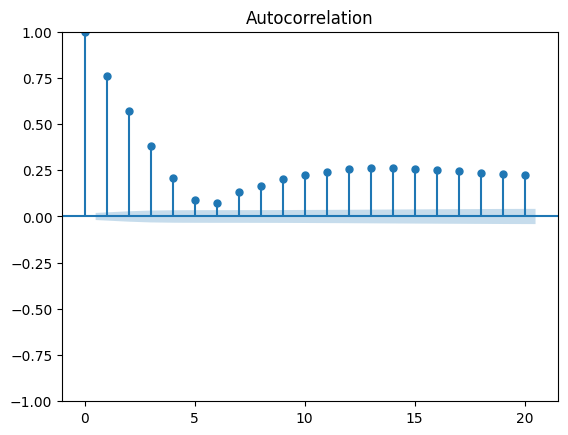

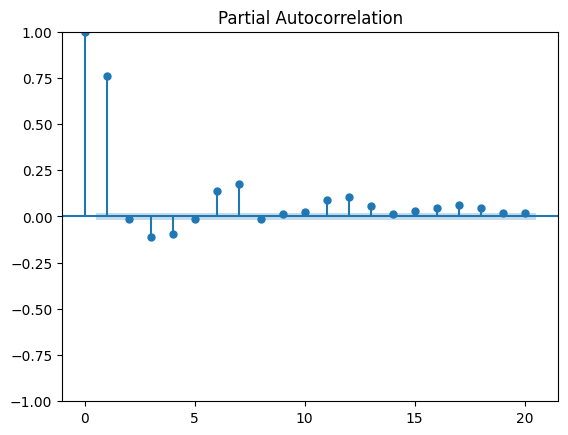

         lb_stat  lb_pvalue
10  12820.341836        0.0
Column [9:64]
Mean Absolute Error: 21.893658473930227
Mean Squared Error: 1253.0905160250582
Root Mean Squared Error: 35.39901857432008


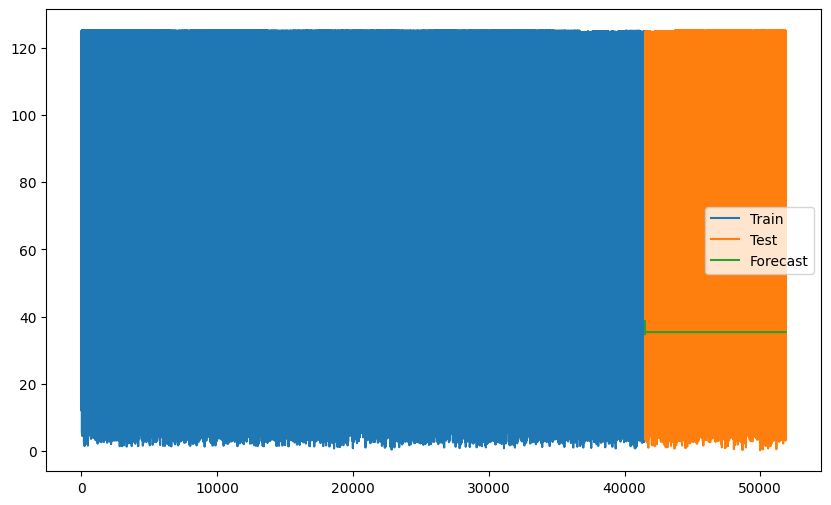

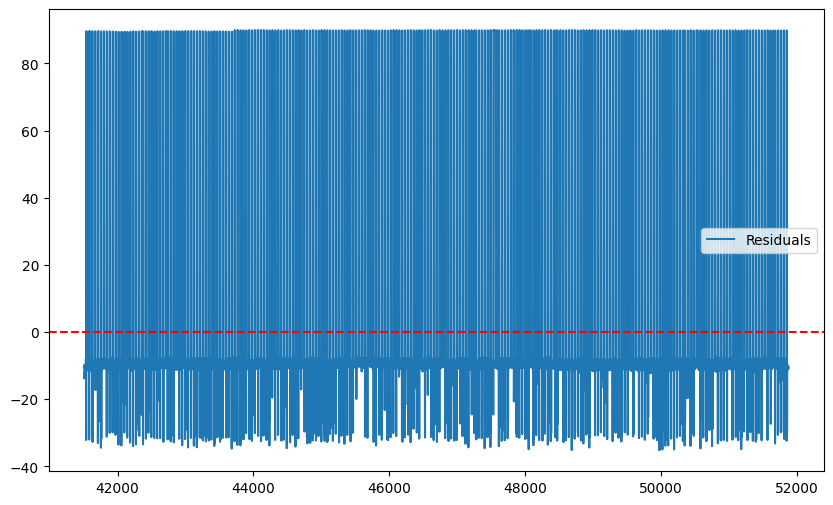

<Figure size 1000x600 with 0 Axes>

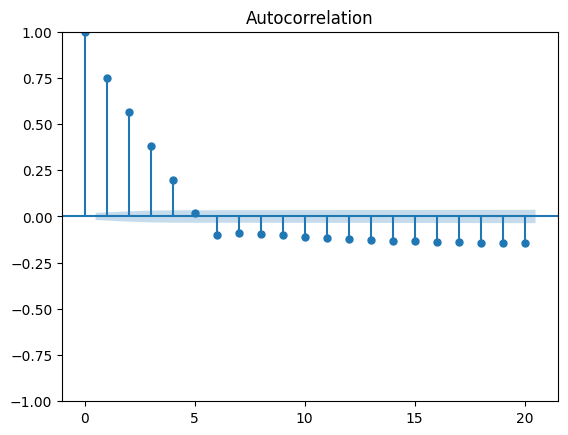

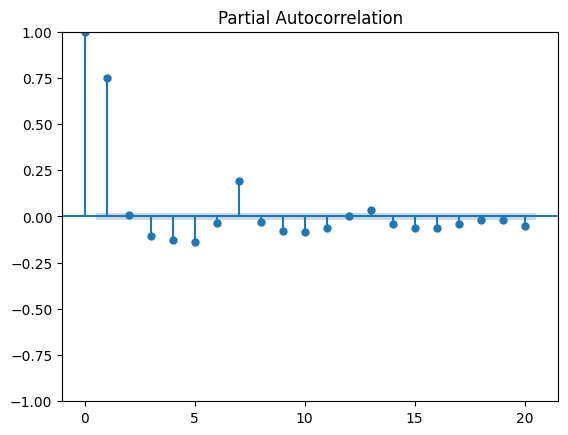

         lb_stat  lb_pvalue
10  11587.822691        0.0
Column [9:65]
Mean Absolute Error: 22.77378550964513
Mean Squared Error: 1332.2836645849854
Root Mean Squared Error: 36.50046115578522


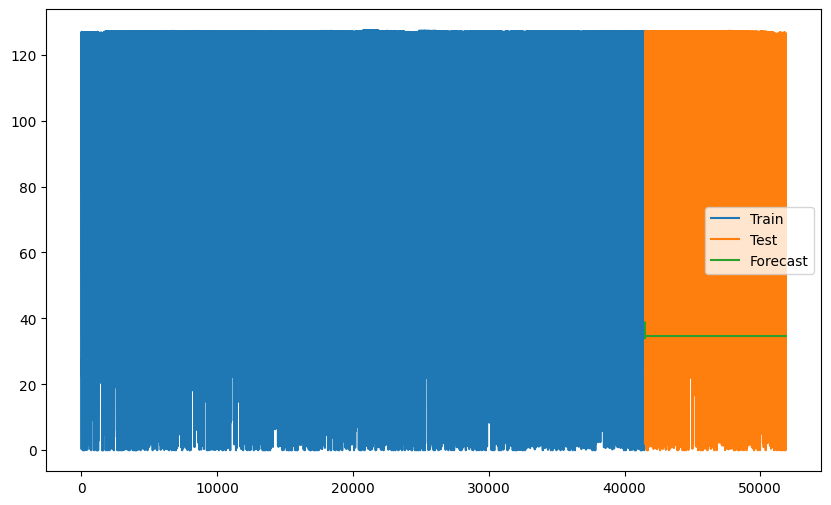

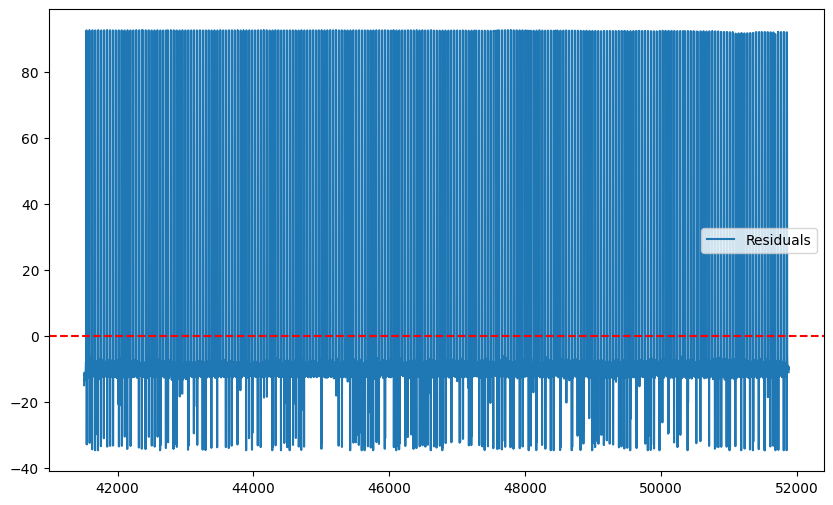

<Figure size 1000x600 with 0 Axes>

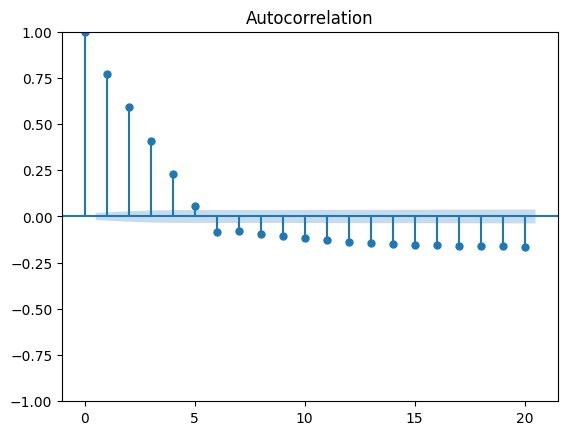

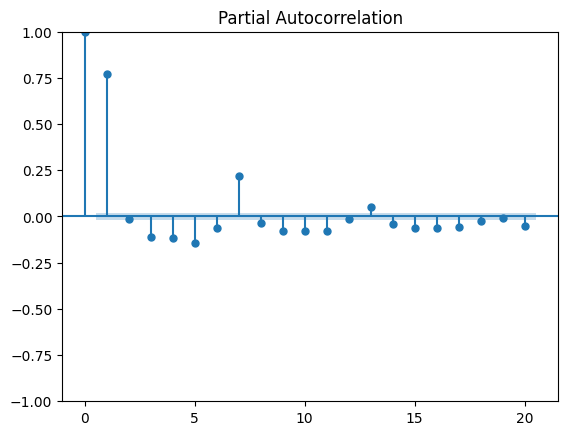

         lb_stat  lb_pvalue
10  12643.388924        0.0
Column [9:66]
Mean Absolute Error: 22.731103823637874
Mean Squared Error: 1326.8037108656276
Root Mean Squared Error: 36.425316894512086


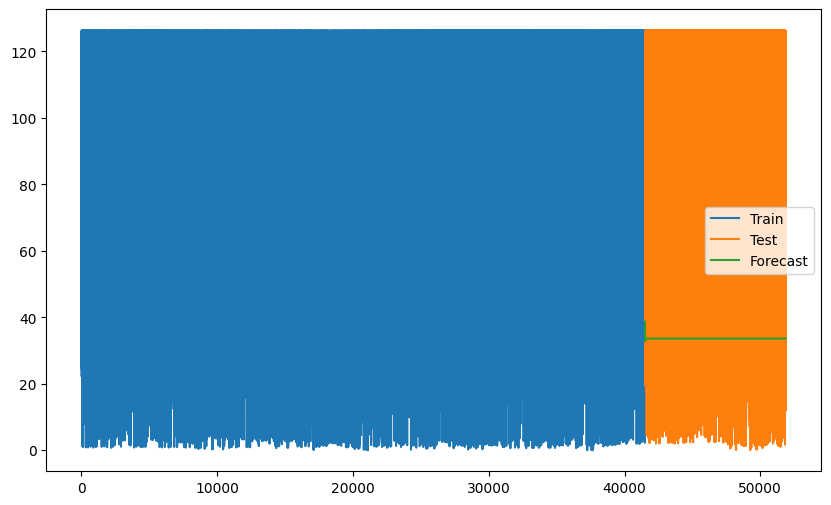

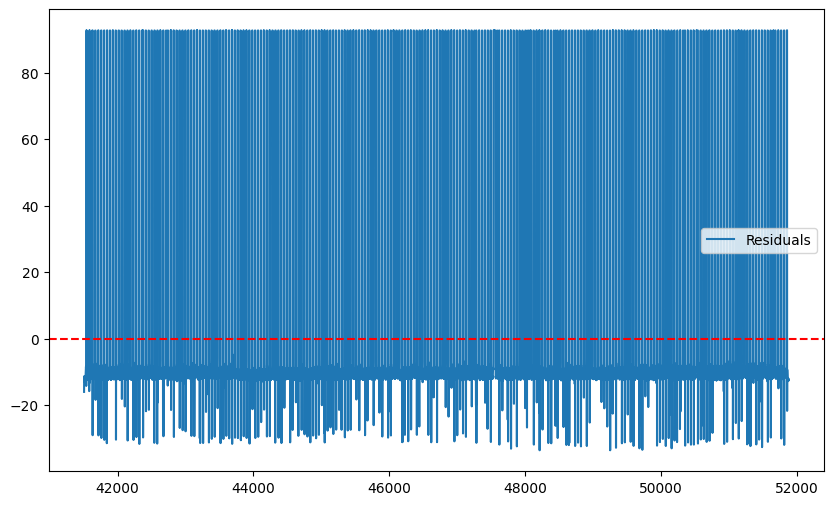

<Figure size 1000x600 with 0 Axes>

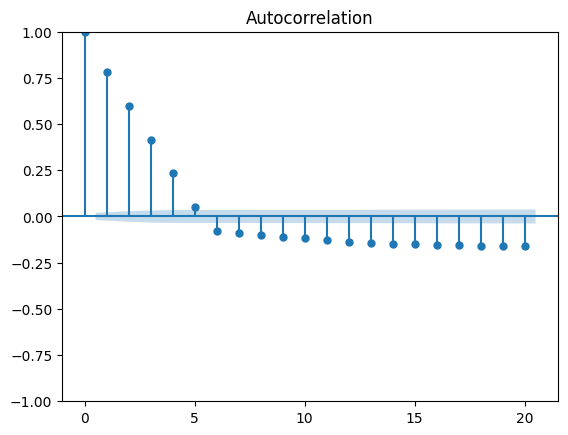

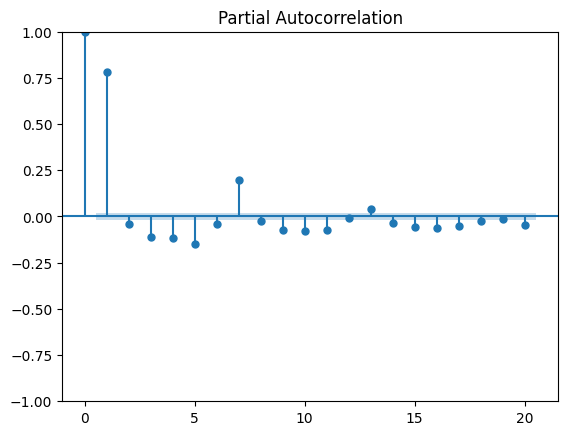

         lb_stat  lb_pvalue
10  12951.704437        0.0
Column [9:67]
Mean Absolute Error: 24.327428337670902
Mean Squared Error: 1320.7024614693214
Root Mean Squared Error: 36.34147027115608


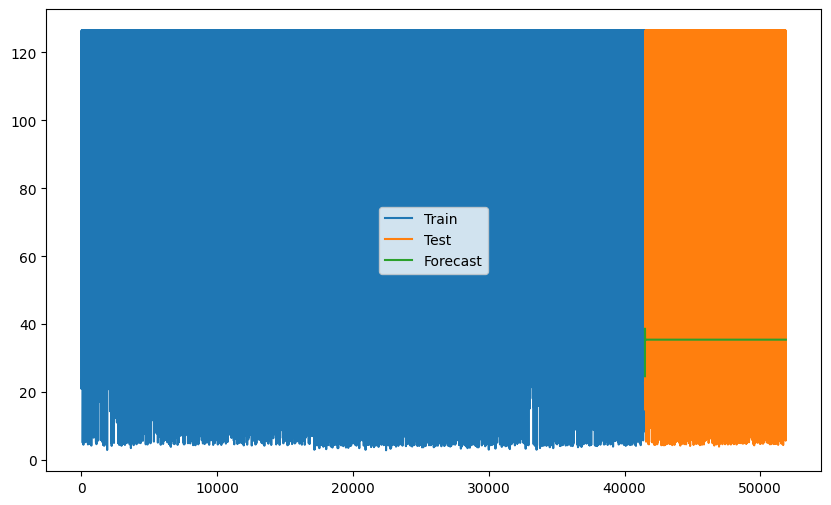

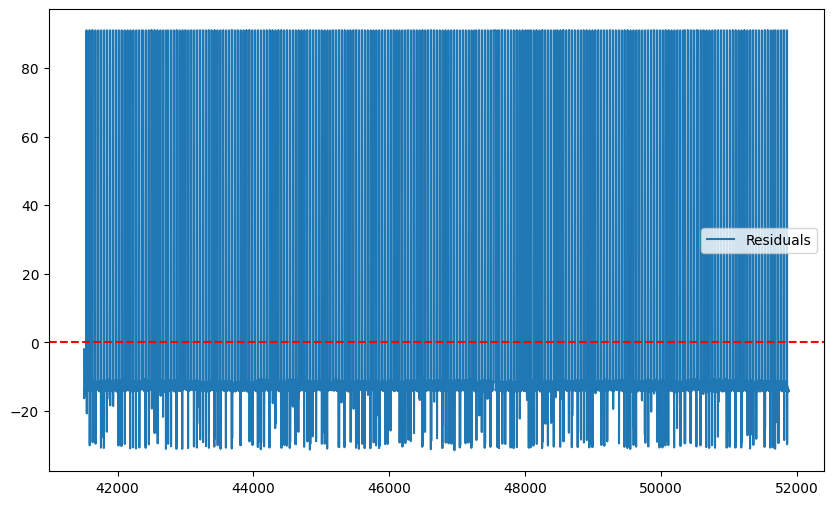

<Figure size 1000x600 with 0 Axes>

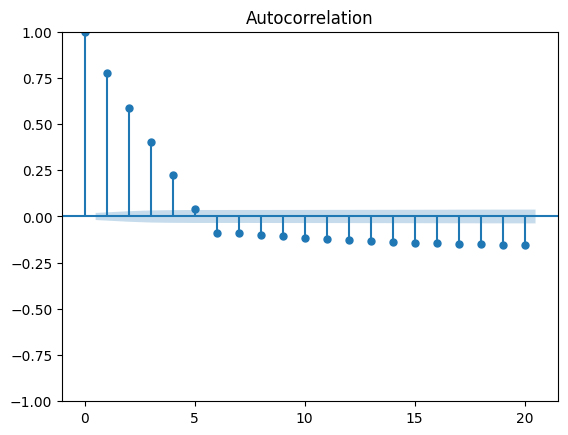

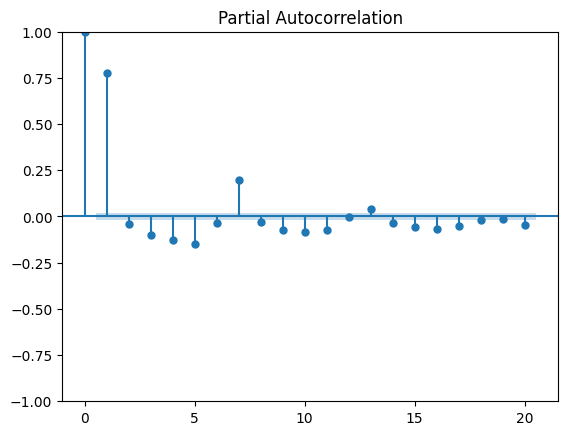

         lb_stat  lb_pvalue
10  12620.433858        0.0
Column [9:68]
Mean Absolute Error: 25.139187864404274
Mean Squared Error: 1285.86256615744
Root Mean Squared Error: 35.85892589241122


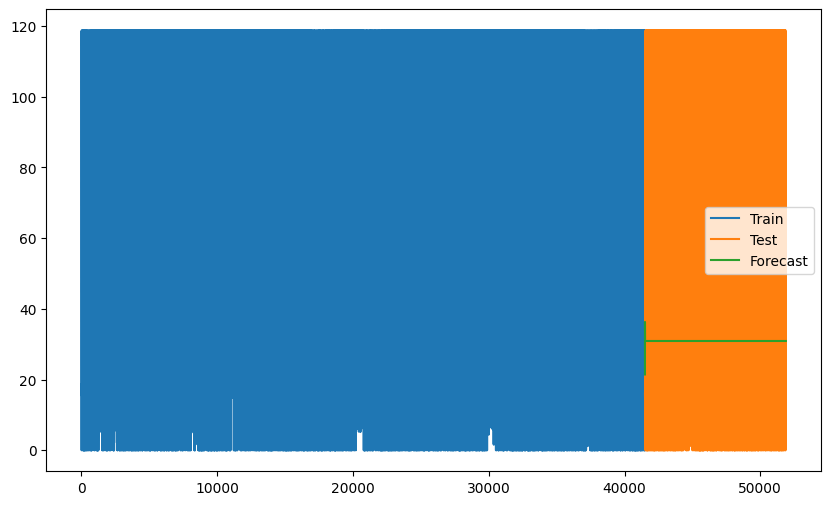

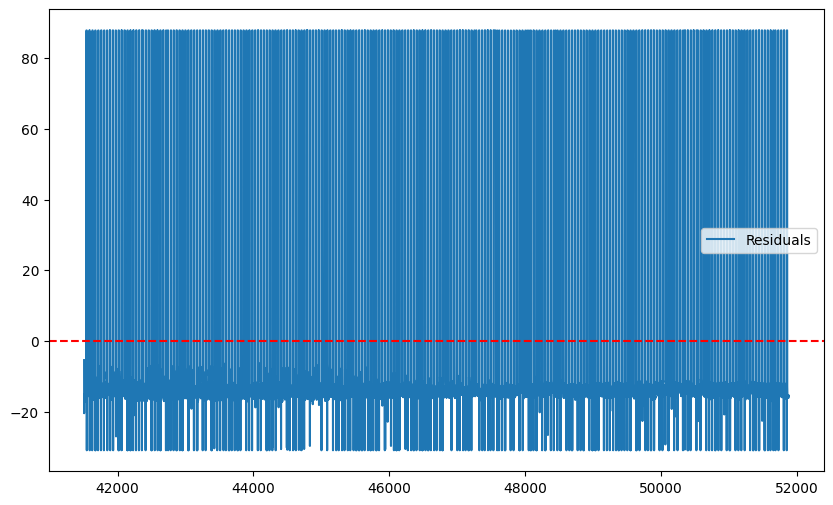

<Figure size 1000x600 with 0 Axes>

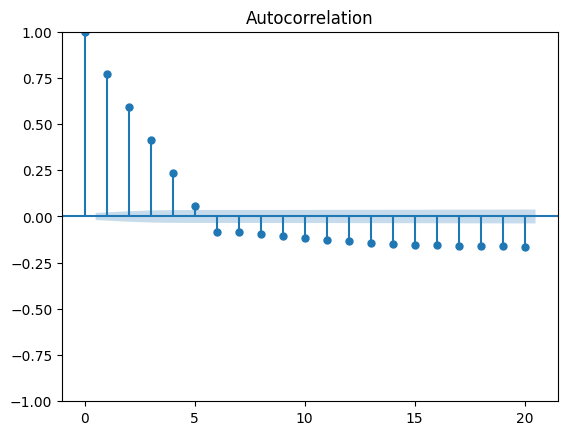

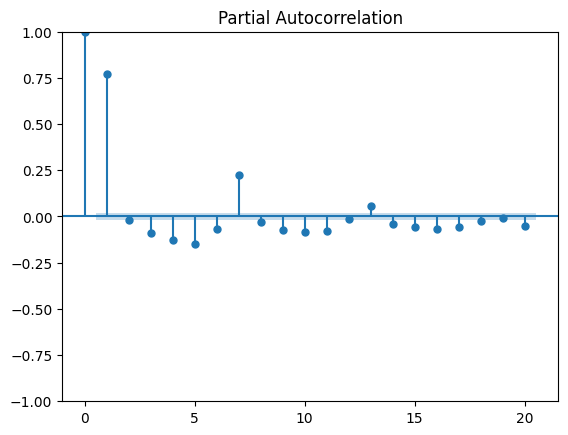

         lb_stat  lb_pvalue
10  12701.599163        0.0
Column [9:69]
Mean Absolute Error: 17.620940928004455
Mean Squared Error: 931.9242338528092
Root Mean Squared Error: 30.52743411839274


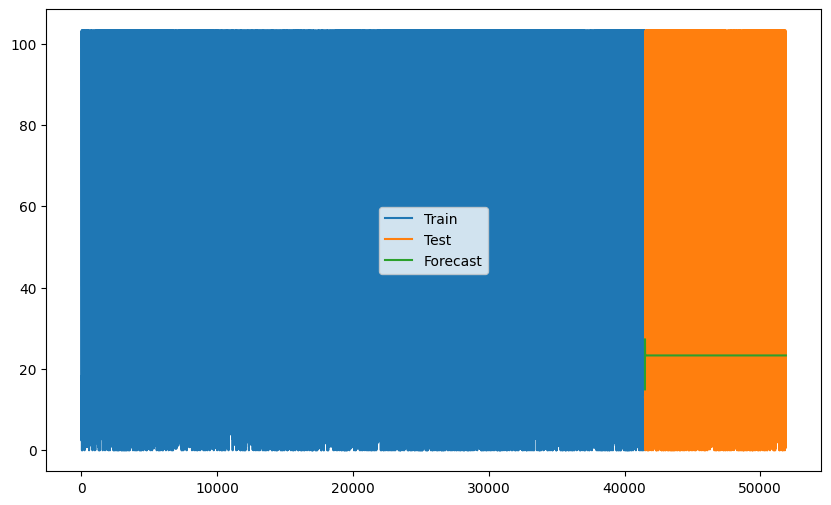

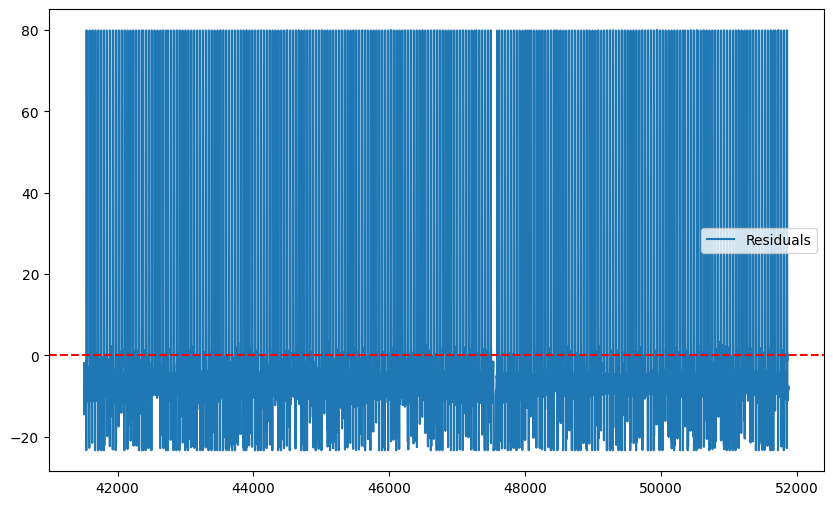

<Figure size 1000x600 with 0 Axes>

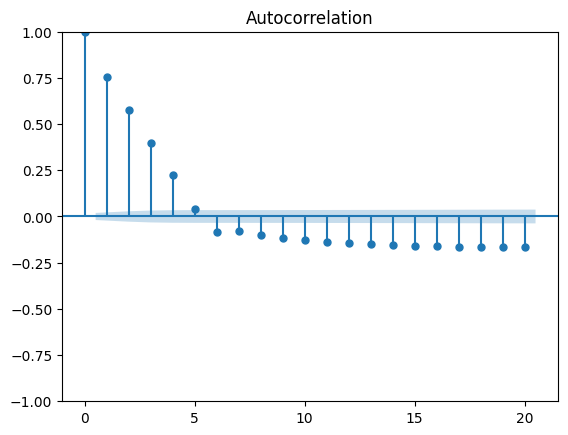

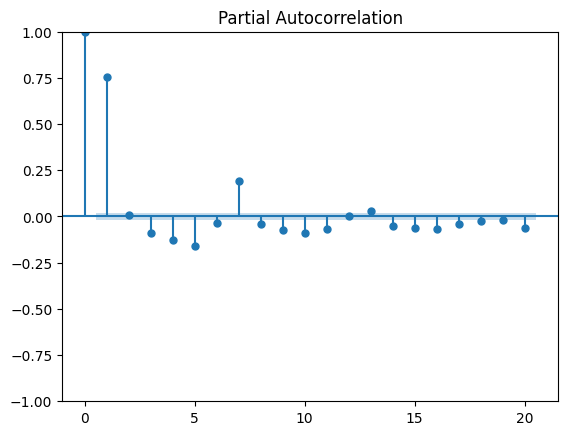

         lb_stat  lb_pvalue
10  12096.284156        0.0
Column [9.17]
Mean Absolute Error: 0.16235196864380044
Mean Squared Error: 0.16040463120513976
Root Mean Squared Error: 0.40050546963198863


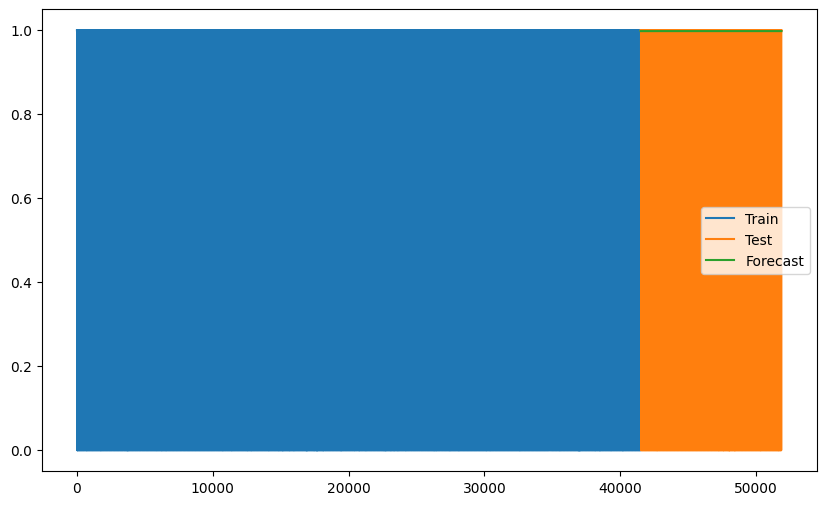

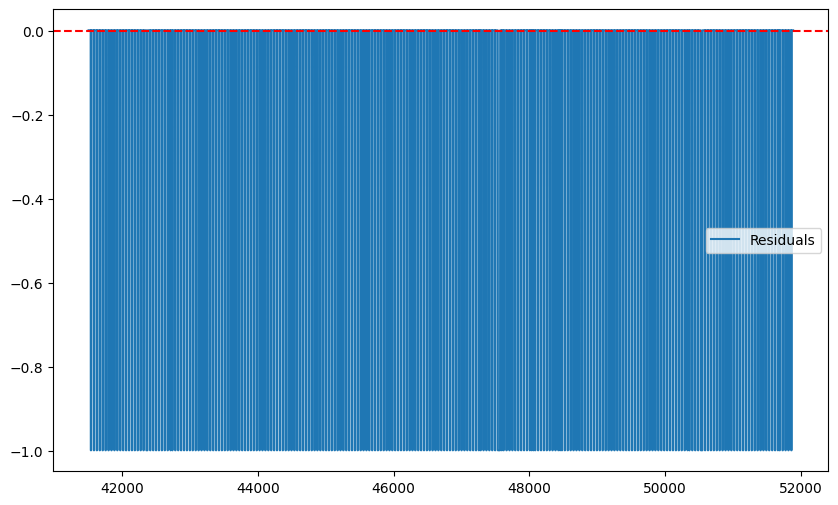

<Figure size 1000x600 with 0 Axes>

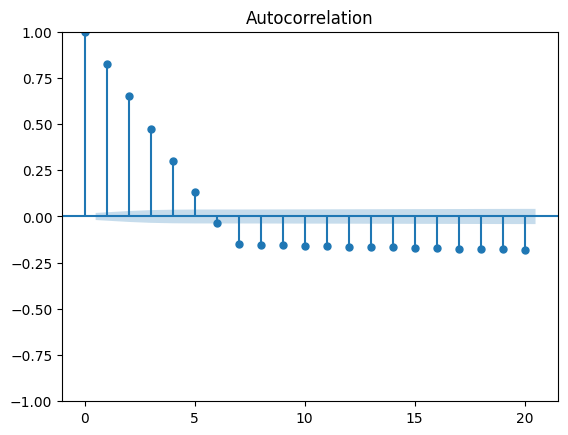

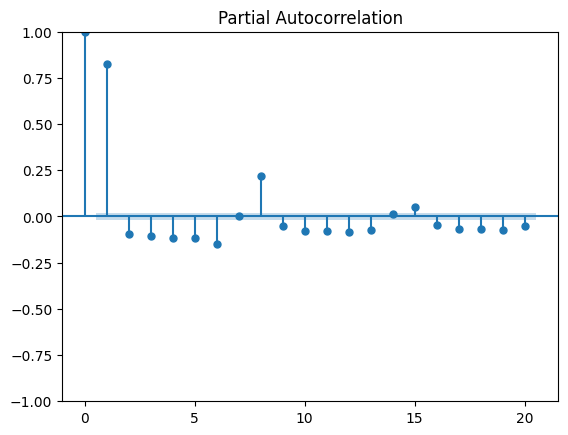

         lb_stat  lb_pvalue
10  15950.113806        0.0
Column [9.18]
Mean Absolute Error: 0.1690652486810908
Mean Squared Error: 0.14968376797427396
Root Mean Squared Error: 0.3868898654323656


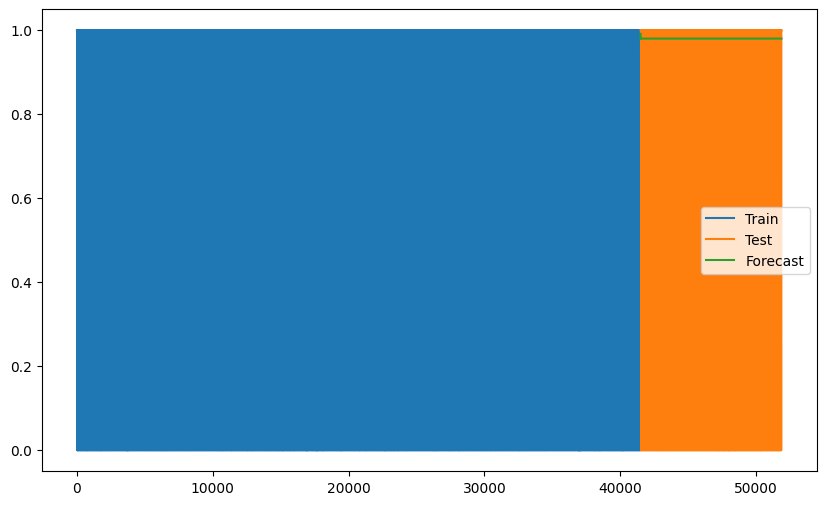

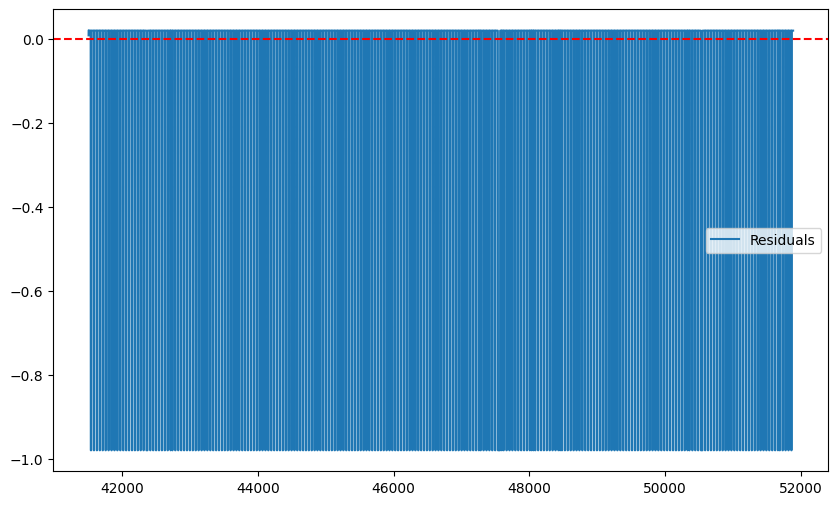

<Figure size 1000x600 with 0 Axes>

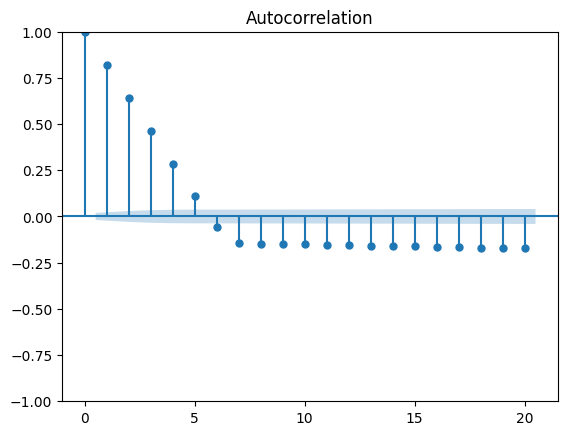

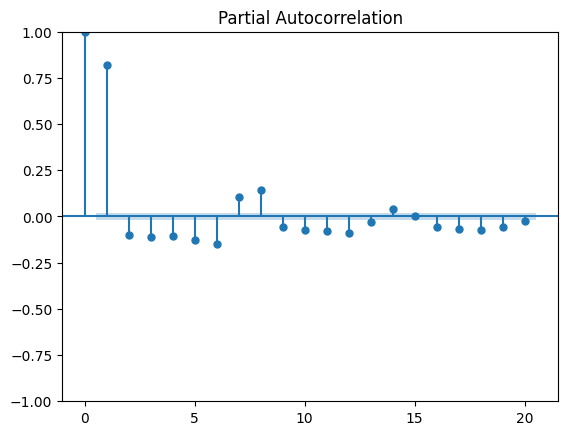

         lb_stat  lb_pvalue
10  15355.578256        0.0
Column [9.19]
Mean Absolute Error: 0.1652735735146388
Mean Squared Error: 0.15753440149534625
Root Mean Squared Error: 0.39690603610344133


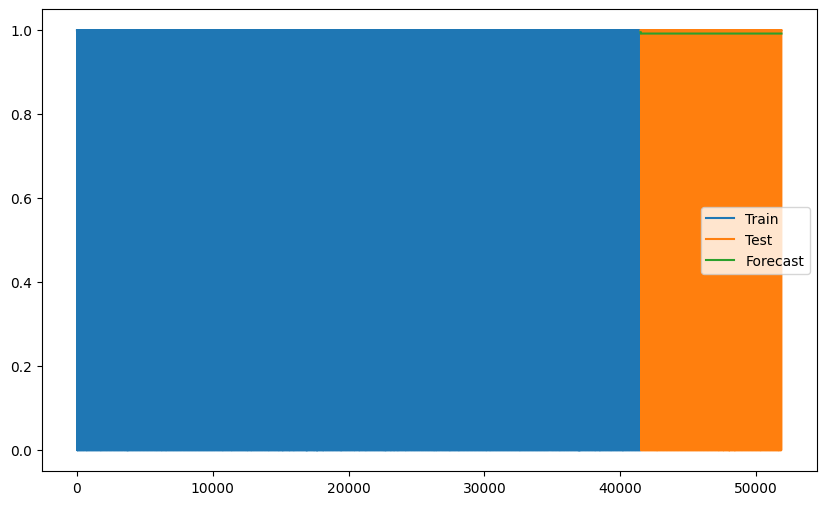

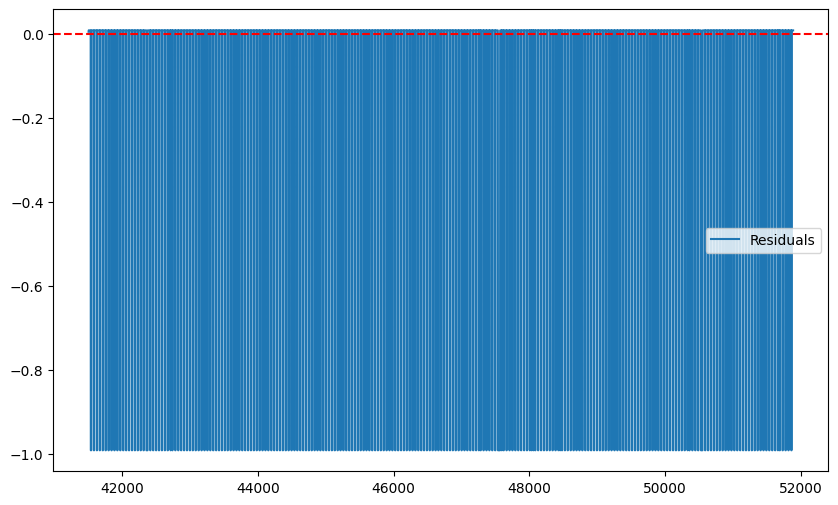

<Figure size 1000x600 with 0 Axes>

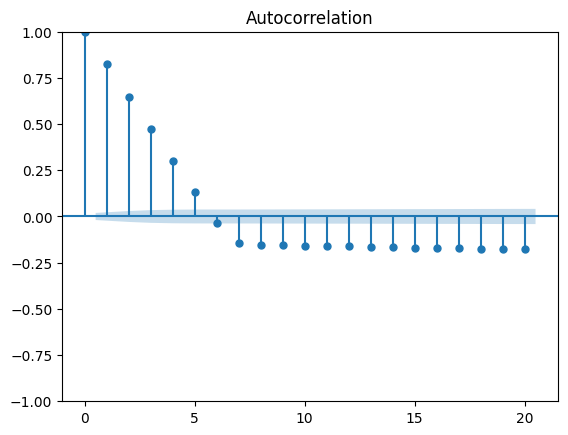

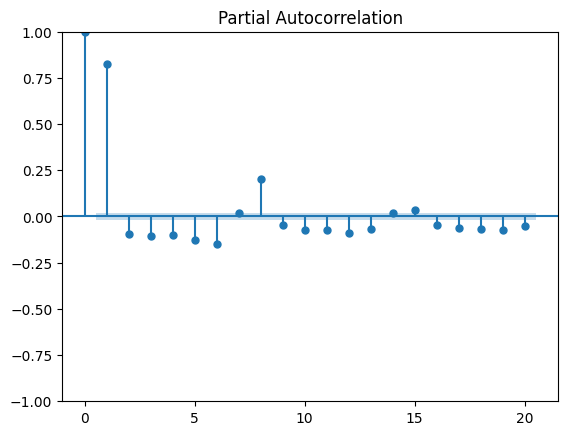

         lb_stat  lb_pvalue
10  15865.499885        0.0
Column [9.20]
Mean Absolute Error: 0.16386880804383125
Mean Squared Error: 0.16081974356089498
Root Mean Squared Error: 0.4010233703425462


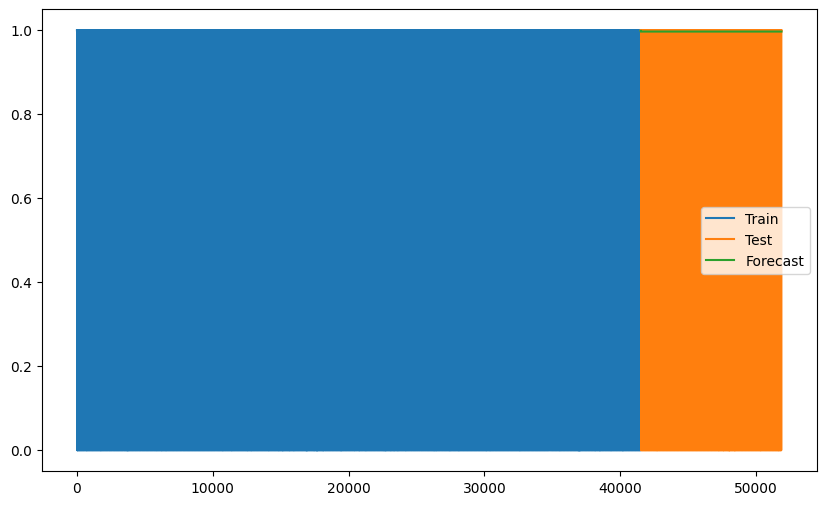

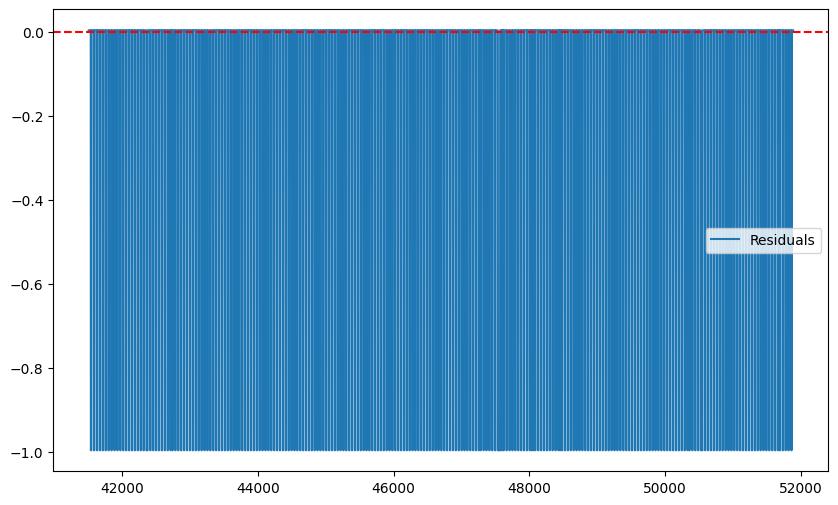

<Figure size 1000x600 with 0 Axes>

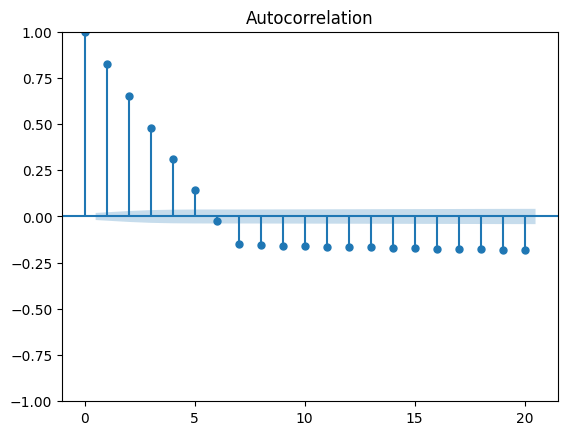

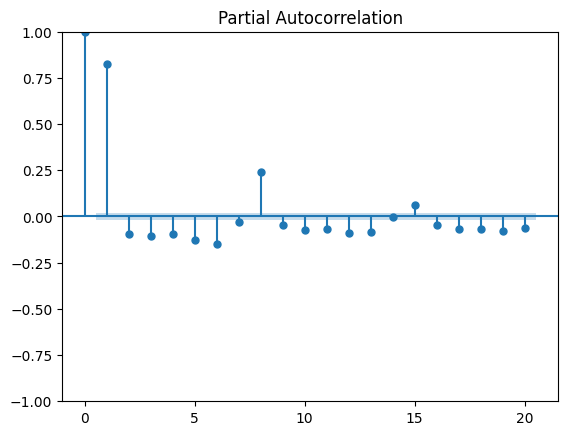

        lb_stat  lb_pvalue
10  16087.93067        0.0
Column [9.21]
Mean Absolute Error: 0.18912225495270787
Mean Squared Error: 0.16201713366131262
Root Mean Squared Error: 0.402513519849101


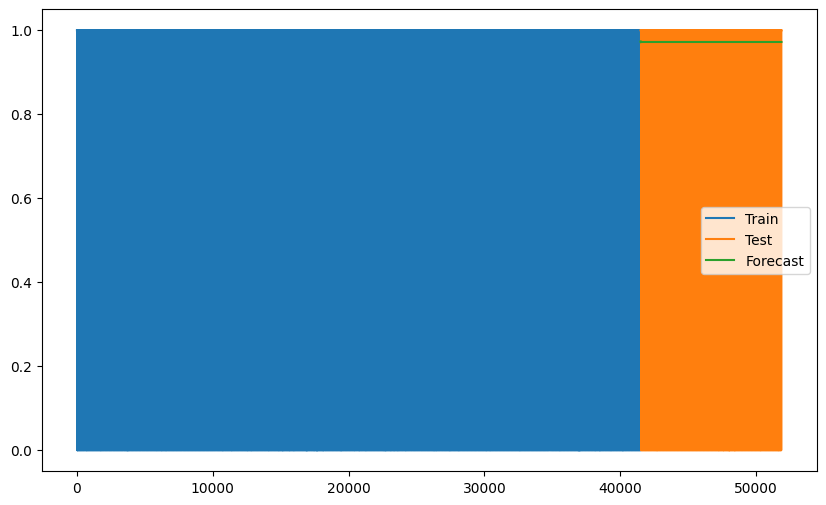

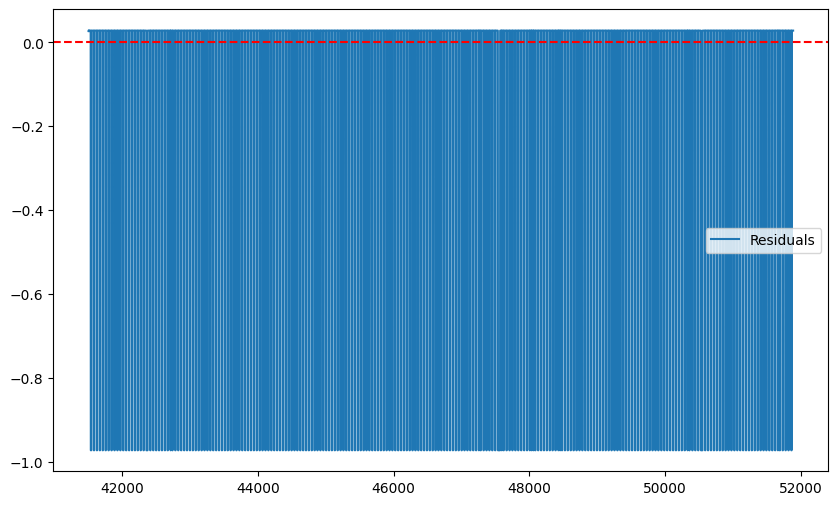

<Figure size 1000x600 with 0 Axes>

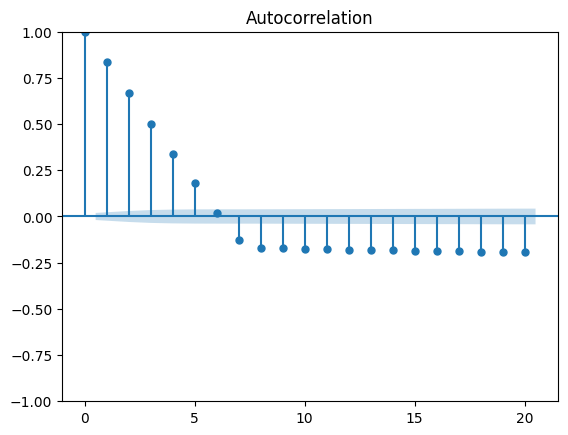

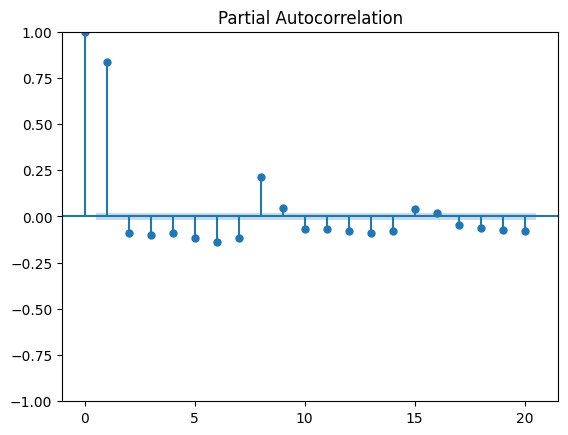

         lb_stat  lb_pvalue
10  17045.056952        0.0
Column [12:42]
Mean Absolute Error: 45.275920613403045
Mean Squared Error: 7738.423322079242
Root Mean Squared Error: 87.96830862349942


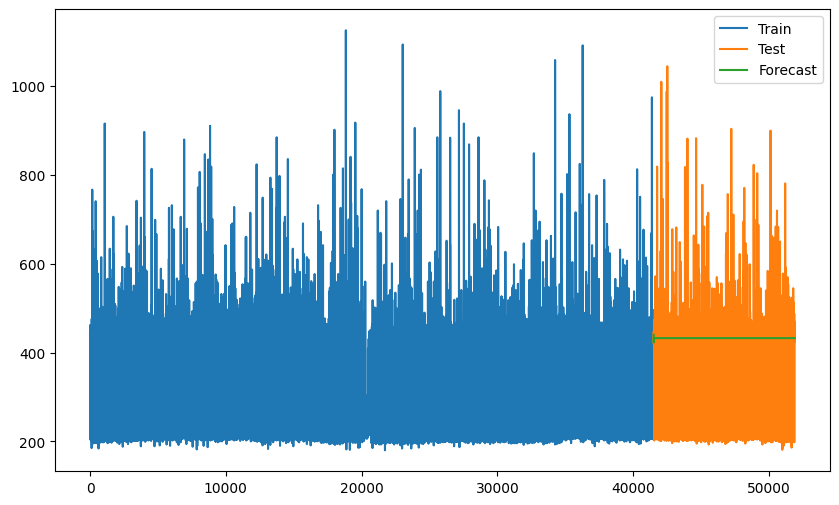

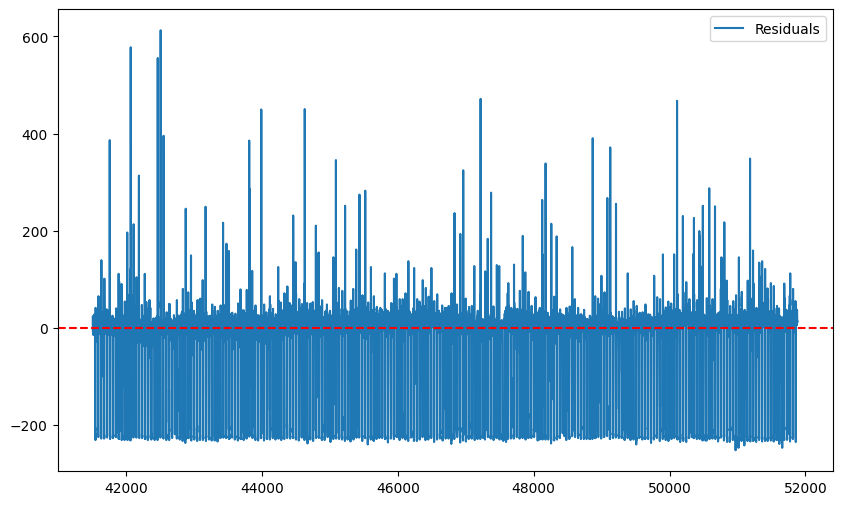

<Figure size 1000x600 with 0 Axes>

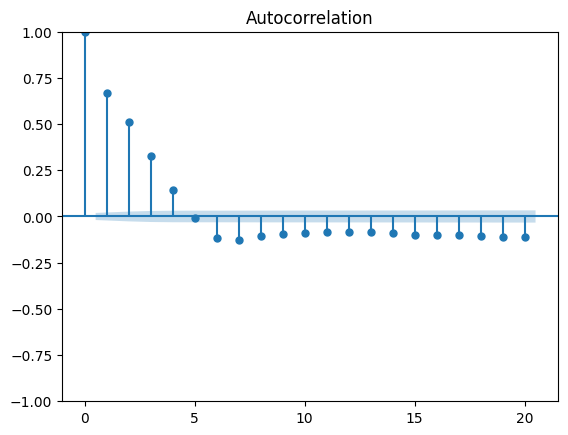

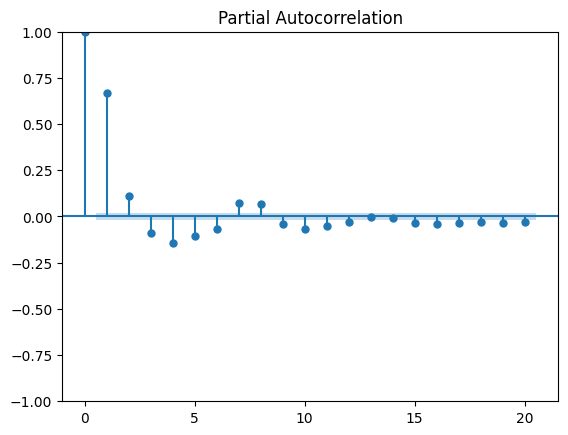

        lb_stat  lb_pvalue
10  9293.761632        0.0
Column [12:43]
Mean Absolute Error: 40.17438611708111
Mean Squared Error: 4960.661710366102
Root Mean Squared Error: 70.43196511787885


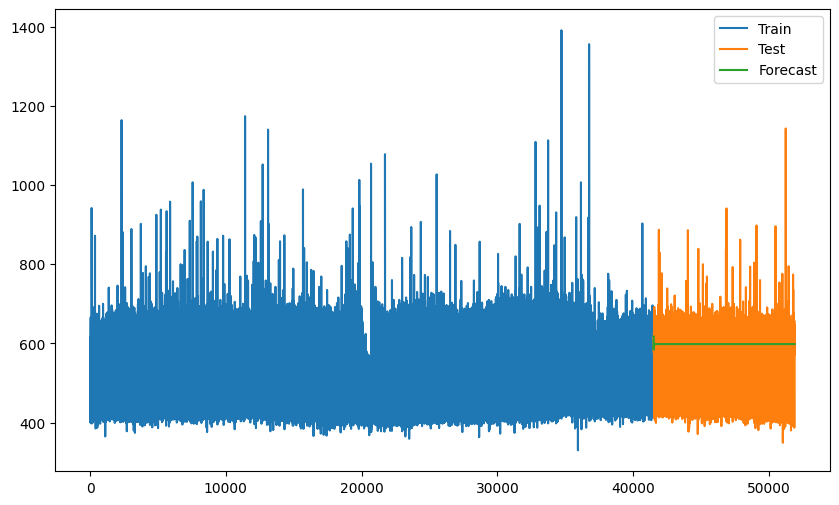

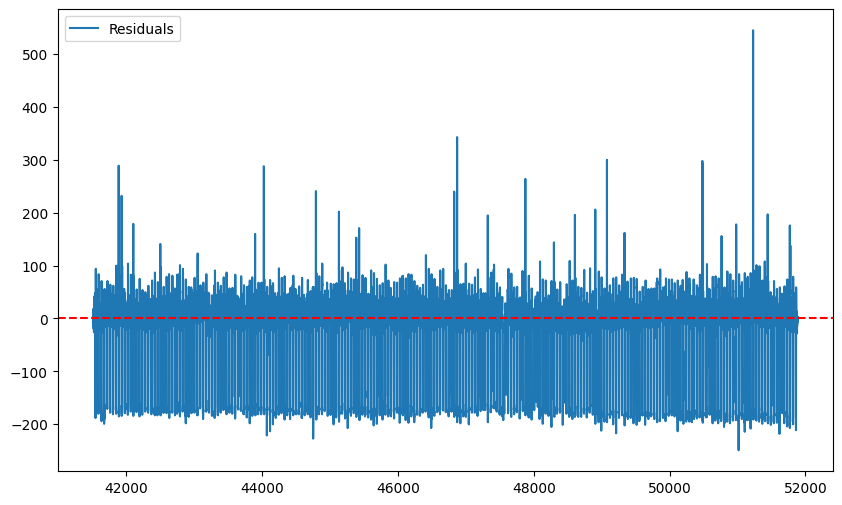

<Figure size 1000x600 with 0 Axes>

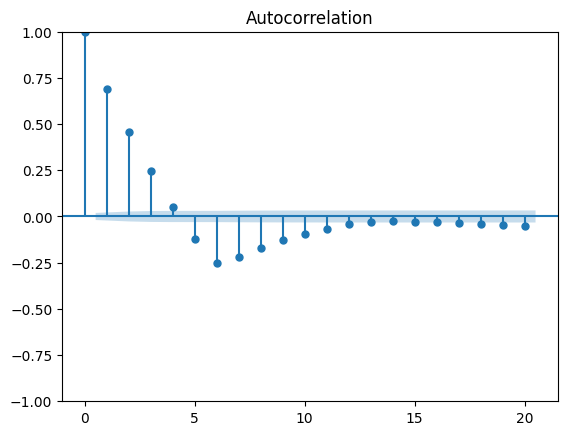

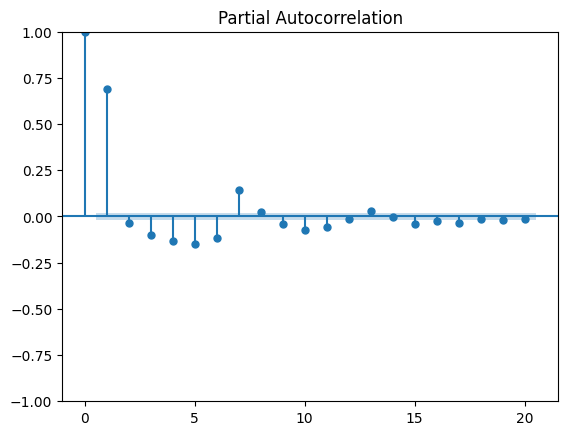

        lb_stat  lb_pvalue
10  9626.348709        0.0
Column [12:65]
Mean Absolute Error: 47.29501454764658
Mean Squared Error: 5037.254742997975
Root Mean Squared Error: 70.97362004997332


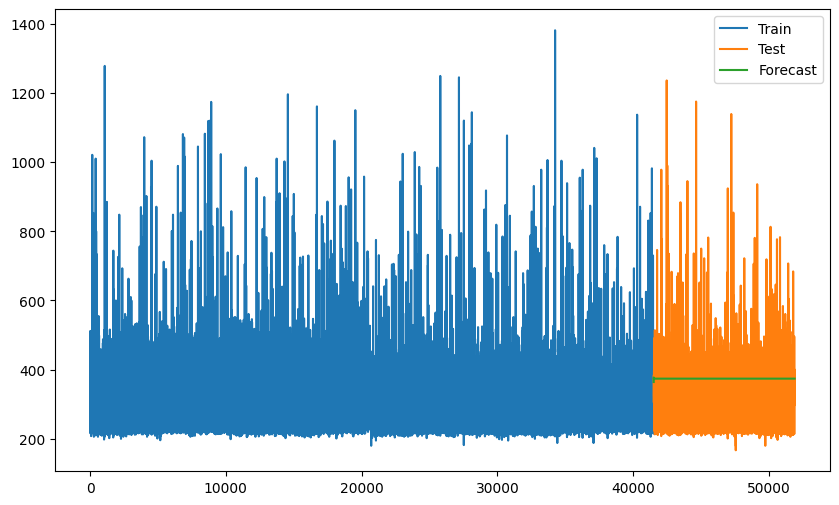

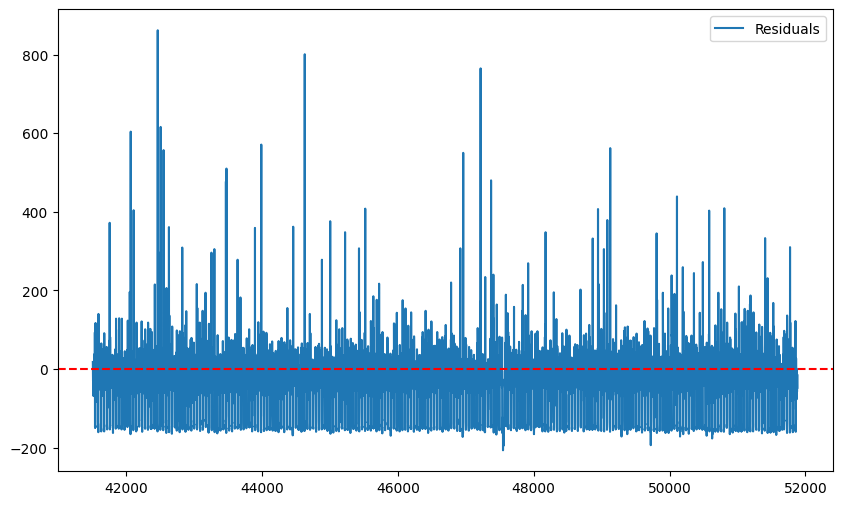

<Figure size 1000x600 with 0 Axes>

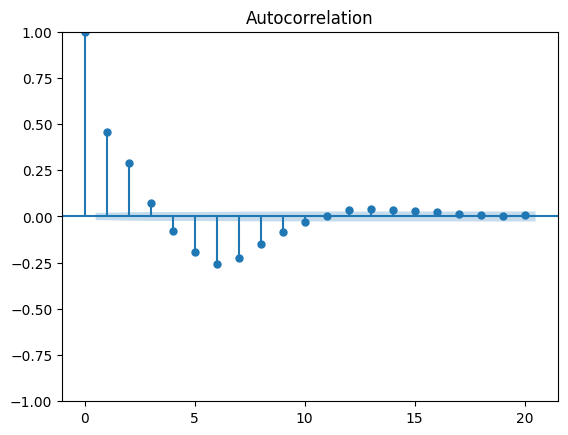

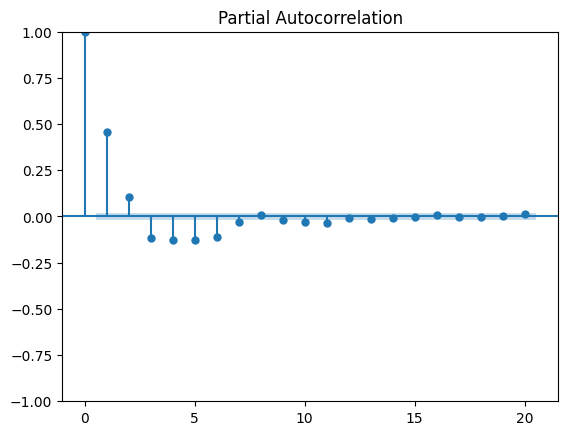

        lb_stat  lb_pvalue
10  5071.650489        0.0
Column [12:66]
Mean Absolute Error: 44.45744316260086
Mean Squared Error: 4535.1486253211
Root Mean Squared Error: 67.34351212493375


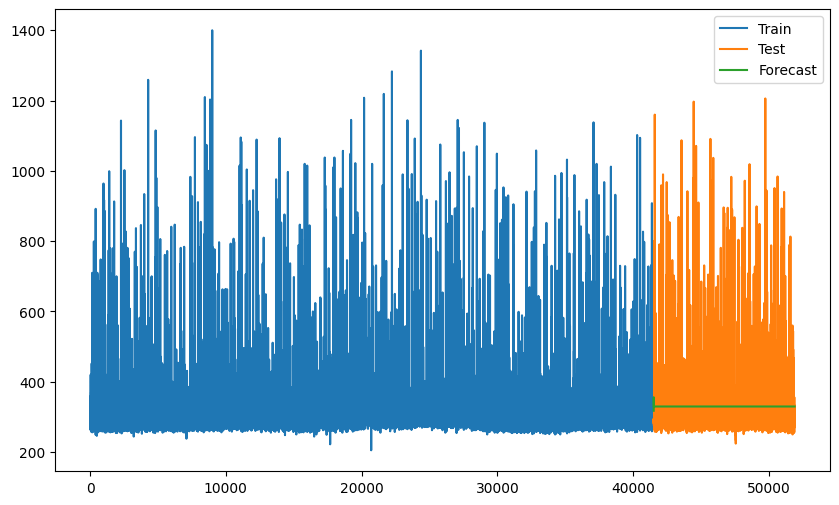

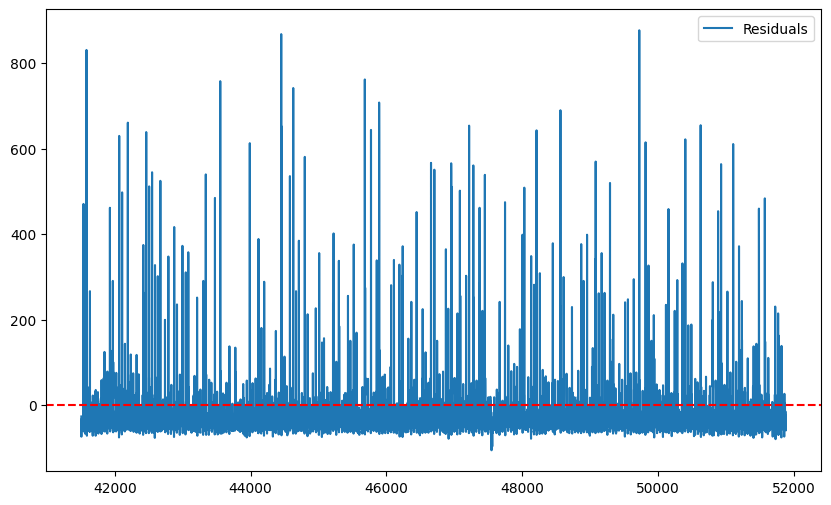

<Figure size 1000x600 with 0 Axes>

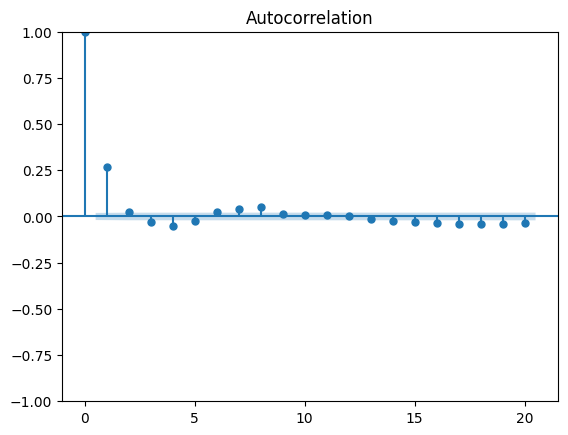

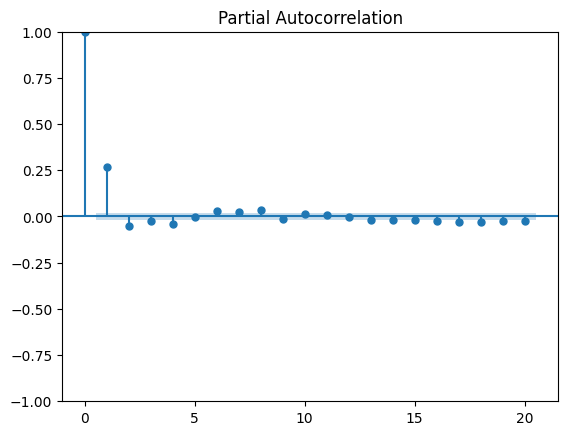

       lb_stat      lb_pvalue
10  862.424647  7.752804e-179
Column [12:67]
Mean Absolute Error: 62.22721212553938
Mean Squared Error: 12135.68144753833
Root Mean Squared Error: 110.16206900534472


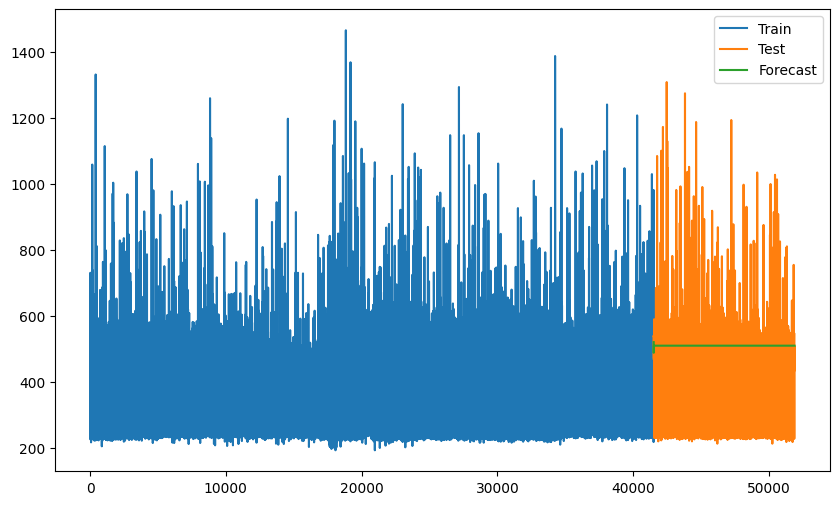

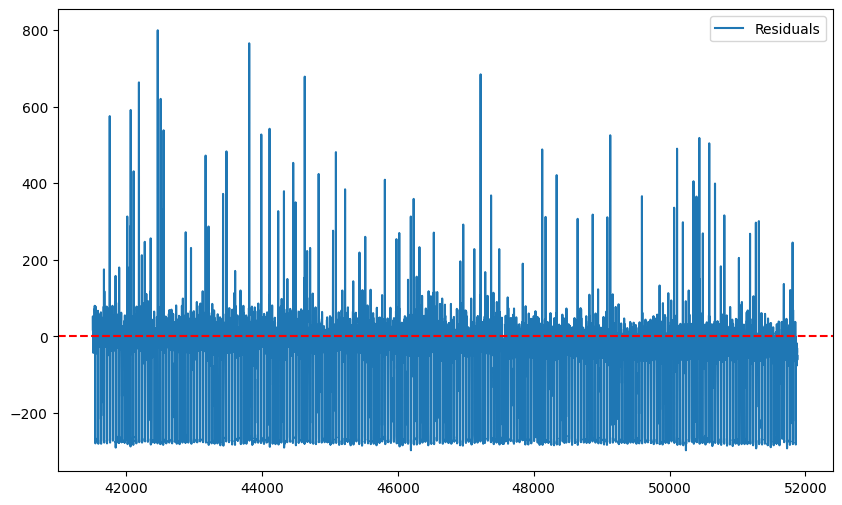

<Figure size 1000x600 with 0 Axes>

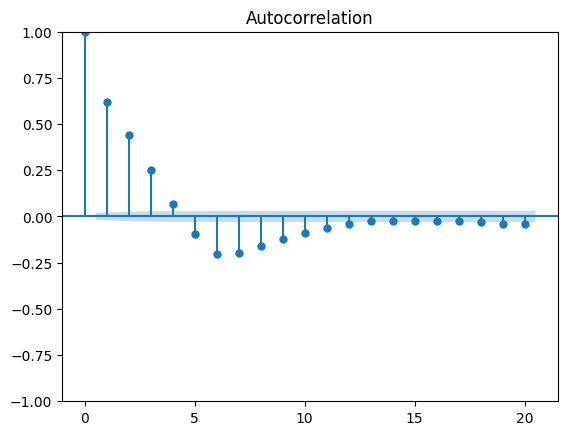

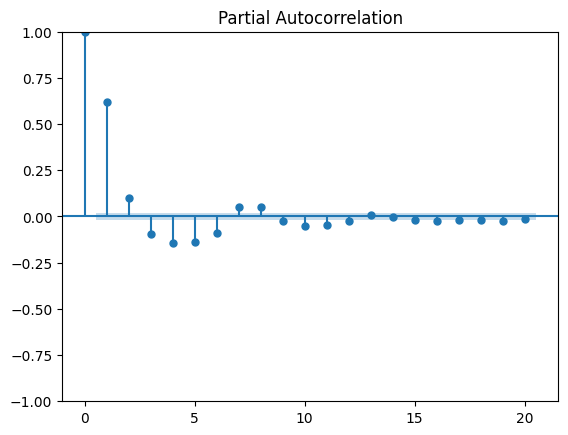

        lb_stat  lb_pvalue
10  8140.087174        0.0
Column [12:68]
Mean Absolute Error: 79.2092668947652
Mean Squared Error: 15517.591344603376
Root Mean Squared Error: 124.56962448608158


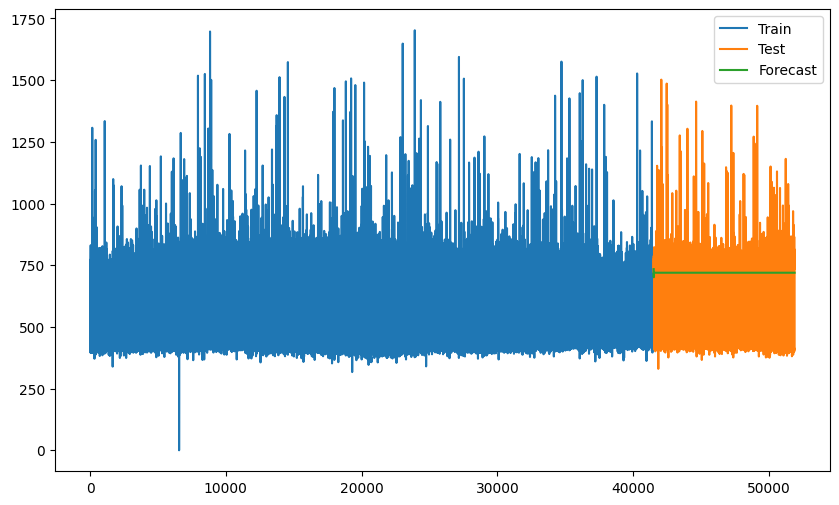

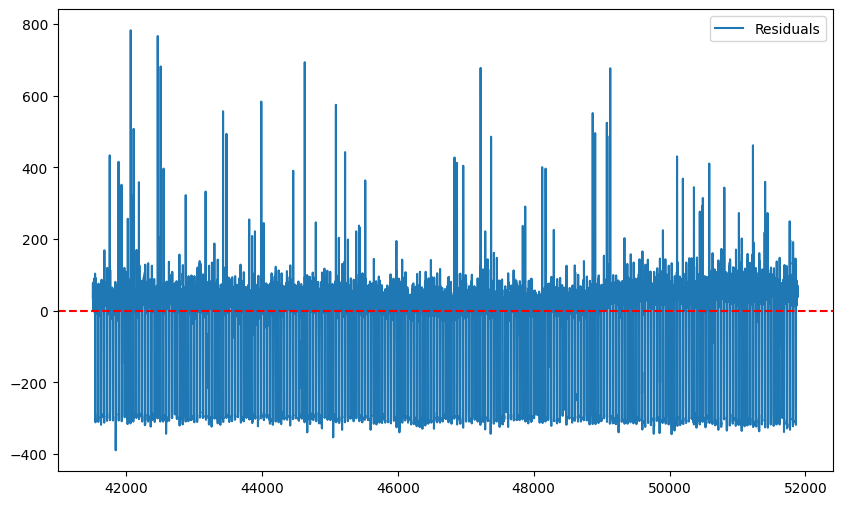

<Figure size 1000x600 with 0 Axes>

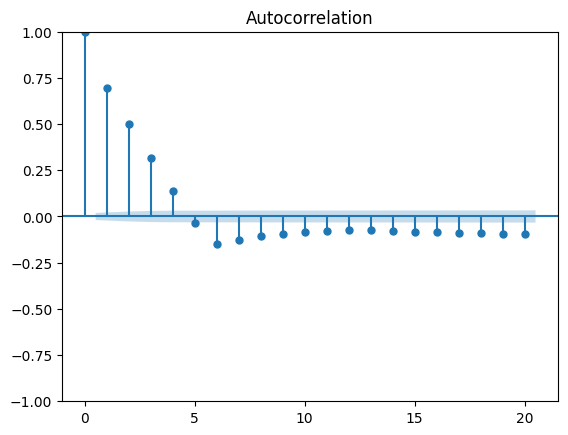

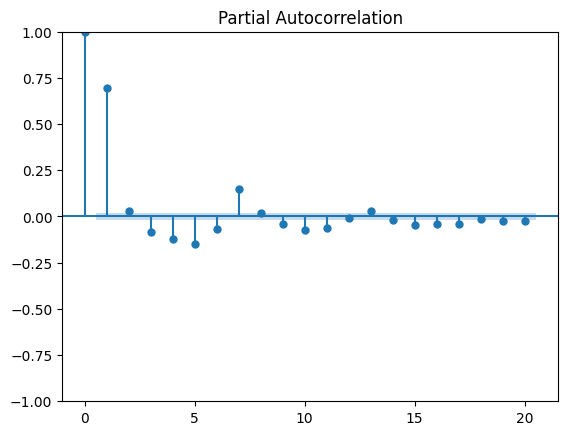

        lb_stat  lb_pvalue
10  9575.477619        0.0
Column [11:21]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Absolute Error: 0.001436253252385034
Mean Squared Error: 3.967235231762288e-06
Root Mean Squared Error: 0.001991791964980853


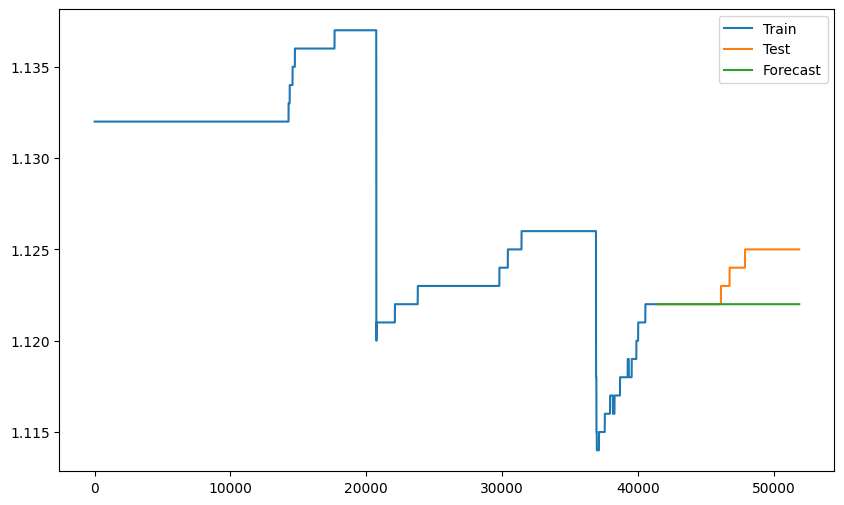

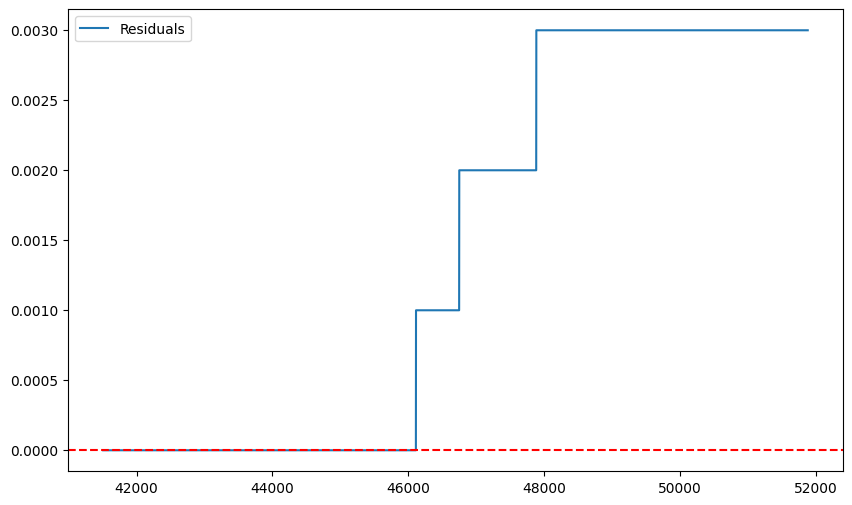

<Figure size 1000x600 with 0 Axes>

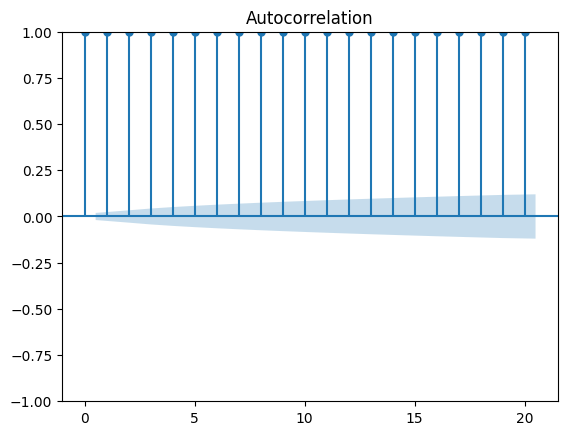

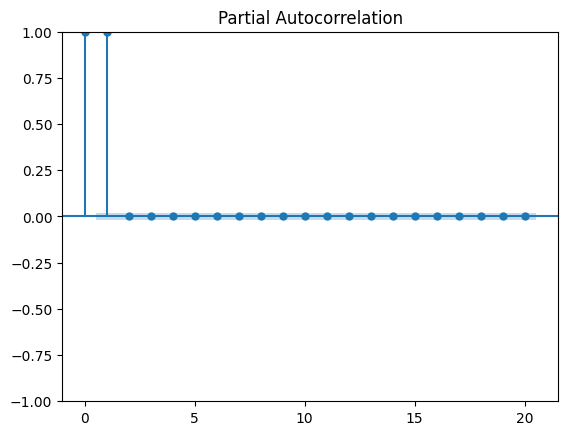

          lb_stat  lb_pvalue
10  103628.166812        0.0
Column [11:22]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Absolute Error: 0.0014206762457308893
Mean Squared Error: 2.848936143978422e-06
Root Mean Squared Error: 0.0016878791852435475


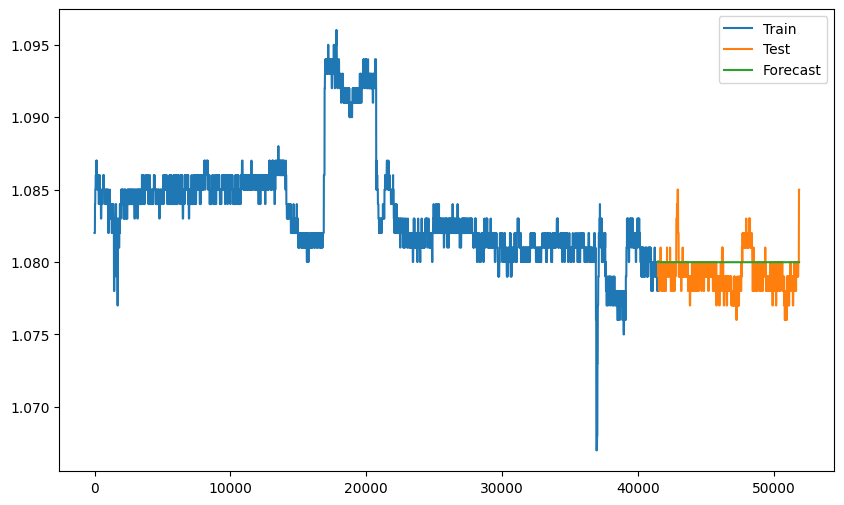

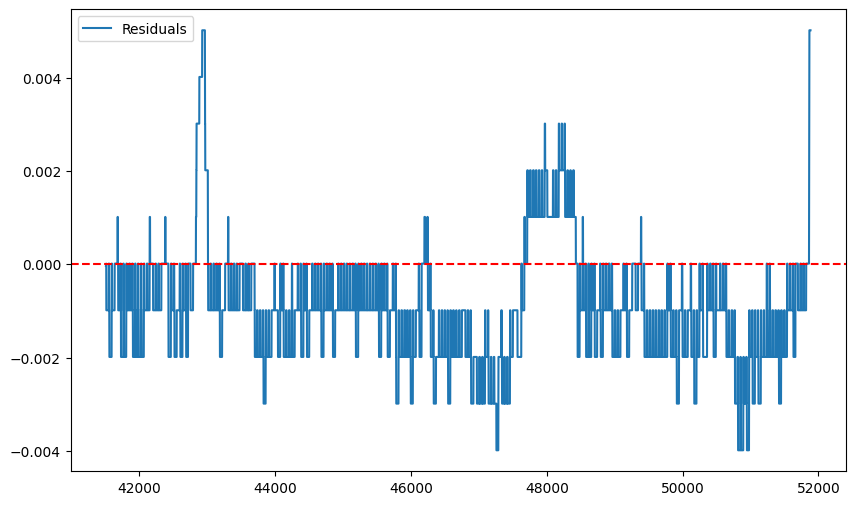

<Figure size 1000x600 with 0 Axes>

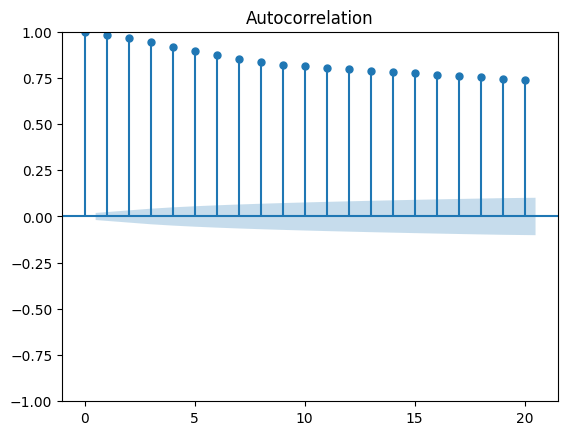

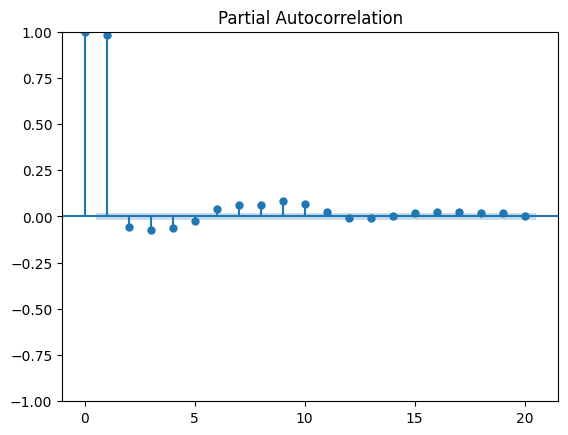

         lb_stat  lb_pvalue
10  82487.302257        0.0
Column [11:23]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Absolute Error: 0.005483762166329327
Mean Squared Error: 4.3772284860749084e-05
Root Mean Squared Error: 0.006616062640328392


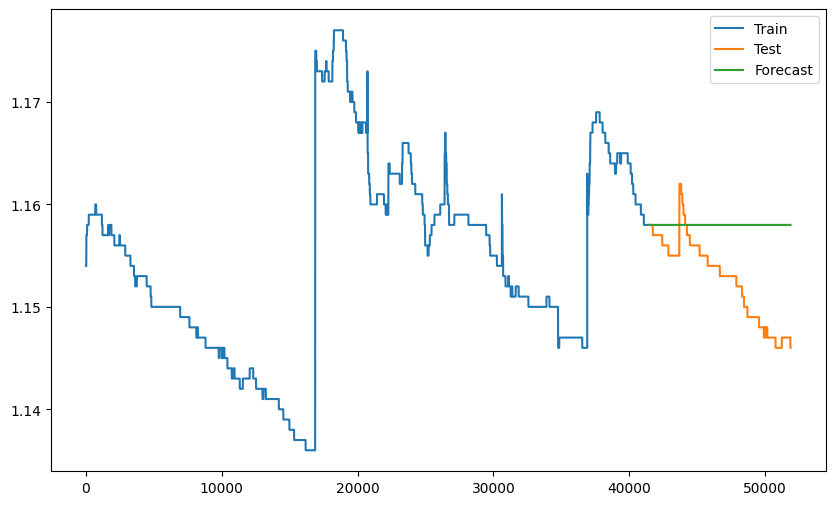

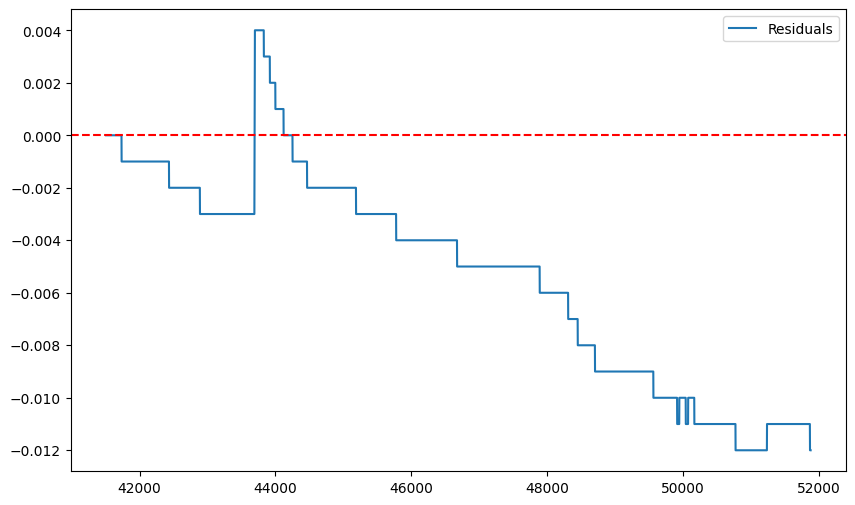

<Figure size 1000x600 with 0 Axes>

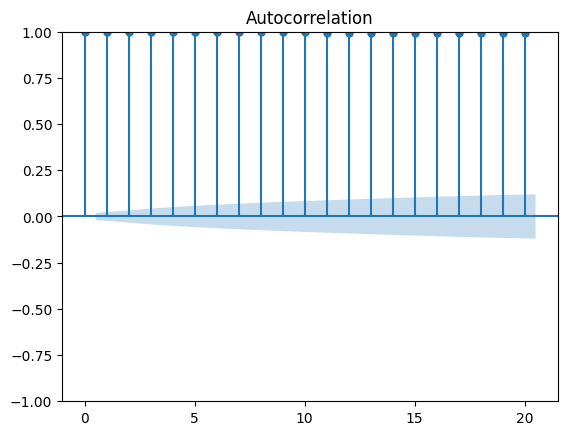

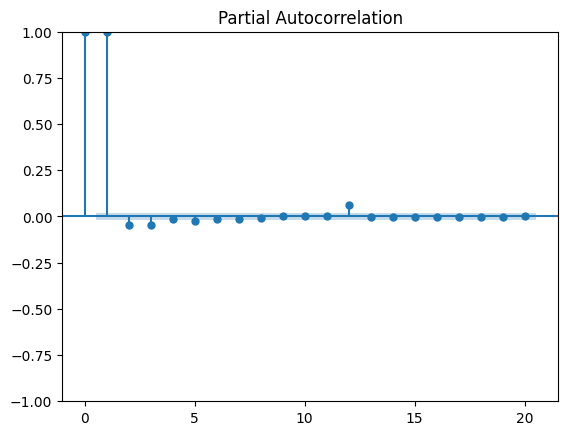

          lb_stat  lb_pvalue
10  103403.418453        0.0
Column [11:24]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Absolute Error: 0.0011299990363303268
Mean Squared Error: 2.424014647778654e-06
Root Mean Squared Error: 0.0015569247405634783


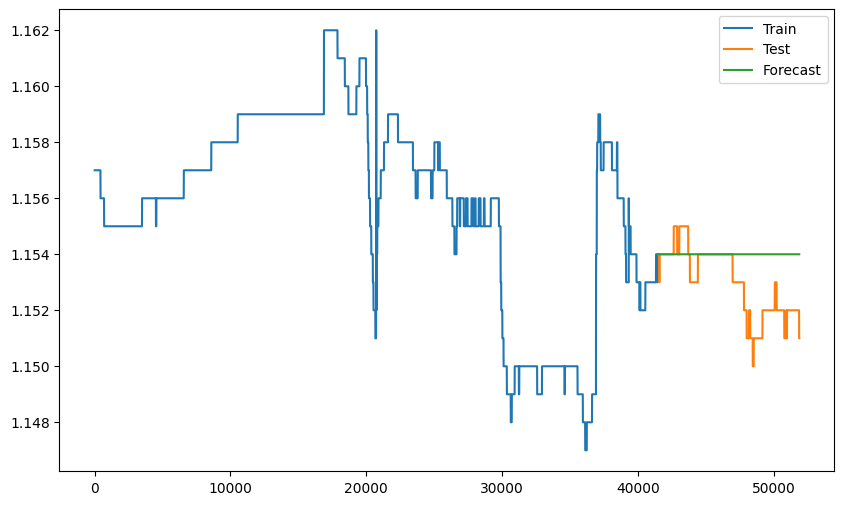

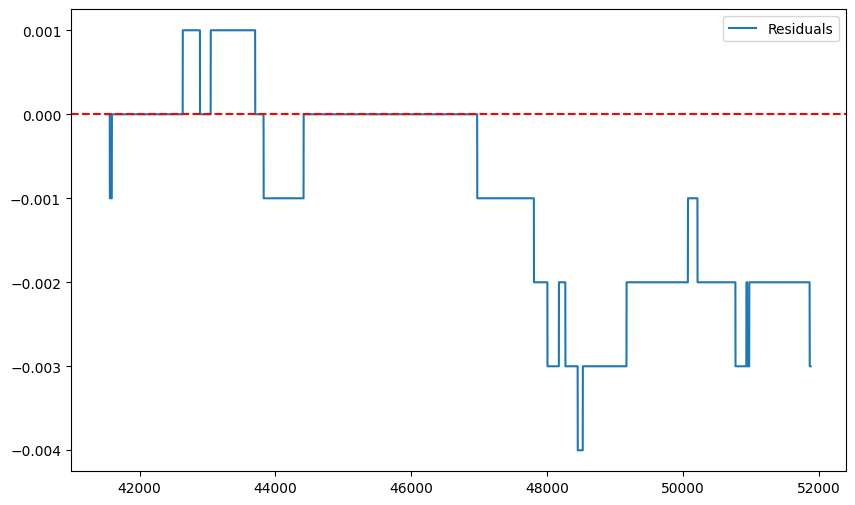

<Figure size 1000x600 with 0 Axes>

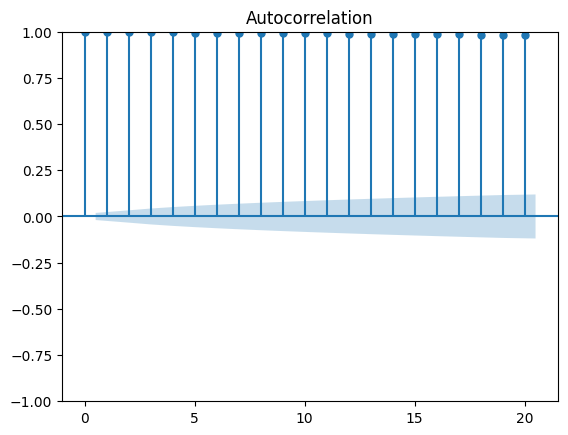

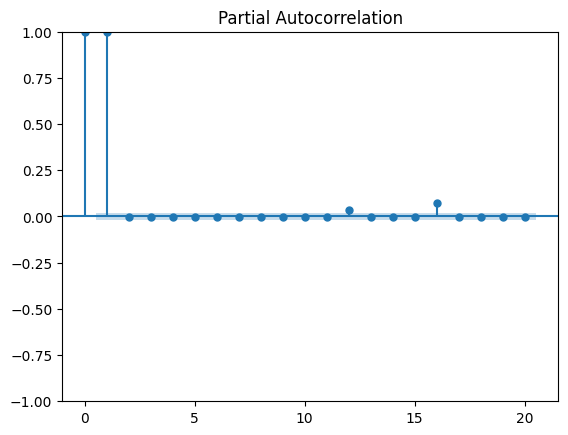

          lb_stat  lb_pvalue
10  102825.655671        0.0
Column [11:25]
Mean Absolute Error: 0.004828473213585054
Mean Squared Error: 2.8979641603670127e-05
Root Mean Squared Error: 0.0053832742456306395


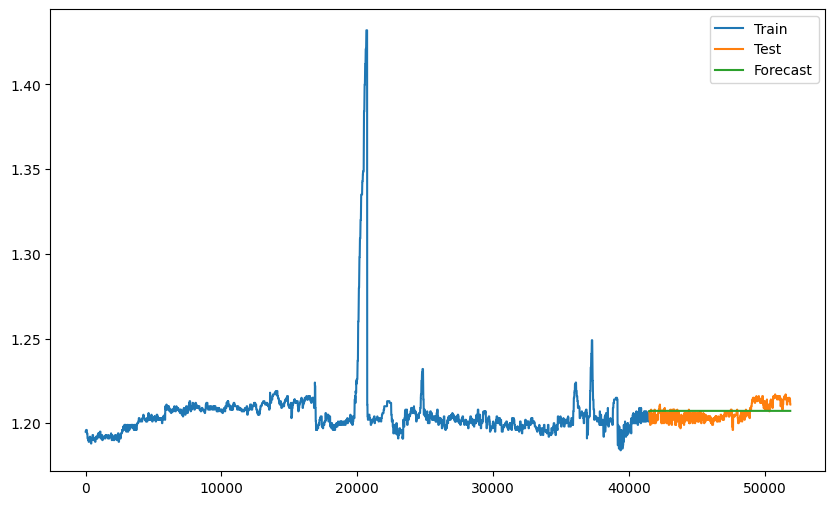

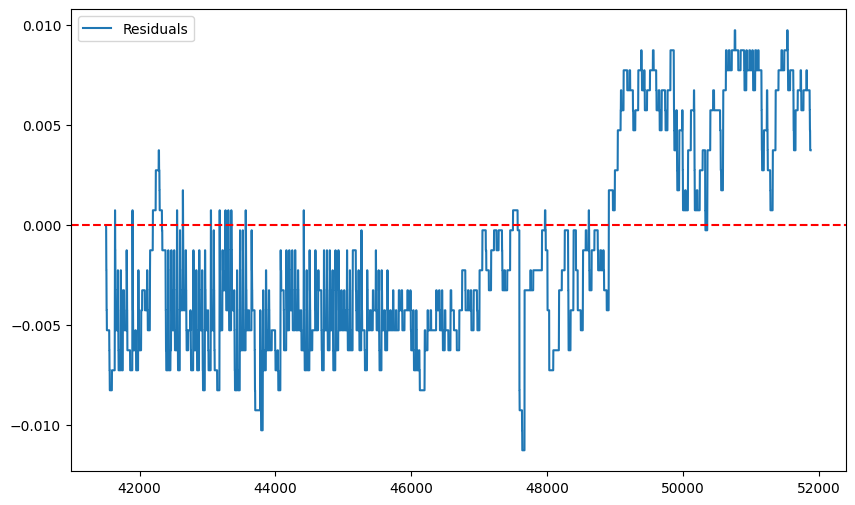

<Figure size 1000x600 with 0 Axes>

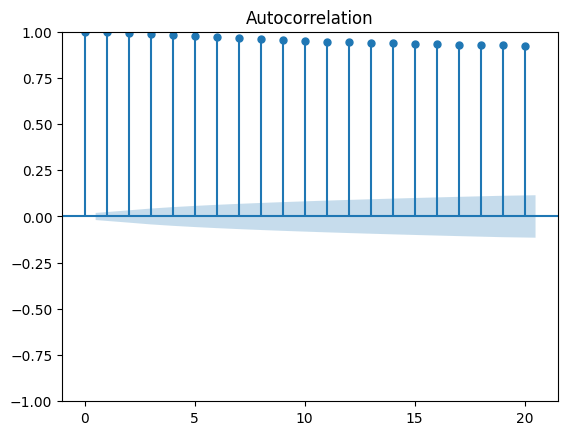

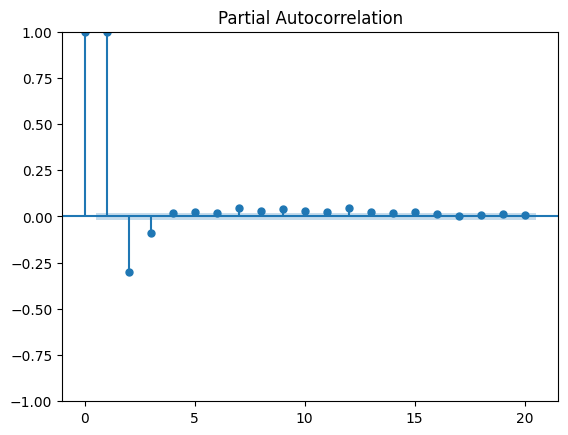

         lb_stat  lb_pvalue
10  98258.103308        0.0
Column [11:26]


KeyboardInterrupt: 

In [28]:
for column in df_final.columns:
  print(f"Column {column}")

  # Train-test split
  train_size = int(len(df_final) * 0.8)
  train, test = df_final[column][:train_size], df_final[column][train_size:]

  # fitting the model
  model = ARIMA(train, order=(5, 1, 0))
  model_fit = model.fit()

  # Forecasting
  forecast = model_fit.forecast(steps=len(test))

  # Evaluation
  mae = mean_absolute_error(test, forecast)
  print(f'Mean Absolute Error: {mae}')

  mse = mean_squared_error(test, forecast)
  print(f'Mean Squared Error: {mse}')

  rmse = mean_squared_error(test, forecast, squared=False)
  print(f'Root Mean Squared Error: {rmse}')

  # Visualizing the result
  plt.figure(figsize=(10, 6))
  plt.plot(train, label='Train')
  plt.plot(test, label='Test')
  plt.plot(pd.Series(forecast, index=test.index), label='Forecast')
  plt.legend()
  plt.show()

  residuals = test - forecast

  plt.figure(figsize=(10, 6))
  plt.plot(residuals, label='Residuals')
  plt.axhline(y=0, color='r', linestyle='--')
  plt.legend()
  plt.show()

  plt.figure(figsize=(10, 6))
  plot_acf(residuals, lags=20)
  plot_pacf(residuals, lags=20)
  plt.show()

  lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
  print(lb_test)

Anomaly Detection

In [33]:
series = df_final['[11:24]']

In [34]:
# Calculate residuals
for column in df_final.columns:
  residuals = df_final[column] - model_fit.predict()

  # Define anomaly detection threshold
  threshold = 3 * np.std(residuals)

  # Detect anomalies
  anomalies = residuals[np.abs(residuals) > threshold]
  print(f"Anomalies in {column}:")
  print(anomalies)

Anomalies in [12:44]:
0        84.000000
1        82.805000
2        82.805000
3        82.805000
4        82.805000
           ...    
41502    81.798000
41503    81.798000
41504    81.798000
41505    81.798000
41506    81.795958
Length: 41507, dtype: float64
Anomalies in [9:12]:
17       27.805
20       26.805
41       26.804
42       26.804
76       28.804
          ...  
41373    31.797
41374    79.797
41416    29.798
41419    26.798
41454    55.799
Length: 1962, dtype: float64
Anomalies in [9:13]:
69      -15.196
161      23.809
203      38.810
243     -21.189
279      35.809
          ...  
41366    31.797
41367    30.797
41374    48.797
41497    24.798
41502   -25.202
Length: 743, dtype: float64
Anomalies in [9:14]:
22       55.805
111      38.806
117      40.806
118      38.806
120      39.806
          ...  
41492    39.798
41493    38.798
41496    62.798
41503    38.798
41505    39.798
Length: 3265, dtype: float64
Anomalies in [9:15]:
47       40.804
120      39.806
160      